In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import matplotlib.colors as mcolors

In [5]:
import time

In [6]:
import math

In [7]:
import random

In [8]:
import datetime

In [9]:
import operator

In [10]:
from sklearn.linear_model import LinearRegression, BayesianRidge

In [11]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
from sklearn.svm import SVR

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
plt.style.use('fivethirtyeight')
%matplotlib inline

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
confirmed_df = pd.read_csv('C:\input\confirmed_df.csv')

In [18]:
confirmed_df.head(10)

Province/State       Country/Region       Lat        Long  \
0                           NaN          Afghanistan  33.93911   67.709953   
1                           NaN              Albania  41.15330   20.168300   
2                           NaN              Algeria  28.03390    1.659600   
3                           NaN              Andorra  42.50630    1.521800   
4                           NaN               Angola -11.20270   17.873900   
5                           NaN  Antigua and Barbuda  17.06080  -61.796400   
6                           NaN            Argentina -38.41610  -63.616700   
7                           NaN              Armenia  40.06910   45.038200   
8  Australian Capital Territory            Australia -35.47350  149.012400   
9               New South Wales            Australia -33.86880  151.209300   

   1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/4/20  7/5/20  \
0        0        0        0        0        0        0  ...   32672   32951   
1        0        0        0        0        0        0  ...    2819    2893   
2        0        0        0        0        0        0  ...   15500   15941   
3        0        0        0        0        0        0  ...     855     855   
4        0        0        0        0        0        0  ...     346     346   
5        0        0        0        0        0        0  ...      68      68   
6        0        0        0        0        0        0  ...   75376   77815   
7        0        0        0        0        0        0  ...   27900   28606   
8        0        0        0        0        0        0  ...     108     108   
9        0        0        0        0        3        4  ...    3419    3429   

   7/6/20  7/7/20  7/8/20  7/9/20  7/10/20  7/11/20  7/12/20  7/13/20  
0   33190   33384   33594   33908    34194    34366    34451    34455  
1    2964    3038    3106    3188     3278     3371     3454     3571  
2   16404   16879   17348   17808    18242    18712    19195    19689  
3     855     855     855     855      855      855      855      858  
4     346     386     386     396      458      462      506      525  
5      70      70      70      73       74       74       74       74  
6   80447   83426   87030   90693    94060    97509   100166   103265  
7   28936   29285   29820   30346    30903    31392    31969    32151  
8     108     111     112     113      113      113      113      113  
9    3433    3440    3453    3467     3474     3478     3492     3505  

[10 rows x 178 columns]

In [19]:
deaths_df = pd.read_csv('C:\input\deaths_df.csv')

In [20]:
deaths_df.head(10)

Province/State       Country/Region       Lat        Long  \
0                           NaN          Afghanistan  33.93911   67.709953   
1                           NaN              Albania  41.15330   20.168300   
2                           NaN              Algeria  28.03390    1.659600   
3                           NaN              Andorra  42.50630    1.521800   
4                           NaN               Angola -11.20270   17.873900   
5                           NaN  Antigua and Barbuda  17.06080  -61.796400   
6                           NaN            Argentina -38.41610  -63.616700   
7                           NaN              Armenia  40.06910   45.038200   
8  Australian Capital Territory            Australia -35.47350  149.012400   
9               New South Wales            Australia -33.86880  151.209300   

   1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/4/20  7/5/20  \
0        0        0        0        0        0        0  ...     826     864   
1        0        0        0        0        0        0  ...      74      76   
2        0        0        0        0        0        0  ...     946     952   
3        0        0        0        0        0        0  ...      52      52   
4        0        0        0        0        0        0  ...      19      19   
5        0        0        0        0        0        0  ...       3       3   
6        0        0        0        0        0        0  ...    1481    1507   
7        0        0        0        0        0        0  ...     477     484   
8        0        0        0        0        0        0  ...       3       3   
9        0        0        0        0        0        0  ...      49      49   

   7/6/20  7/7/20  7/8/20  7/9/20  7/10/20  7/11/20  7/12/20  7/13/20  
0     898     920     936     957      971      994     1010     1012  
1      79      81      83      83       85       89       93       95  
2     959     968     978     988      996     1004     1011     1018  
3      52      52      52      52       52       52       52       52  
4      19      21      21      22       23       23       26       26  
5       3       3       3       3        3        3        3        3  
6    1582    1644    1694    1720     1774     1810     1845     1903  
7     491     503     521     535      546      559      565      573  
8       3       3       3       3        3        3        3        3  
9      49      49      49      49       49       49       49       49  

[10 rows x 178 columns]

In [21]:
recoveries_df = pd.read_csv('C:\input/recoveries_df.csv')

In [22]:
recoveries_df.head(10)

Province/State       Country/Region       Lat        Long  \
0                           NaN          Afghanistan  33.93911   67.709953   
1                           NaN              Albania  41.15330   20.168300   
2                           NaN              Algeria  28.03390    1.659600   
3                           NaN              Andorra  42.50630    1.521800   
4                           NaN               Angola -11.20270   17.873900   
5                           NaN  Antigua and Barbuda  17.06080  -61.796400   
6                           NaN            Argentina -38.41610  -63.616700   
7                           NaN              Armenia  40.06910   45.038200   
8  Australian Capital Territory            Australia -35.47350  149.012400   
9               New South Wales            Australia -33.86880  151.209300   

   1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  7/4/20  7/5/20  \
0        0        0        0        0        0        0  ...   19164   19366   
1        0        0        0        0        0        0  ...    1637    1657   
2        0        0        0        0        0        0  ...   11181   11492   
3        0        0        0        0        0        0  ...     800     800   
4        0        0        0        0        0        0  ...     108     108   
5        0        0        0        0        0        0  ...      23      23   
6        0        0        0        0        0        0  ...   25930   27597   
7        0        0        0        0        0        0  ...   15935   16140   
8        0        0        0        0        0        0  ...     105     105   
9        0        0        0        0        0        0  ...    2988    2988   

   7/6/20  7/7/20  7/8/20  7/9/20  7/10/20  7/11/20  7/12/20  7/13/20  
0   20103   20179   20700   20847    20882    21135    21216    21254  
1    1702    1744    1791    1832     1875     1881     1946     2014  
2   11884   12094   12329   12637    13124    13124    13743    14019  
3     800     800     802     802      803      803      803      803  
4     108     117     117     117      117      118      118      118  
5      23      23      23      57       57       57       57       57  
6   28531   30095   36502   38313    38984    41408    42694    44173  
7   16302   16907   17427   18000    18709    19419    19633    19865  
8     105     105     105     105      105      105      105      105  
9    2987    2986    2986    2987     2997     2988     2988     2988  

[10 rows x 178 columns]

In [23]:
latest_data = pd.read_csv('C:\input/latest_data.csv')

In [24]:
latest_data.head(10)

FIPS     Admin2  Province_State Country_Region          Last_Update  \
0  45001.0  Abbeville  South Carolina             US  2020-07-13 04:43:04   
1  22001.0     Acadia       Louisiana             US  2020-07-13 04:43:04   
2  51001.0   Accomack        Virginia             US  2020-07-13 04:43:04   
3  16001.0        Ada           Idaho             US  2020-07-13 04:43:04   
4  19001.0      Adair            Iowa             US  2020-07-13 04:43:04   
5  21001.0      Adair        Kentucky             US  2020-07-13 04:43:04   
6  29001.0      Adair        Missouri             US  2020-07-13 04:43:04   
7  40001.0      Adair        Oklahoma             US  2020-07-13 04:43:04   
8   8001.0      Adams        Colorado             US  2020-07-13 04:43:04   
9  16003.0      Adams           Idaho             US  2020-07-13 04:43:04   

         Lat       Long_  Confirmed  Deaths  Recovered  Active  \
0  34.223334  -82.461707        153       1          0   152.0   
1  30.295065  -92.414197       1339      45          0  1294.0   
2  37.767072  -75.632346       1042      14          0  1028.0   
3  43.452658 -116.241552       4146      25          0  4121.0   
4  41.330756  -94.471059         17       0          0    17.0   
5  37.104598  -85.281297        142      19          0   123.0   
6  40.190586  -92.600782        100       0          0   100.0   
7  35.884942  -94.658593        137       4          0   133.0   
8  39.874321 -104.336258       4757     158          0  4599.0   
9  44.893336 -116.454525         12       0          0    12.0   

                    Combined_Key  Incidence_Rate  Case-Fatality_Ratio  
0  Abbeville, South Carolina, US      623.802340             0.653595  
1          Acadia, Louisiana, US     2158.111048             3.360717  
2         Accomack, Virginia, US     3224.408962             1.343570  
3                 Ada, Idaho, US      860.903637             0.602991  
4                Adair, Iowa, US      237.695749             0.000000  
5            Adair, Kentucky, US      739.506301            13.380282  
6            Adair, Missouri, US      394.586276             0.000000  
7            Adair, Oklahoma, US      617.283951             2.919708  
8            Adams, Colorado, US      919.367401             3.321421  
9               Adams, Idaho, US      279.459711             0.000000

In [25]:
us_medical_data = pd.read_csv('C:\input/us_medical_data.csv')

In [26]:
us_medical_data.head(10)

Province_State Country_Region          Last_Update      Lat     Long_  \
0           Alabama             US  2020-07-13 04:43:16  32.3182  -86.9023   
1            Alaska             US  2020-07-13 04:43:16  61.3707 -152.4044   
2    American Samoa             US  2020-07-13 04:43:16 -14.2710 -170.1320   
3           Arizona             US  2020-07-13 04:43:16  33.7298 -111.4312   
4          Arkansas             US  2020-07-13 04:43:16  34.9697  -92.3731   
5        California             US  2020-07-13 04:43:16  36.1162 -119.6816   
6          Colorado             US  2020-07-13 04:43:16  39.0598 -105.3111   
7       Connecticut             US  2020-07-13 04:43:16  41.5978  -72.7554   
8          Delaware             US  2020-07-13 04:43:16  39.3185  -75.5071   
9  Diamond Princess             US  2020-07-13 04:43:16      NaN       NaN   

   Confirmed  Deaths  Recovered    Active   FIPS  Incident_Rate  \
0      53587    1121    25783.0   26683.0      1    1092.901859   
1       1479      17      615.0     847.0      2     202.174849   
2          0       0        NaN       0.0     60       0.000000   
3     122467    2237    14829.0  105401.0      4    1682.535535   
4      28367     321    21591.0    6455.0      5     939.988150   
5     324543    7051        NaN  317492.0      6     821.373680   
6      36895    1725     4749.0   30421.0      8     640.678788   
7      47287    4348     8351.0   34588.0      9    1326.316787   
8      12804     517     7120.0    5167.0     10    1314.897655   
9         49       0        NaN      49.0  88888            NaN   

   People_Tested  People_Hospitalized  Mortality_Rate       UID ISO3  \
0       511506.0               6745.0        2.091925  84000001  USA   
1       145475.0                  NaN        1.149425  84000002  USA   
2          816.0                  NaN             NaN        16  ASM   
3       696172.0               5795.0        1.826615  84000004  USA   
4       382402.0               1822.0        1.131597  84000005  USA   
5      5406599.0                  NaN        2.172593  84000006  USA   
6       392103.0               5885.0        4.675430  84000008  USA   
7       558209.0              10552.0        9.194916  84000009  USA   
8       137409.0                  NaN        4.037801  84000010  USA   
9            NaN                  NaN        0.000000  84088888  USA   

   Testing_Rate  Hospitalization_Rate  
0  10432.117083             12.587008  
1  19885.994710                   NaN  
2   1466.544455                   NaN  
3   9564.487807              4.731887  
4  12671.532015              6.422956  
5  13683.358185                   NaN  
6   6808.837912             15.950671  
7  15656.776018             22.314801  
8  14111.119327                   NaN  
9           NaN                   NaN

In [27]:
cols = confirmed_df.keys()

In [28]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [29]:
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []

china_cases = []
italy_cases = []
us_cases = []
spain_cases = []
france_cases = []
germany_cases = []
uk_cases = []
russia_cases = []
brazil_cases = []
india_cases = []
peru_cases = []
south_africa_cases = []

china_deaths = []
italy_deaths = []
us_deaths = []
spain_deaths = []
france_deaths = []
germany_deaths = []
uk_deaths = []
russia_deaths = []
brazil_deaths = []
india_deaths = []
peru_deaths = []
south_africa_deaths = []

china_recoveries = []
italy_recoveries = []
us_recoveries =[]
spain_recoveries = []
france_recoveries = []
germany_recoveries = []
uk_recoveries = []
russia_recoveries = []
brazil_recoveries = []
india_recoveries =[]
peru_recoveries = []
south_africa_recoveries = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    
    
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_df[confirmed_df['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_df[confirmed_df['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_df[confirmed_df['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_df[confirmed_df['Country/Region']=='Russia'][i].sum())
    brazil_cases.append(confirmed_df[confirmed_df['Country/Region']=='Brazil'][i].sum())
    india_cases.append(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())
    peru_cases.append(confirmed_df[confirmed_df['Country/Region']=='Peru'][i].sum())
    south_africa_cases.append(confirmed_df[confirmed_df['Country/Region']=='South Africa'][i].sum())
    
    
    china_deaths.append(deaths_df[deaths_df['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_df[deaths_df['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_df[deaths_df['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_df[deaths_df['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_df[deaths_df['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_df[deaths_df['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_df[deaths_df['Country/Region']=='Uinted Kingdom'][i].sum())
    russia_deaths.append(deaths_df[deaths_df['Country/Region']=='Russia'][i].sum())
    brazil_deaths.append(deaths_df[deaths_df['Country/Region']=='Brazil'][i].sum())
    india_deaths.append(deaths_df[deaths_df['Country/Region']=='India'][i].sum())
    peru_deaths.append(deaths_df[deaths_df['Country/Region']=='Peru'][i].sum())
    south_africa_deaths.append(deaths_df[deaths_df['Country/Region']=='South Africa'][i].sum())
    
    
    china_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Russia'][i].sum())
    brazil_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Brazil'][i].sum())
    india_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='India'][i].sum())
    peru_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Peru'][i].sum())
    south_africa_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='South Africa'][i].sum())
    

In [30]:
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average


window = 7


world_daily_increase = daily_increase(world_cases)
world_confirmed_avg = moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase =  daily_increase(uk_cases)
russia_daily_increase = daily_increase(russia_cases)
brazil_daily_increase = daily_increase(brazil_cases)
india_daily_increase = daily_increase(india_cases)
peru_daily_increase = daily_increase(peru_cases)
south_africa_increase = daily_increase(south_africa_cases)


world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)

china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)
russia_daily_death = daily_increase(russia_deaths)
brazil_daily_death = daily_increase(brazil_deaths)
india_daily_death = daily_increase(india_deaths)
peru_daily_death = daily_increase(peru_deaths)
south_africa_daily_death = daily_increase(south_africa_deaths)


world_daily_recovery = daily_increase(total_recovered)
world_recovery_avg = moving_average(total_recovered, window)
world_daily_recovery_avg = moving_average(world_daily_recovery, window)

china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery =daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
russia_daily_recovery = daily_increase(russia_recoveries)
brazil_daily_recovery = daily_increase(brazil_recoveries)
india_daily_recovery = daily_increase(india_recoveries)
peru_daily_recovery = daily_increase(peru_recoveries)
south_africa_recovery = daily_increase(south_africa_recoveries)

world_active_avg = moving_average(total_active, window)

In [31]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_class = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [32]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forcast[:-10]

In [33]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [34]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], world_cases[50:], test_size = 0.12, shuffle = False)

In [ ]:
c = [0.01,0.1,1]
gamma = [0.01,0.1,1]
epsilon = [0.01,0.1,1]
shrinking = [True, False]
degree = [3,4,5]

svm_grid = {'C':c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking, 'degree': degree}
svm = SVR(kernel='poly')
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv =3, return_train_score = True, n_jobs=-1, n_iter = 30, verbose =1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
svm_search.best_params_

In [36]:
#svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly', gamma=0.01, epsilon=1, degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 38102.766601882504
MSE: 2136059358.7804601


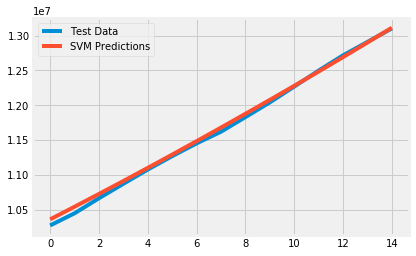

In [37]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

MAE: 38102.766601882504
MSE: 2136059358.7804601


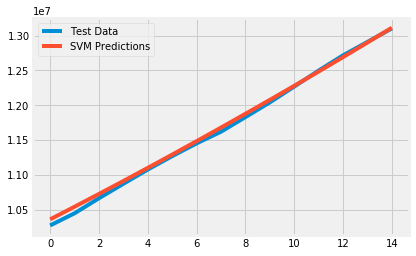

In [38]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [73]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(bayesian_poly_X_test_confirmed)
linear_pred = linear_model.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 254042.00149291355
MSE: 90182751582.55717


In [42]:
print(linear_model.coef_)

[43299.13065896]


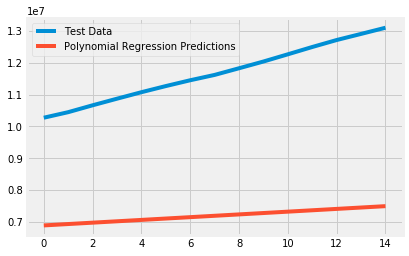

In [43]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [44]:
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 113 out of 120 | elapsed:    6.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    6.1s finished


RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'normalize': [True, False],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [45]:
bayesian_search.best_params_

{'tol': 1e-06,
 'normalize': False,
 'lambda_2': 1e-06,
 'lambda_1': 0.001,
 'alpha_2': 1e-05,
 'alpha_1': 1e-05}

In [46]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 1739028.0918106248
MSE: 3515379301703.895


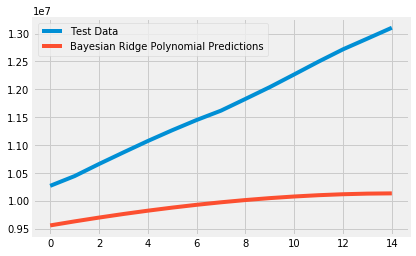

In [47]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

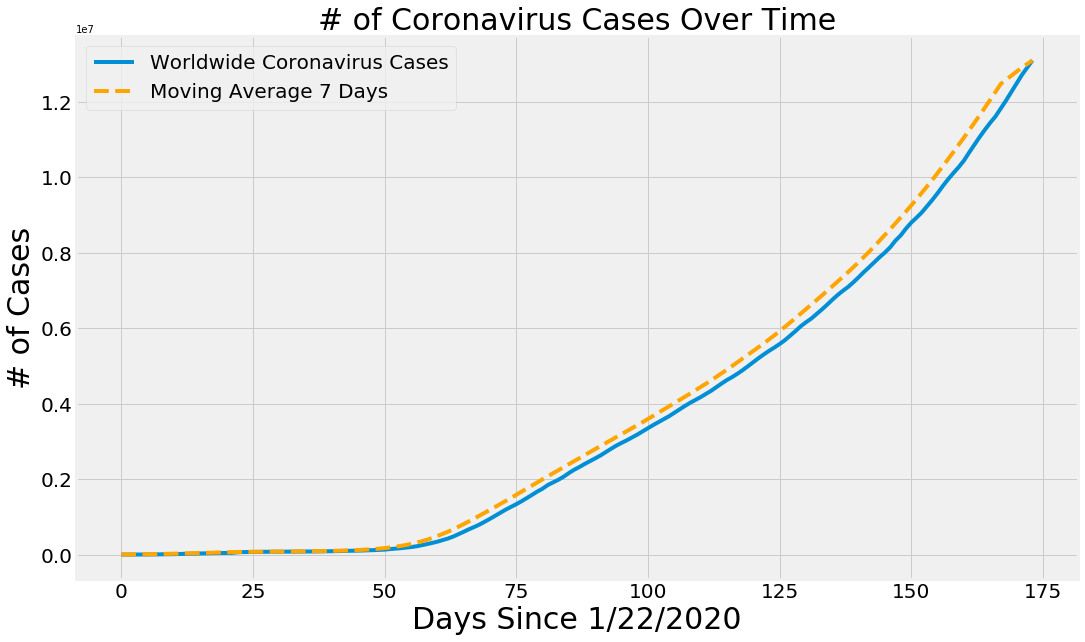

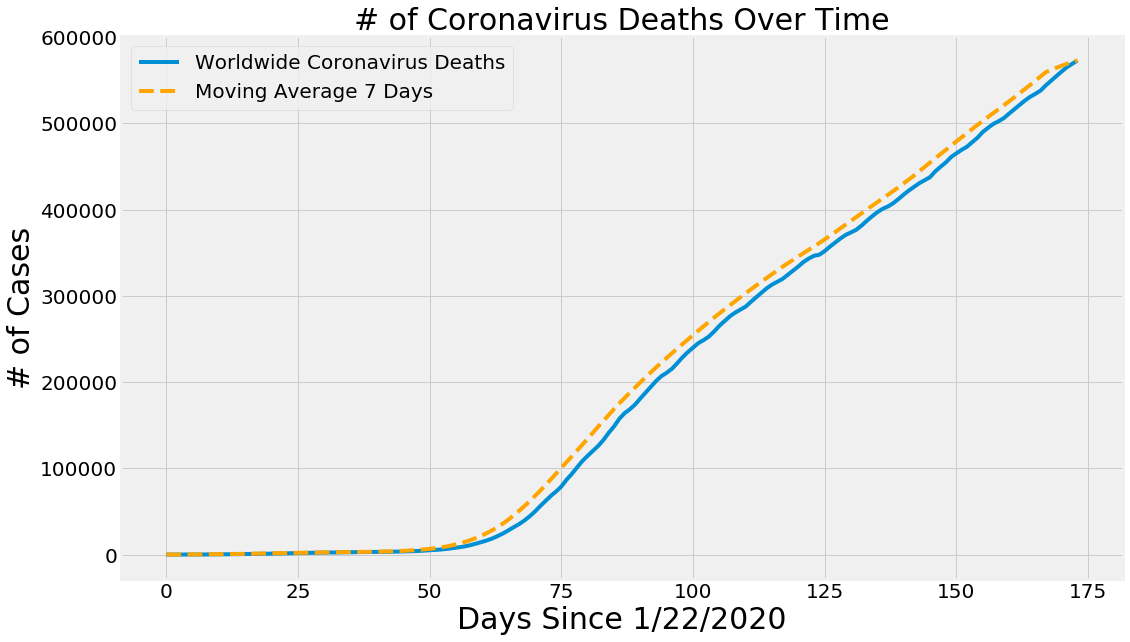

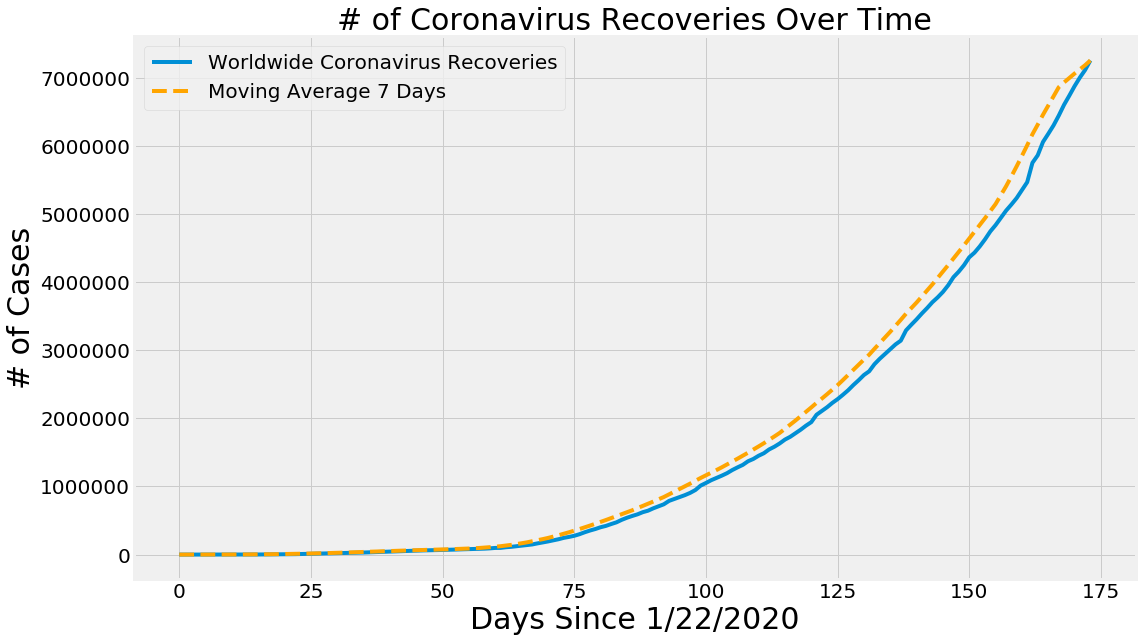

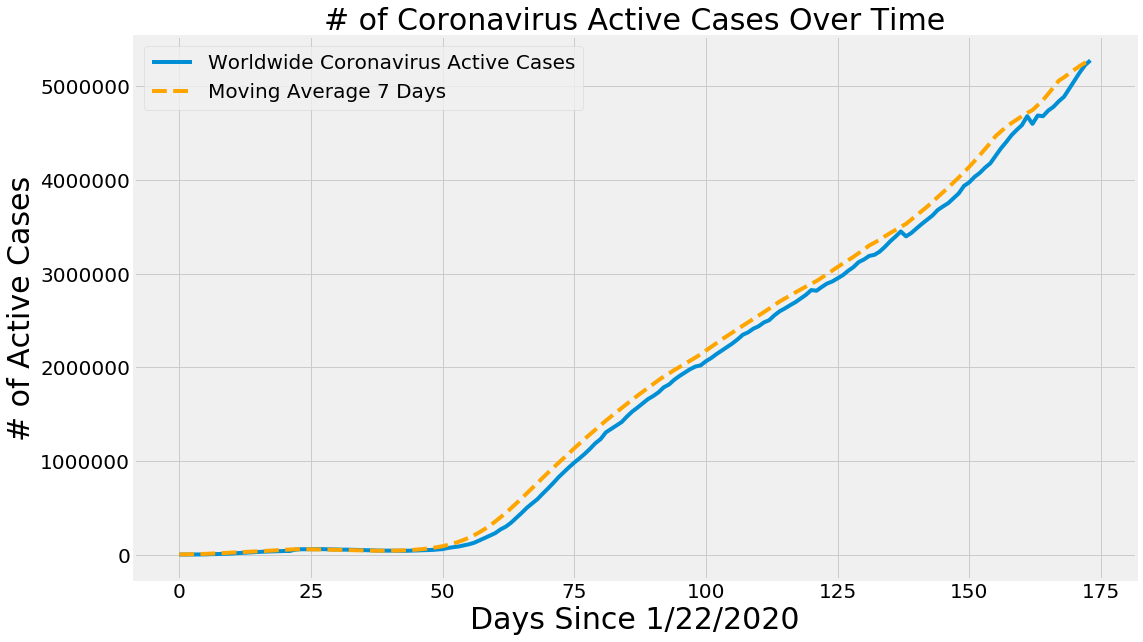

In [49]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, world_death_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Deaths', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_recovered)
plt.plot(adjusted_dates, world_recovery_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Recoveries', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_active)
plt.plot(adjusted_dates, world_active_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Active Cases', size=30)
plt.legend(['Worldwide Coronavirus Active Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

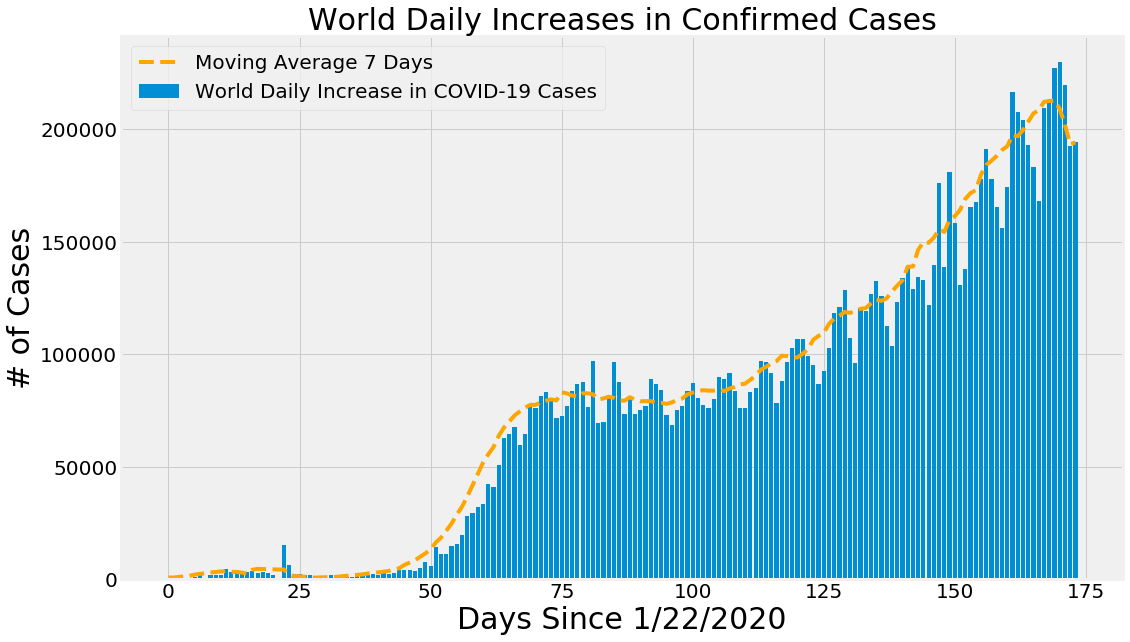

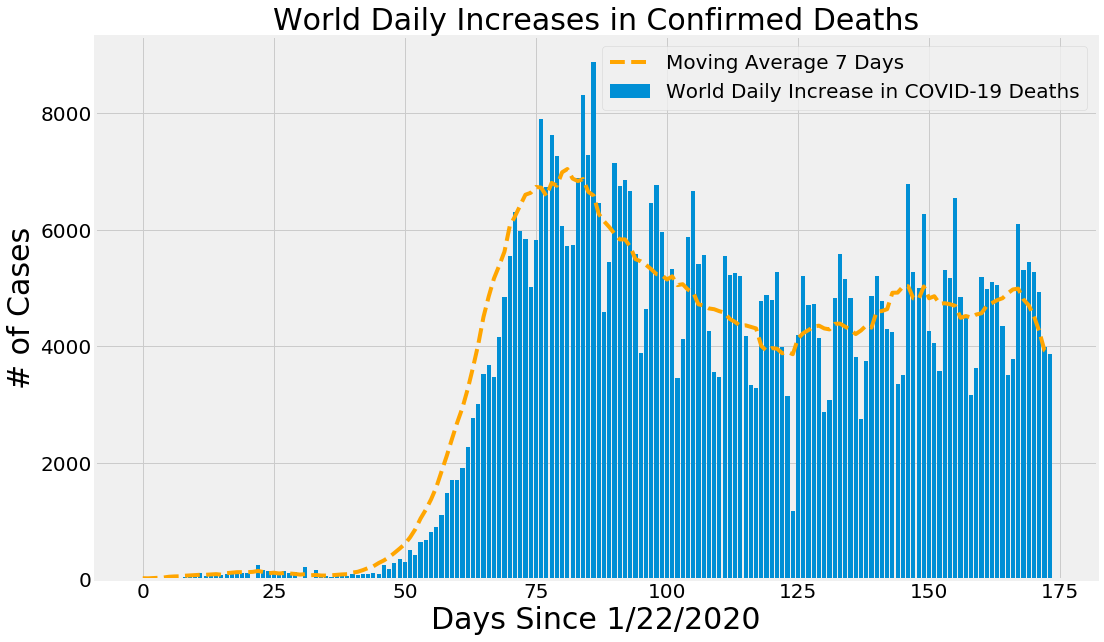

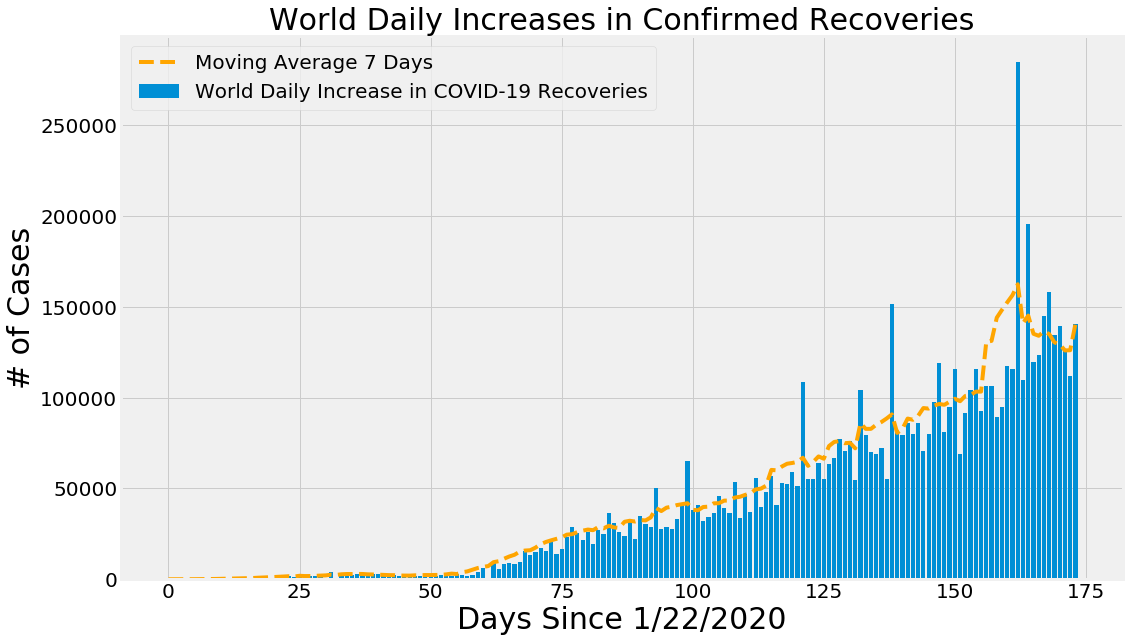

In [50]:
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_death)
plt.plot(adjusted_dates, world_daily_death_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Deaths'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_recovery)
plt.plot(adjusted_dates, world_daily_recovery_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Recoveries'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

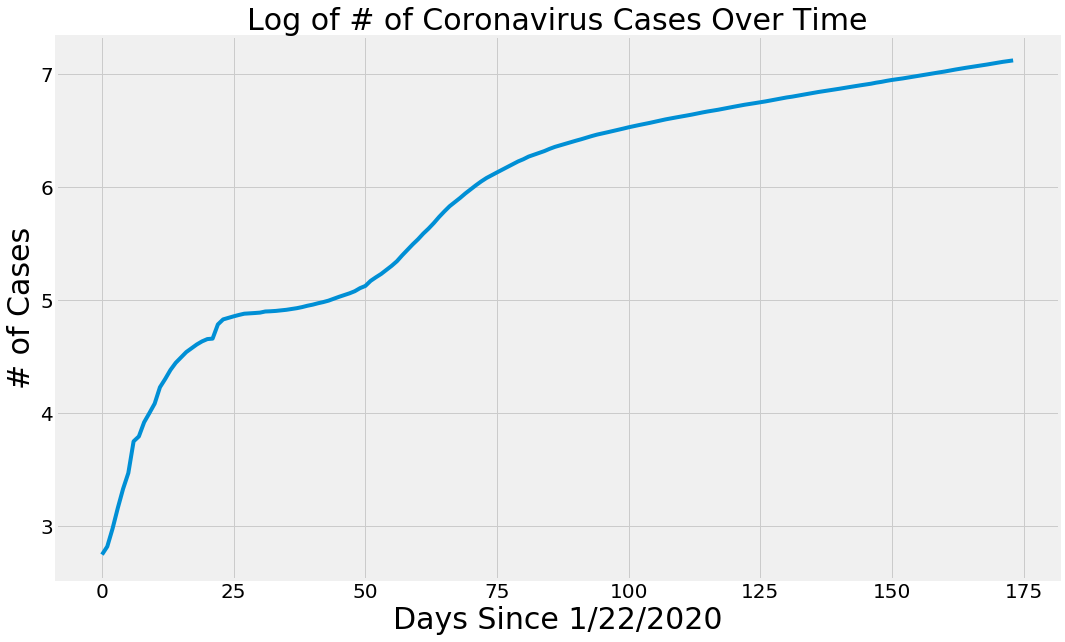

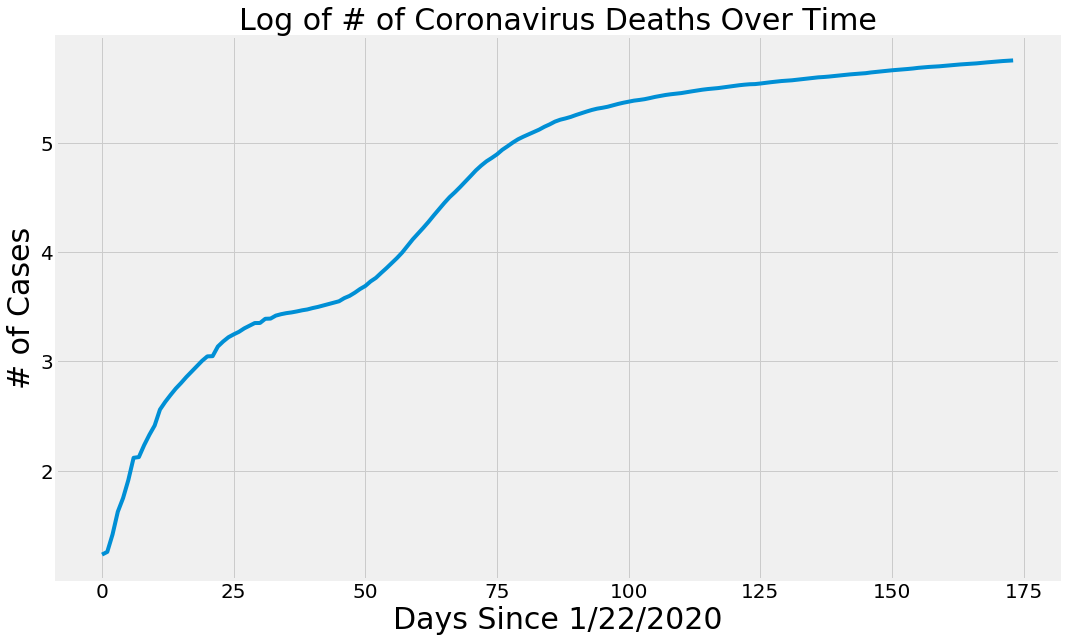

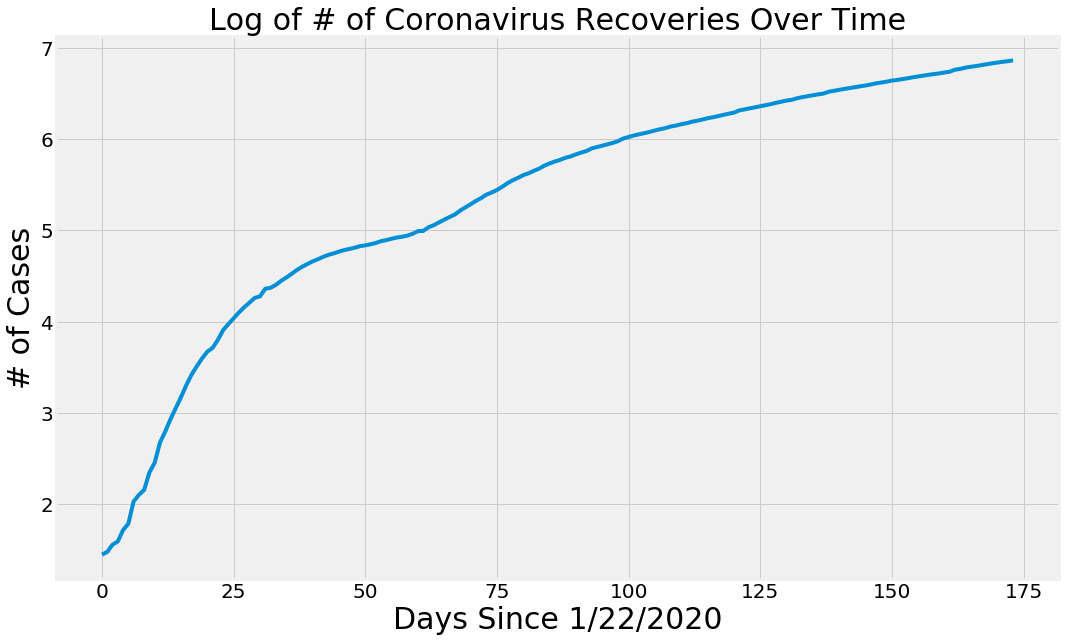

In [51]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(world_cases))
plt.title('Log of # of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(total_deaths))
plt.title('Log of # of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(total_recovered))
plt.title('Log of # of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [52]:
def country_plot(x, y1, y2, y3, y4, country):
    # window is set as 14 in in the beginning of the notebook 
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
    recovery_increase_avg = moving_average(y4, window)
    plt.figure(figsize=(16, 10))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
    plt.figure(figsize=(16, 10))
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
    plt.figure(figsize=(16, 10))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
    plt.figure(figsize=(16, 10))
    plt.bar(x, y4)
    plt.plot(x, recovery_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Recoveries'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

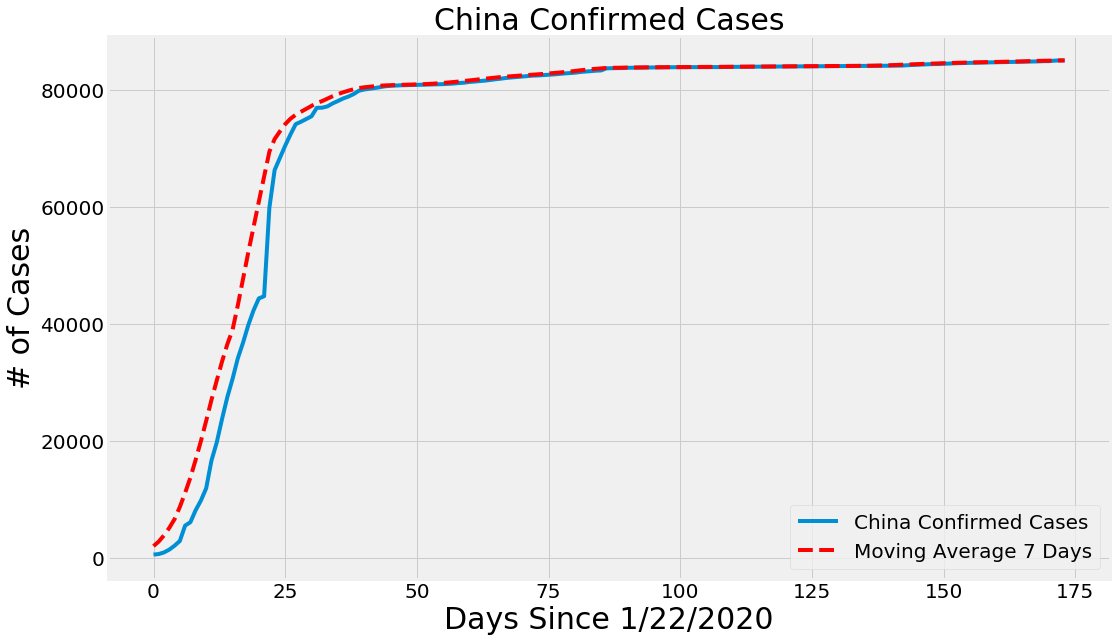

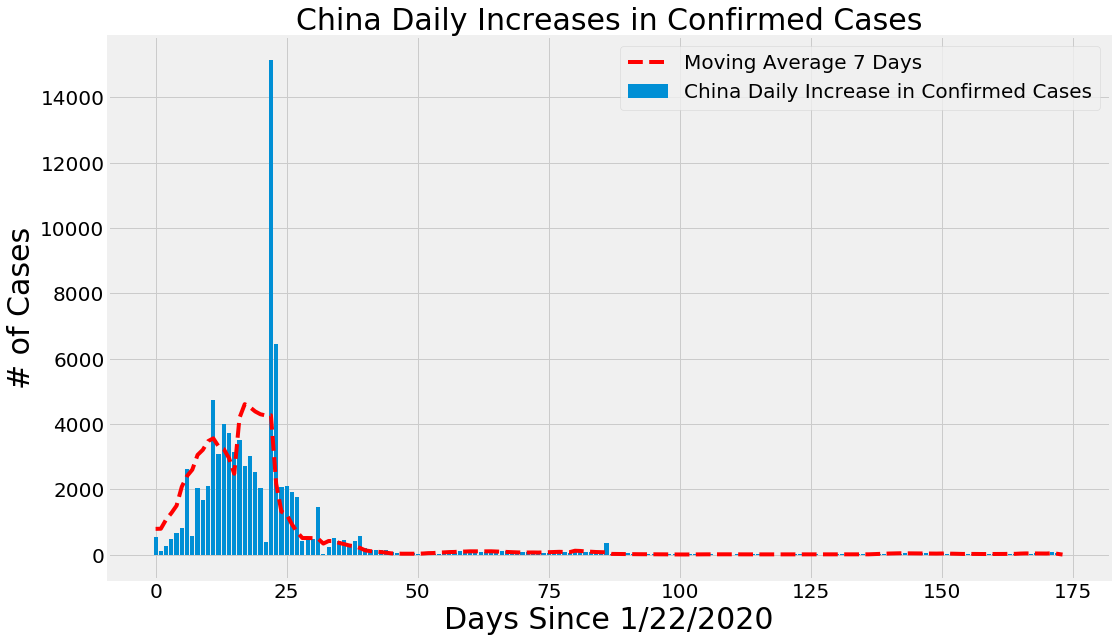

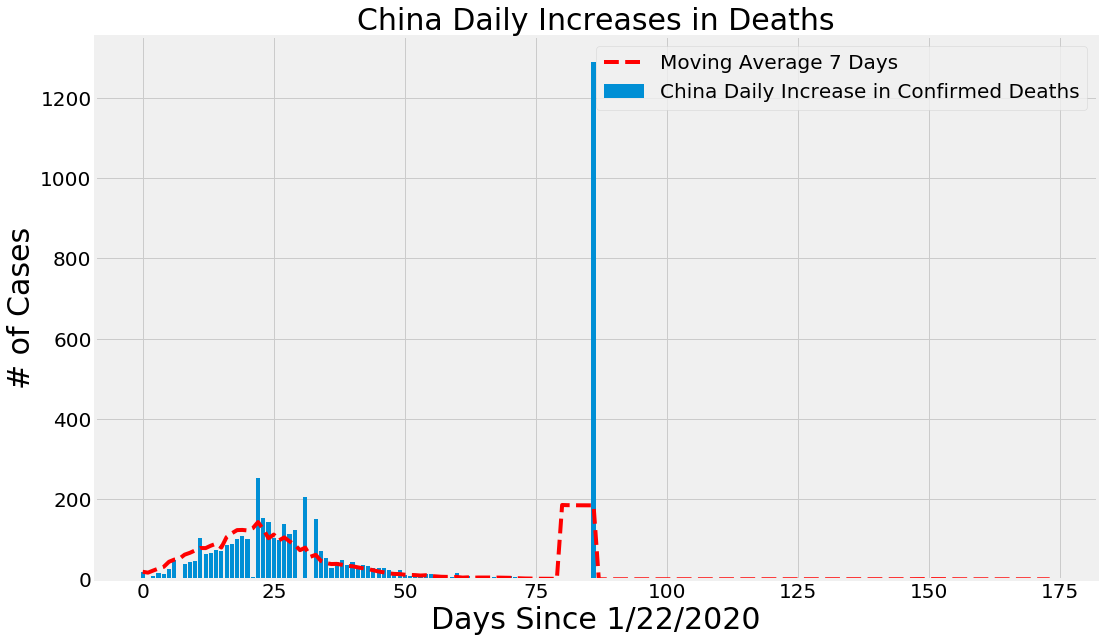

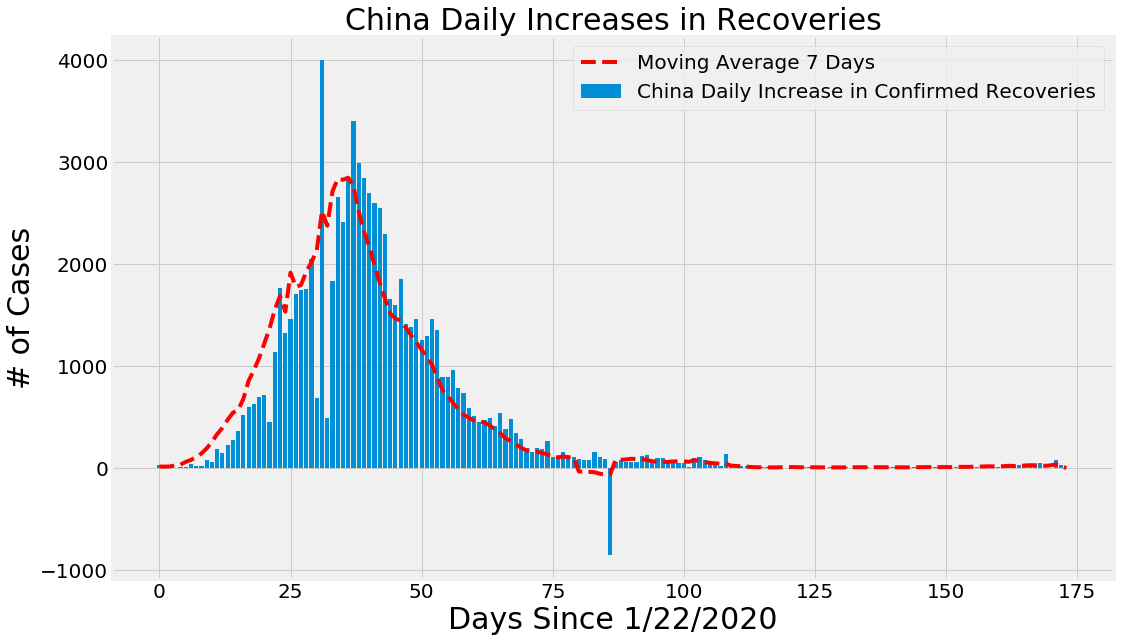

In [53]:
country_plot(adjusted_dates, china_cases, china_daily_increase, china_daily_death, china_daily_recovery, 'China')

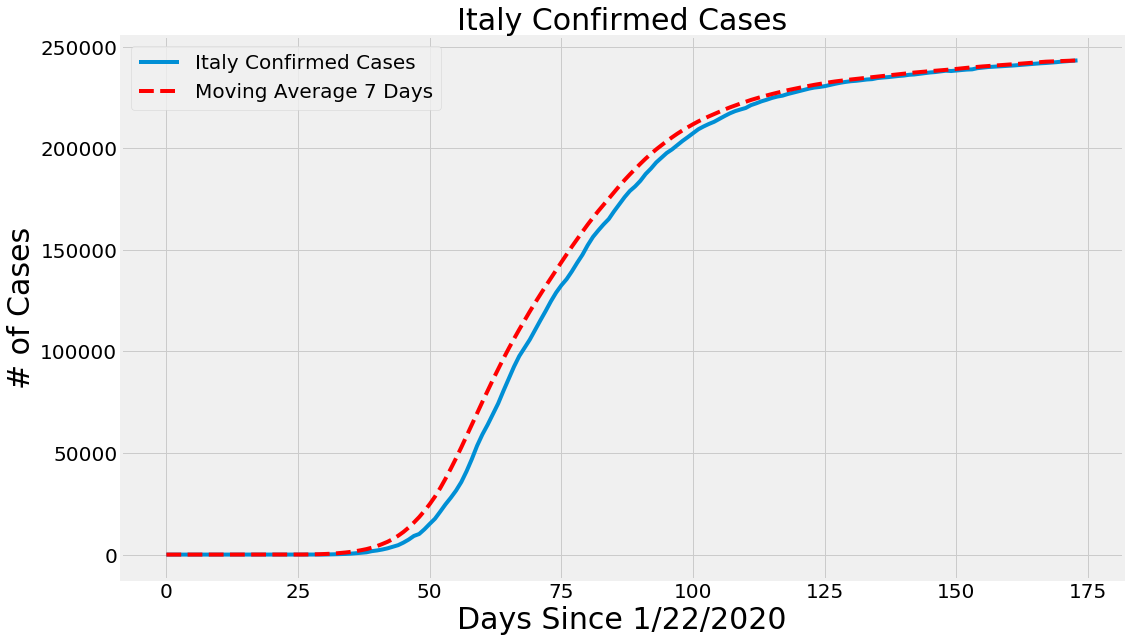

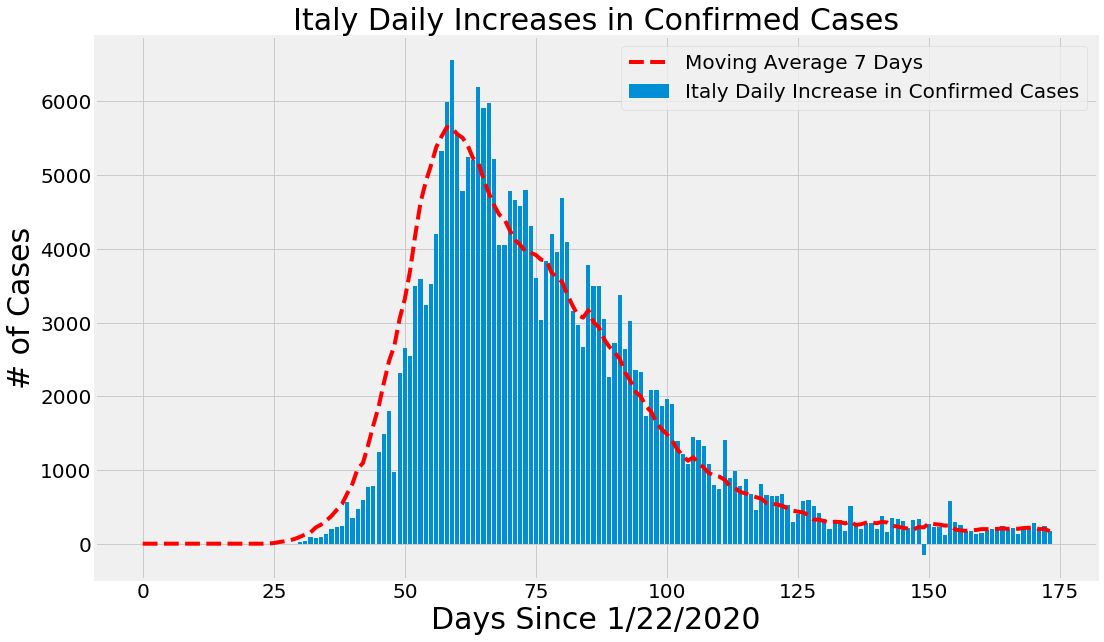

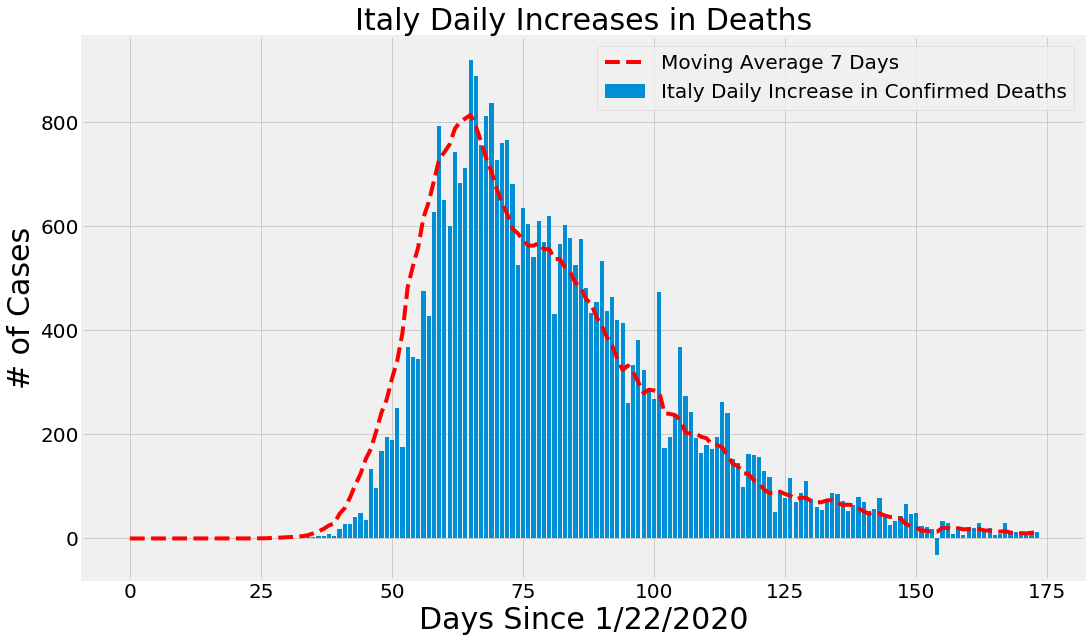

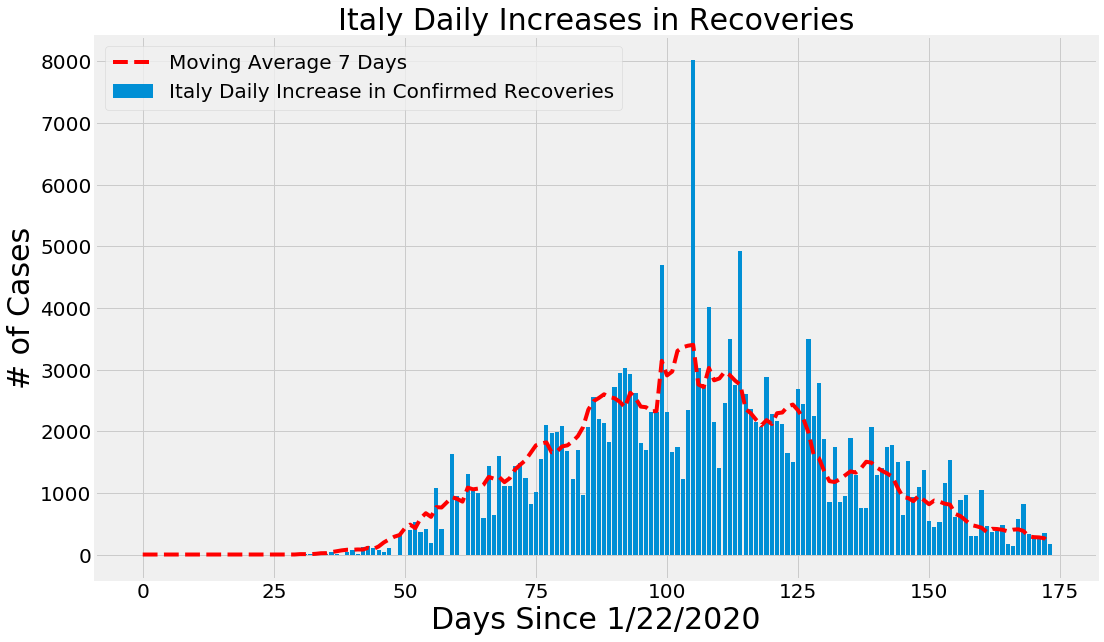

In [54]:
country_plot(adjusted_dates, italy_cases, italy_daily_increase, italy_daily_death, italy_daily_recovery, 'Italy')

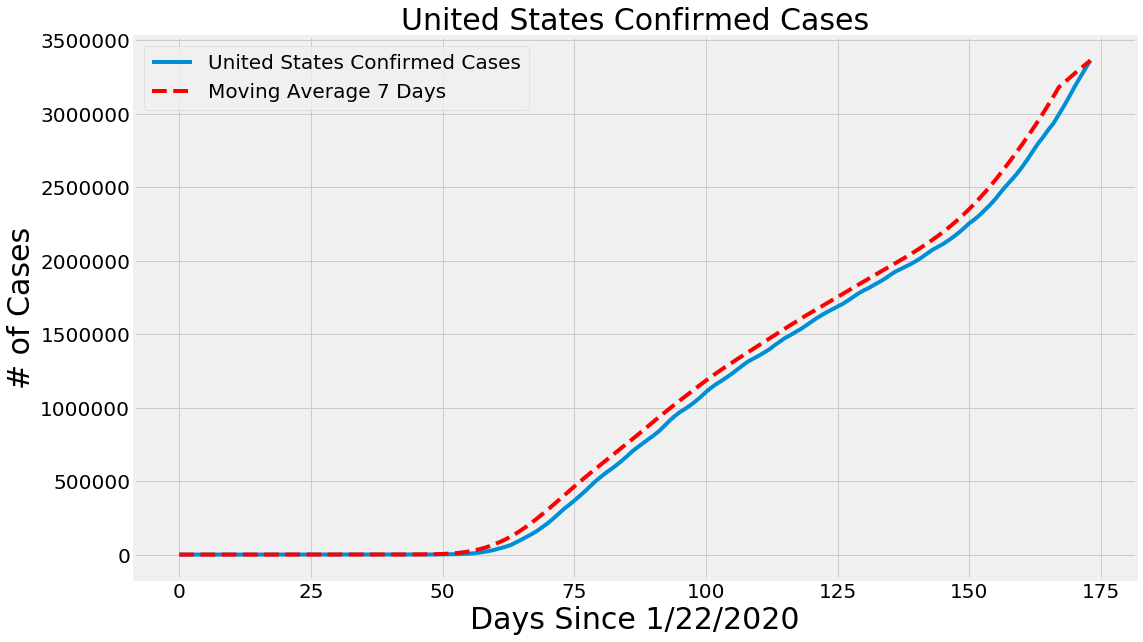

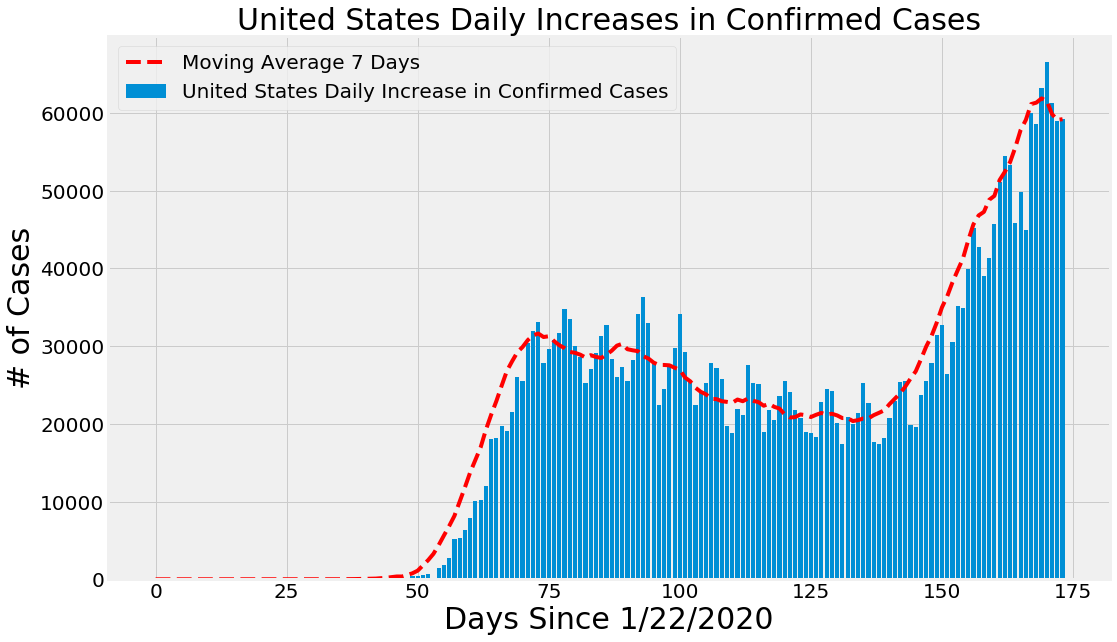

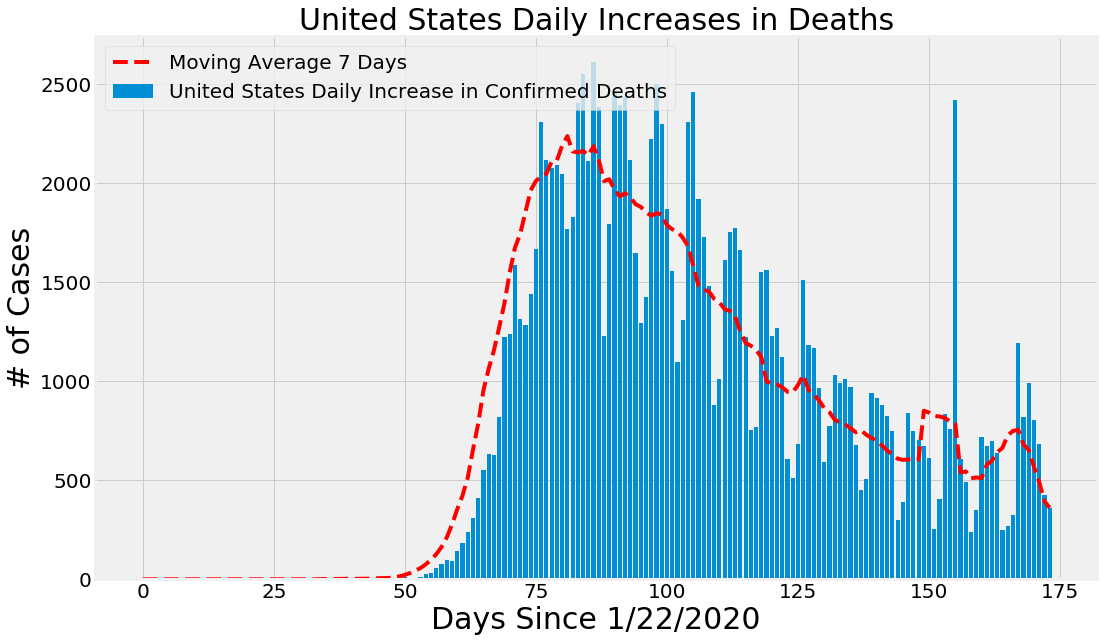

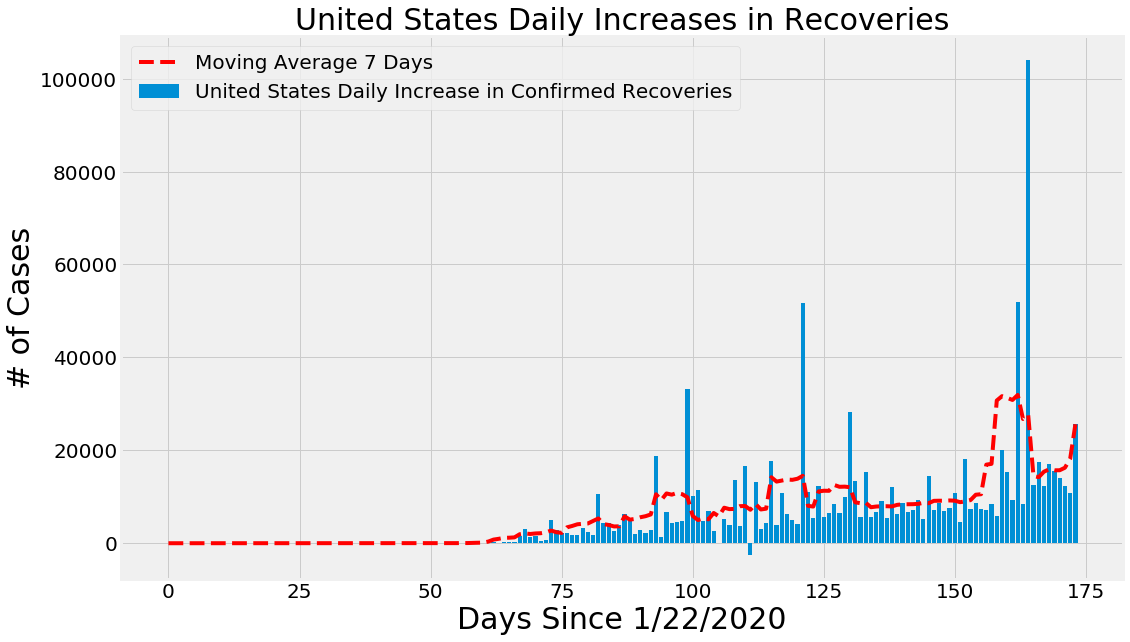

In [55]:
country_plot(adjusted_dates, us_cases, us_daily_increase, us_daily_death, us_daily_recovery, 'United States')

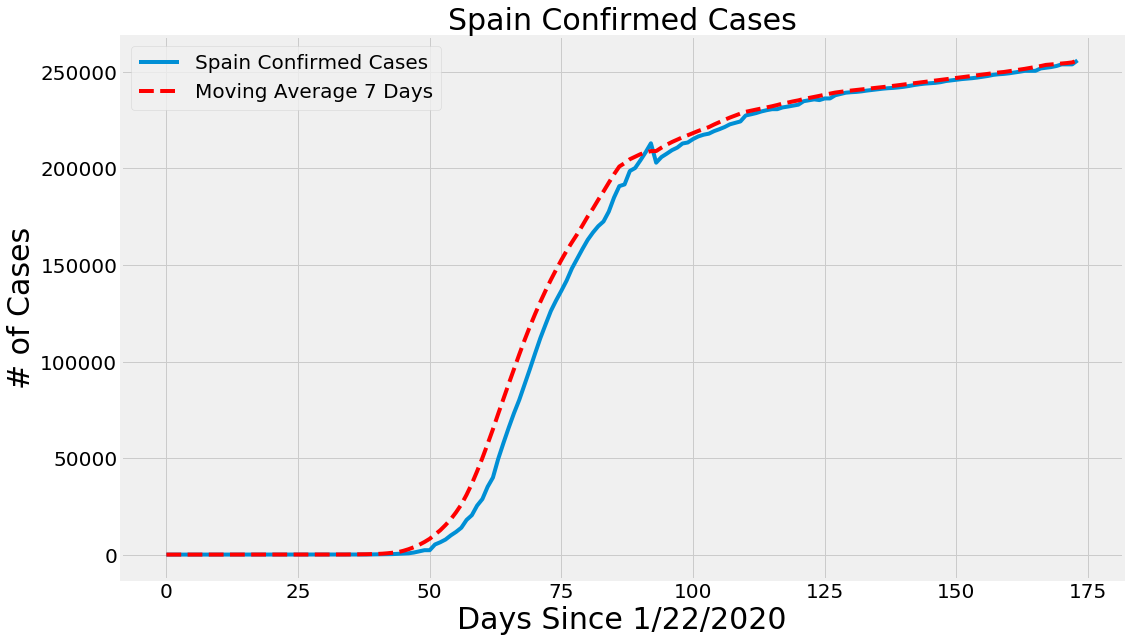

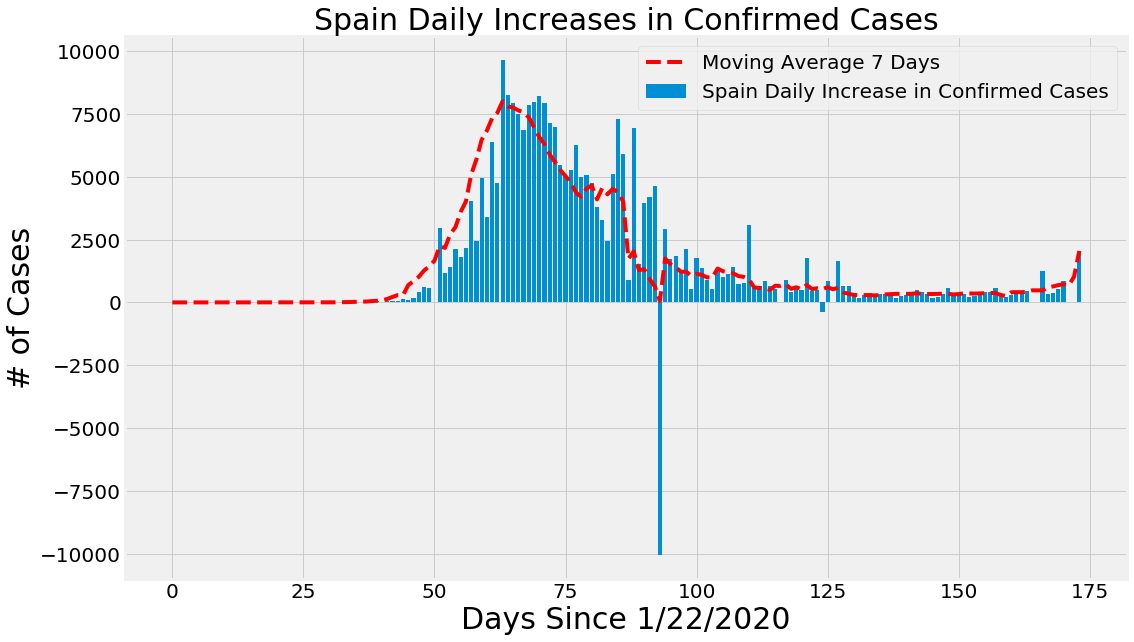

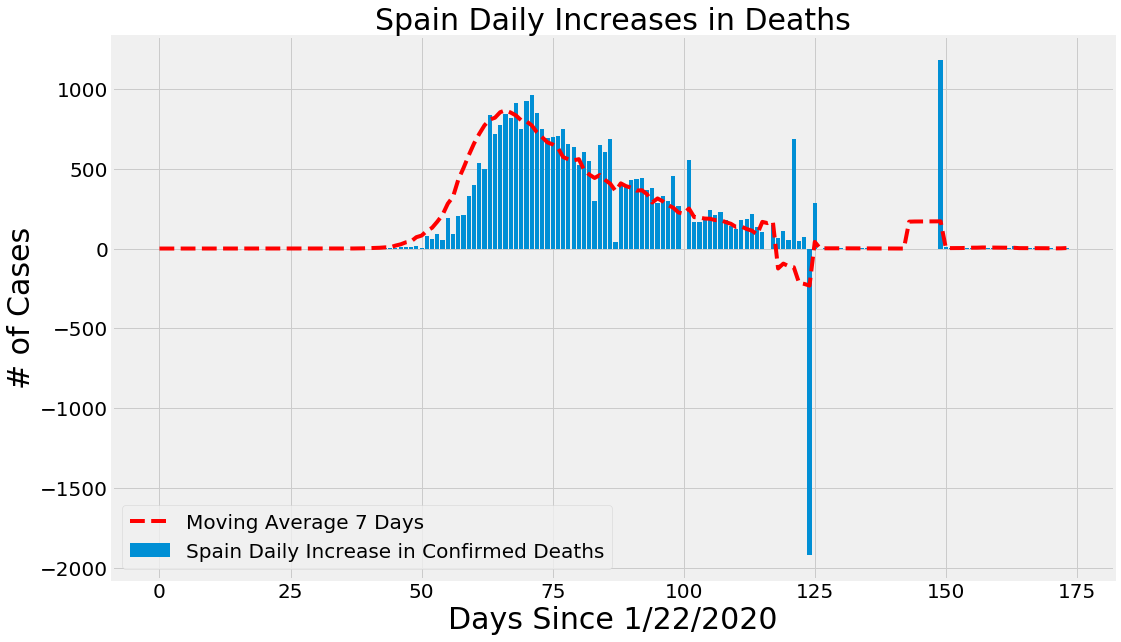

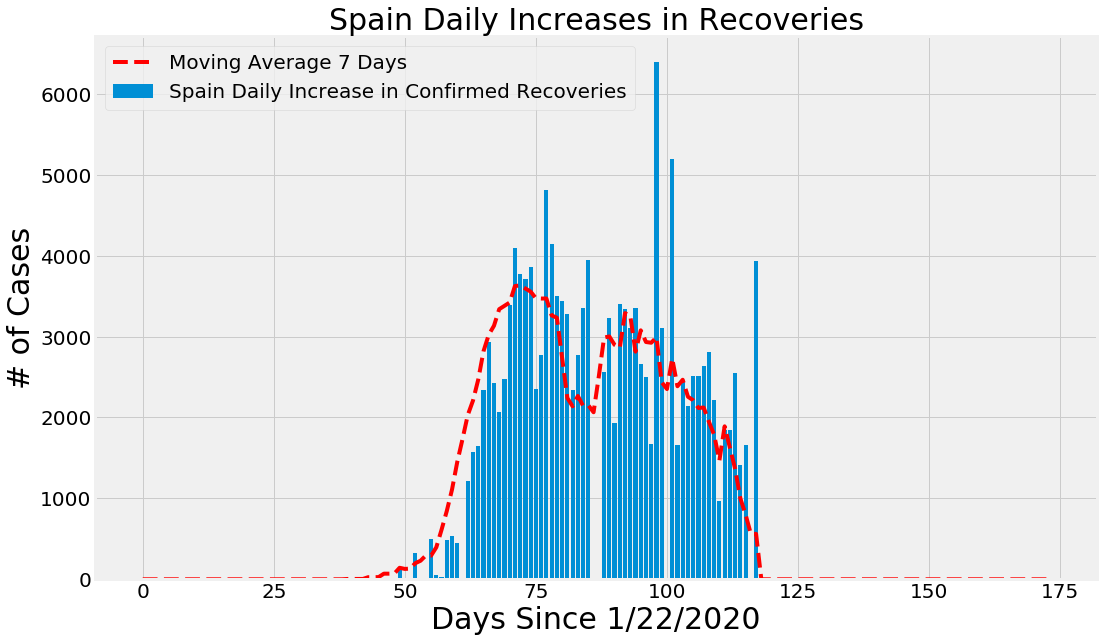

In [56]:
country_plot(adjusted_dates, spain_cases, spain_daily_increase, spain_daily_death, spain_daily_recovery, 'Spain')

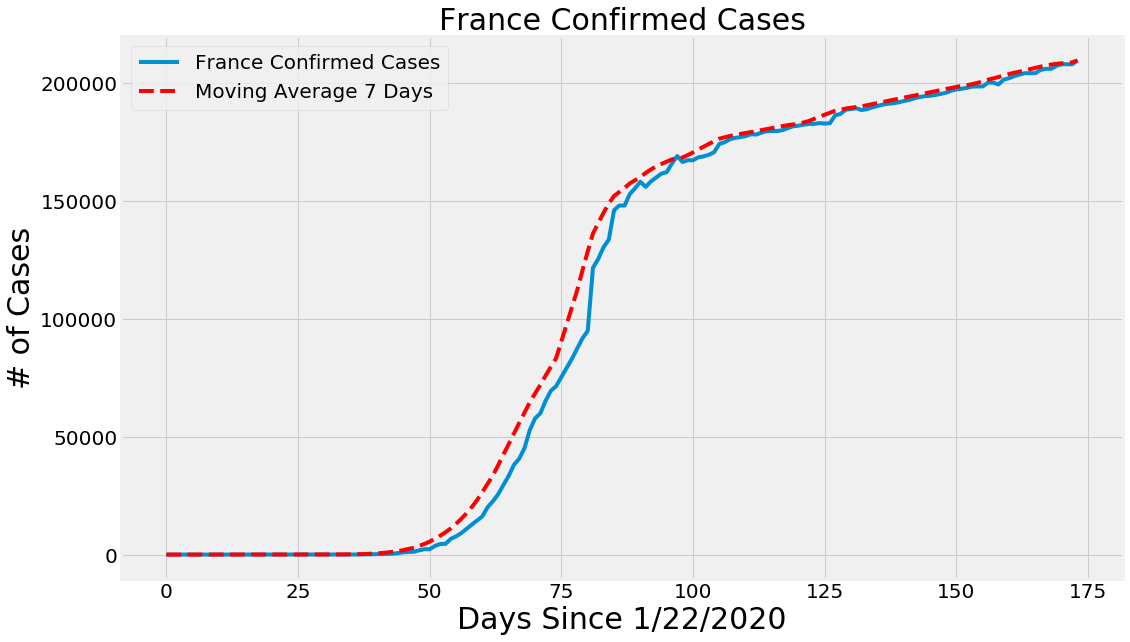

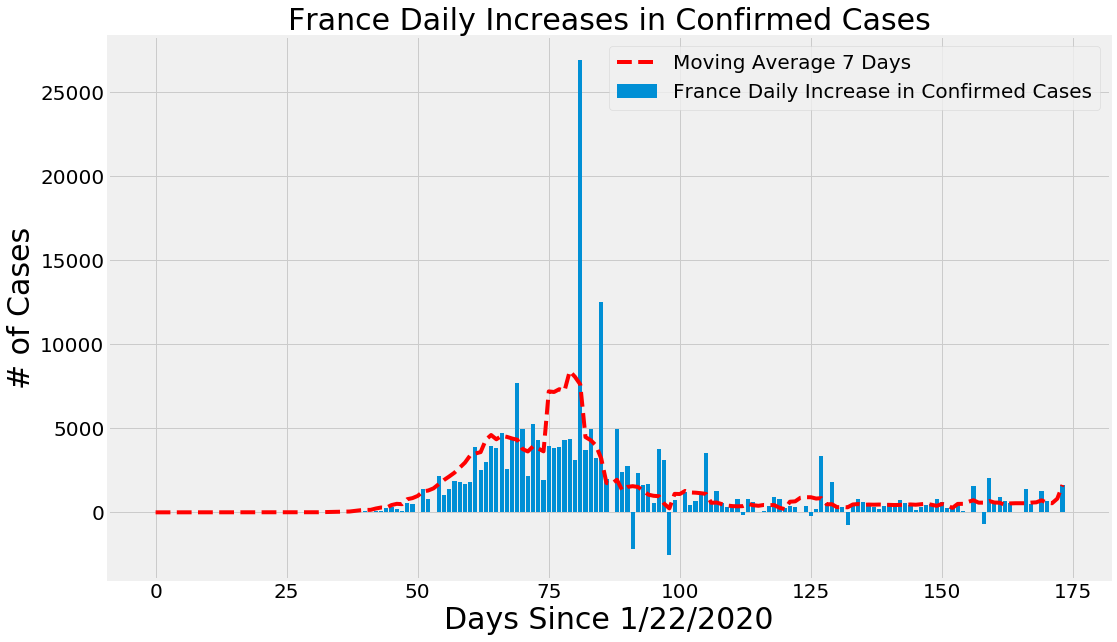

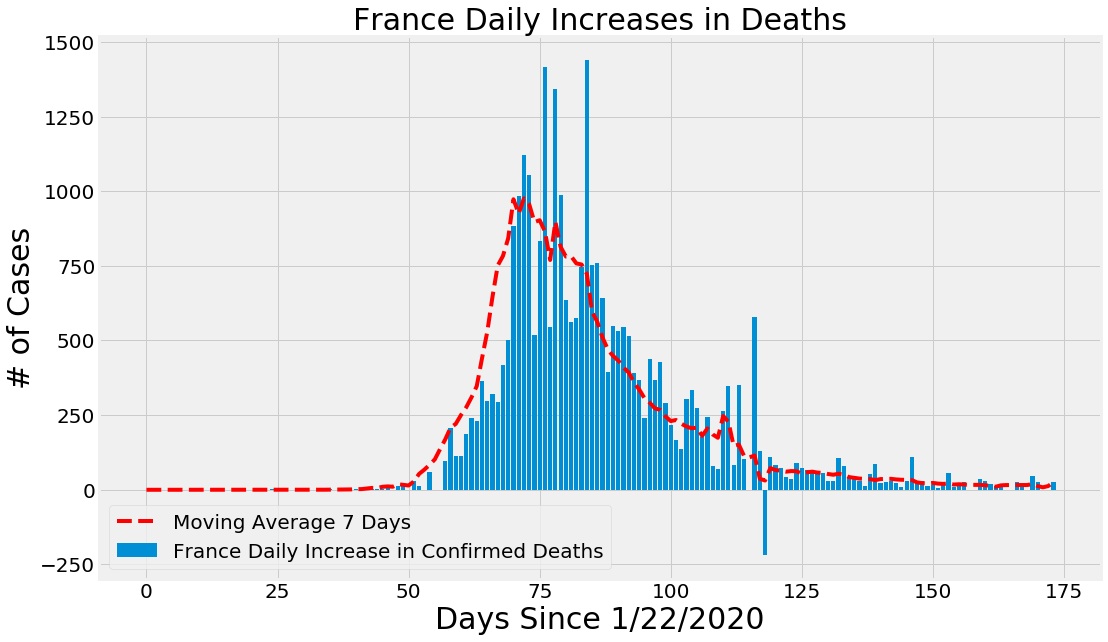

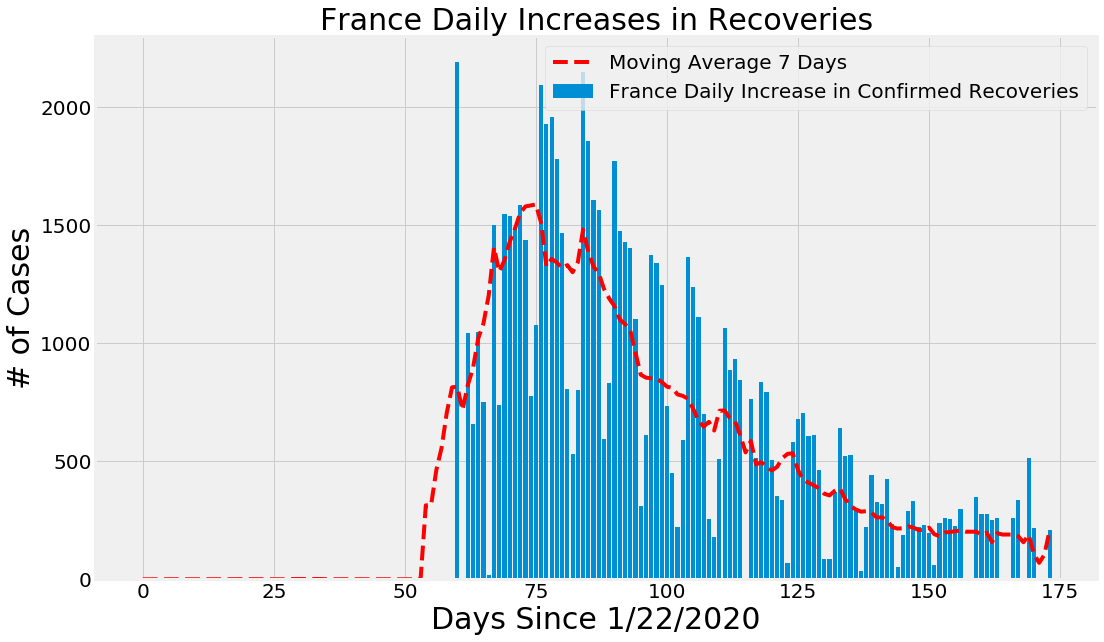

In [57]:
country_plot(adjusted_dates, france_cases, france_daily_increase, france_daily_death, france_daily_recovery, 'France')

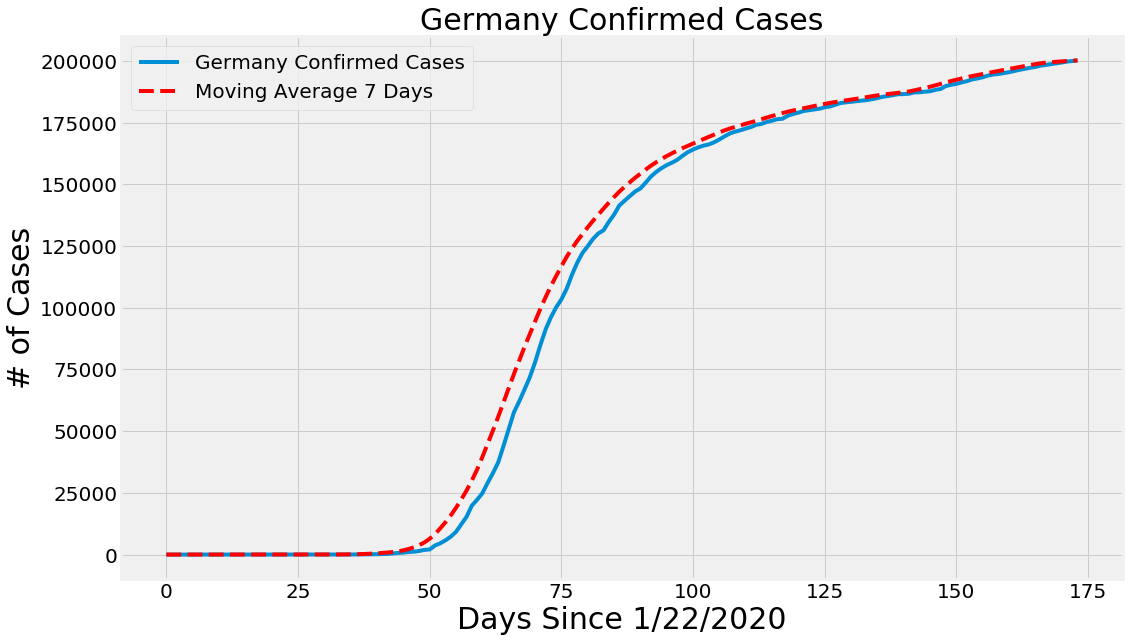

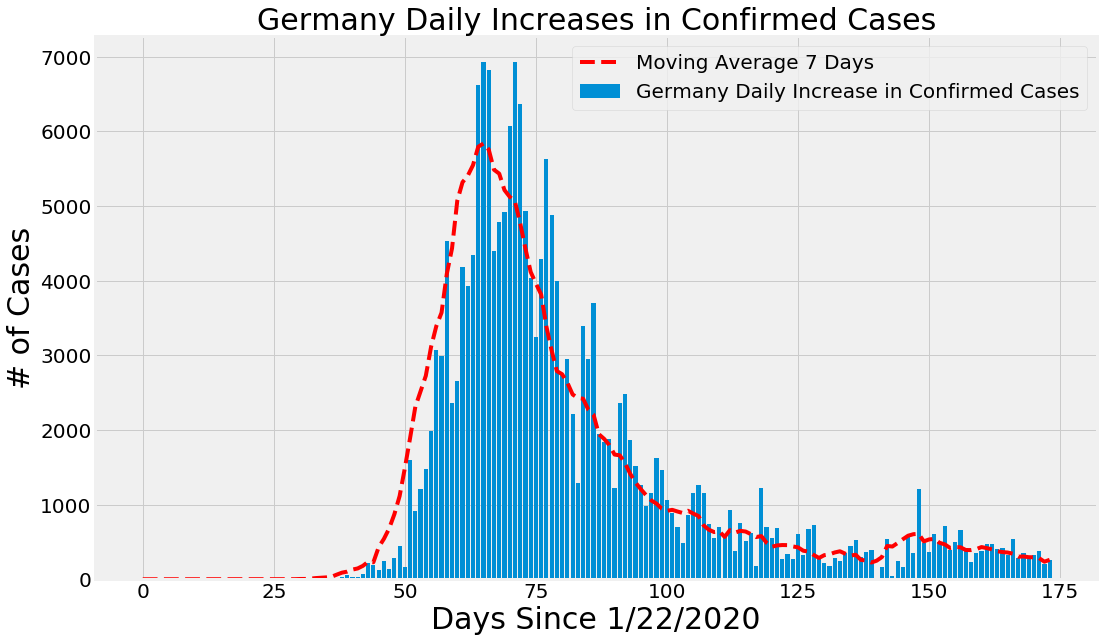

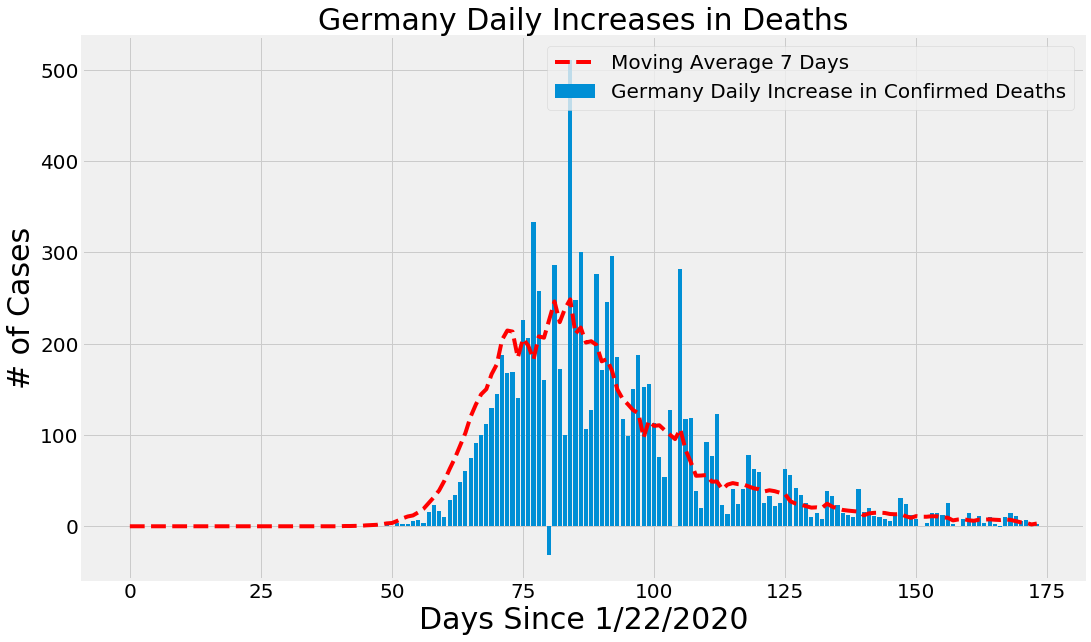

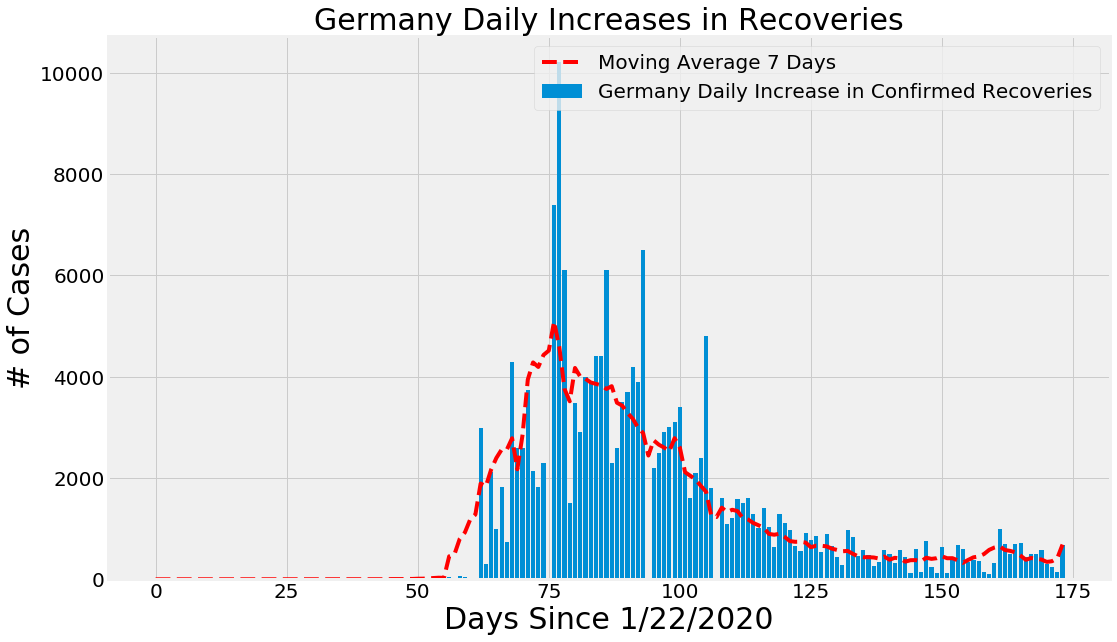

In [58]:
country_plot(adjusted_dates, germany_cases, germany_daily_increase, germany_daily_death, germany_daily_recovery, 'Germany')

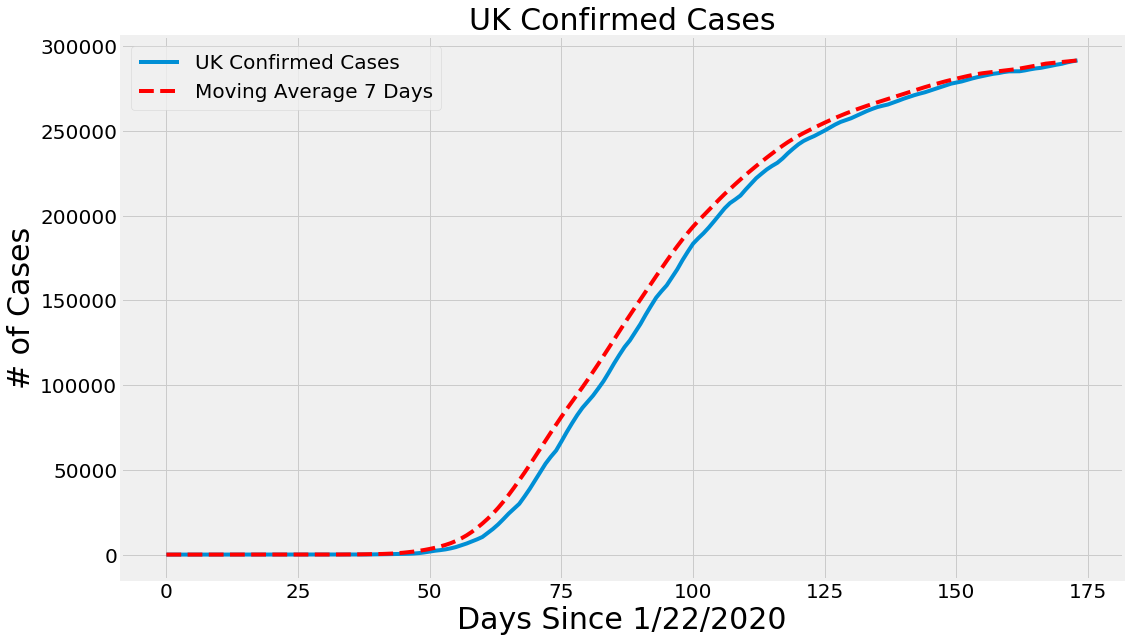

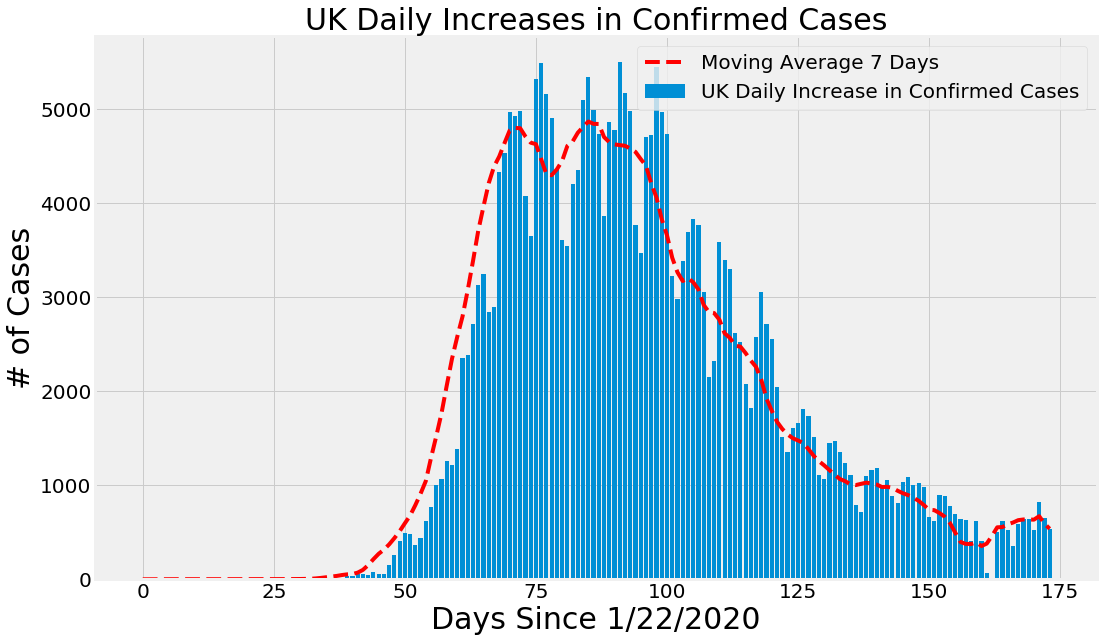

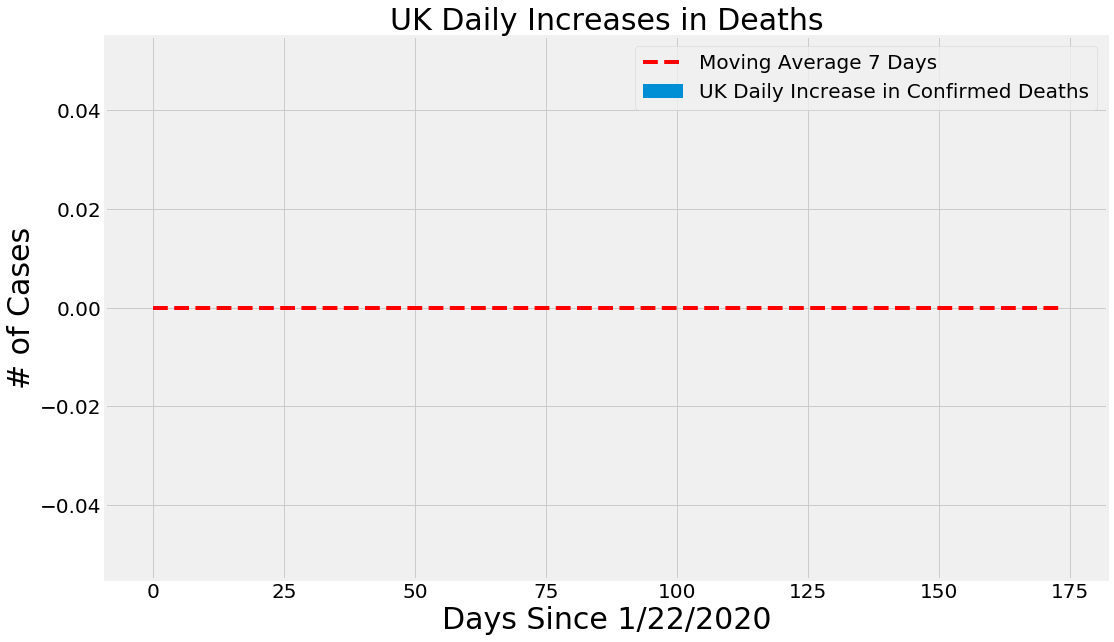

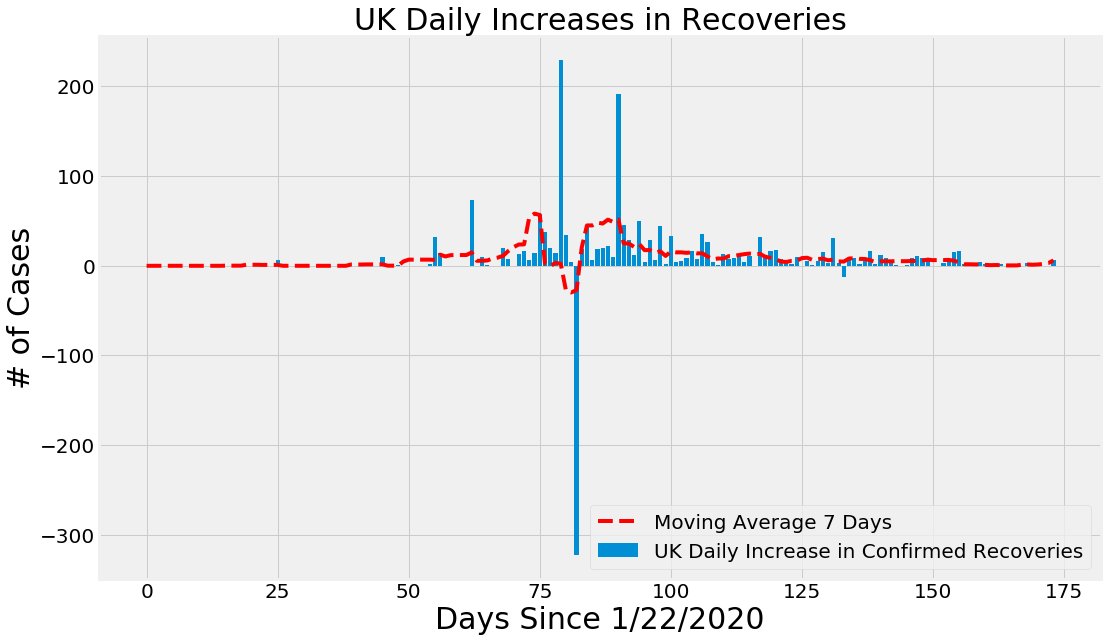

In [59]:
country_plot(adjusted_dates, uk_cases, uk_daily_increase, uk_daily_death, uk_daily_recovery, 'UK')

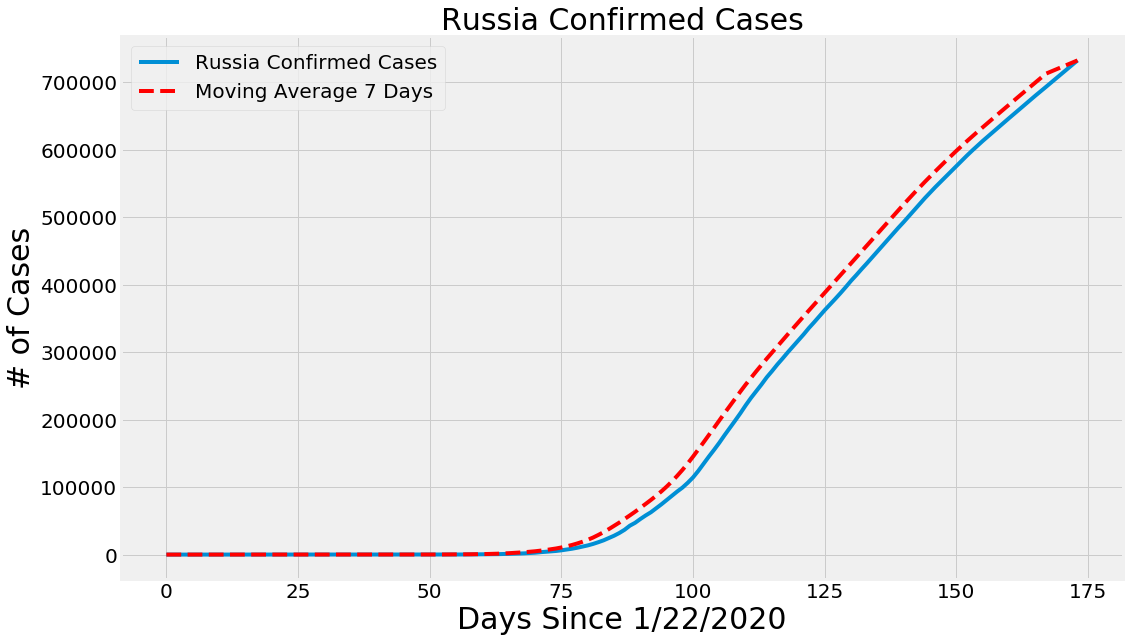

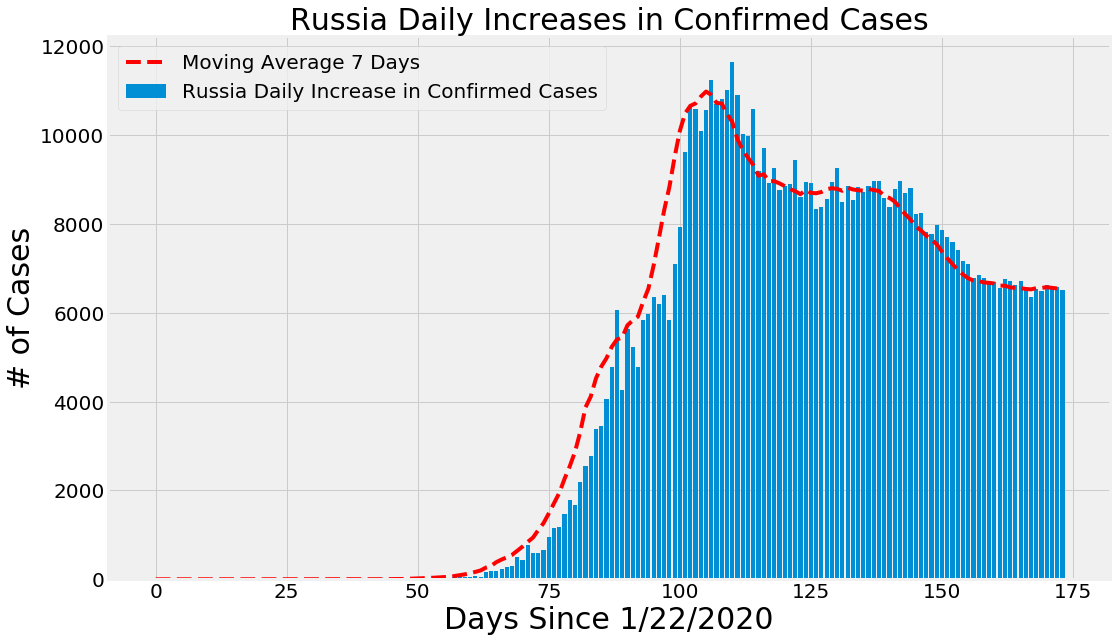

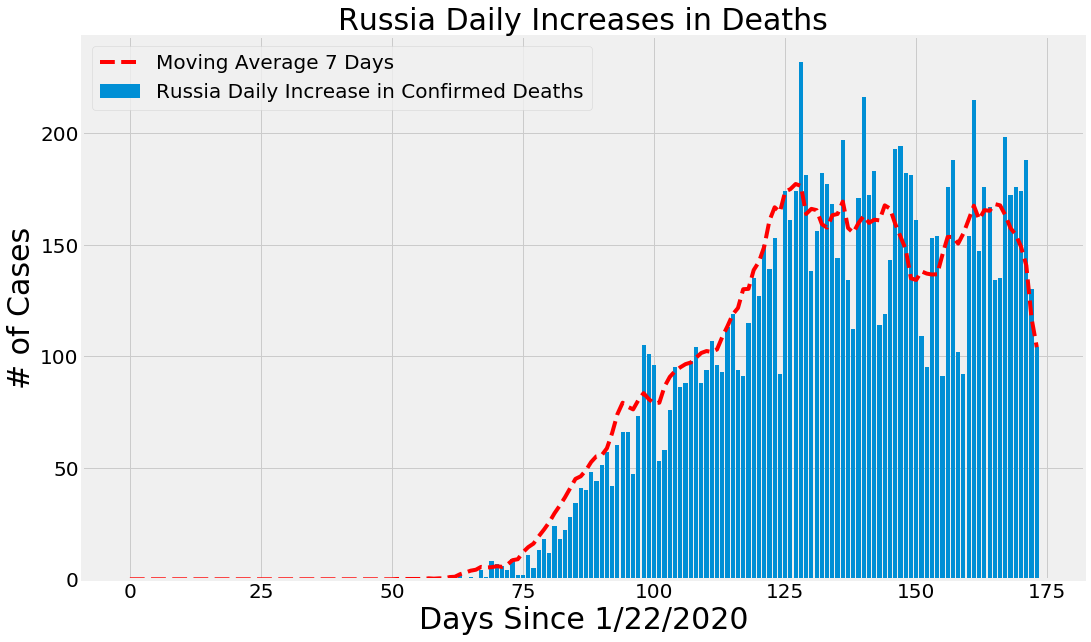

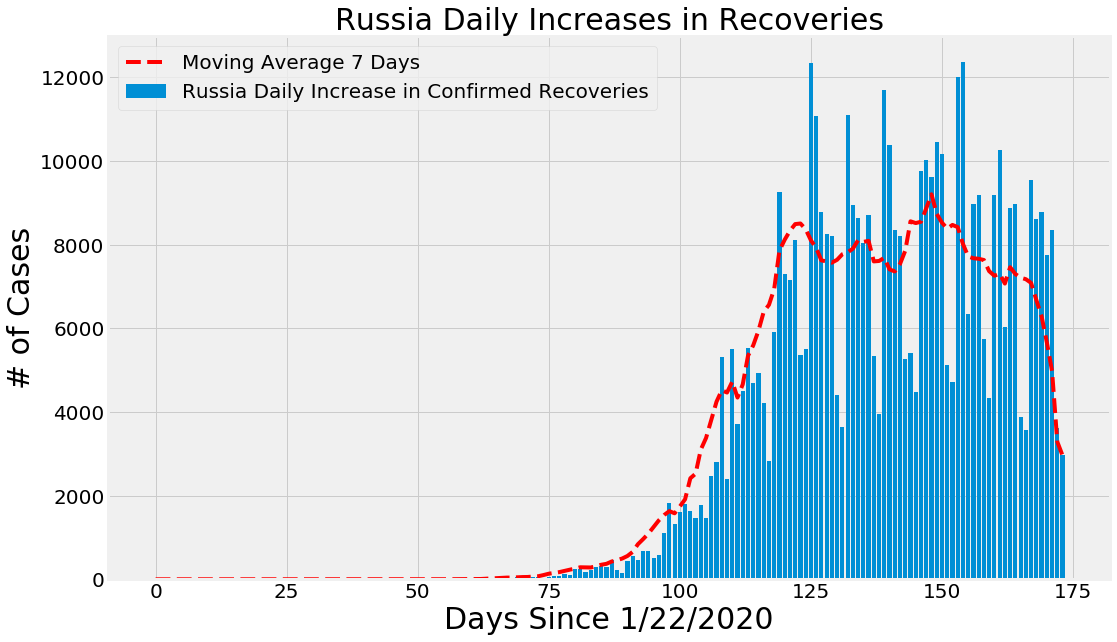

In [60]:
country_plot(adjusted_dates, russia_cases, russia_daily_increase, russia_daily_death, russia_daily_recovery, 'Russia')

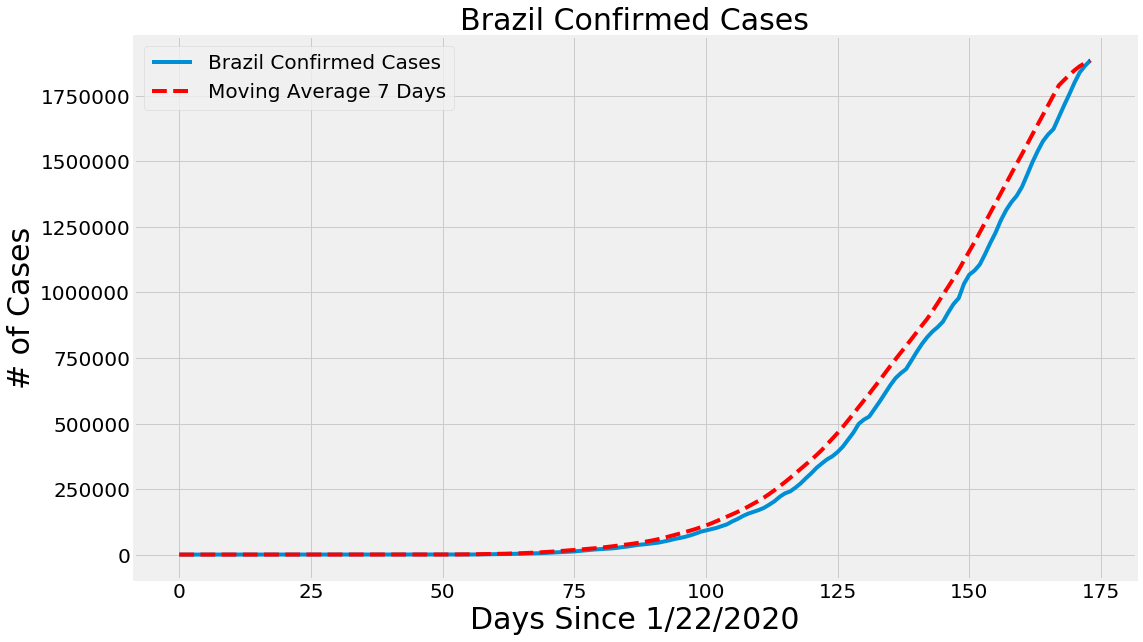

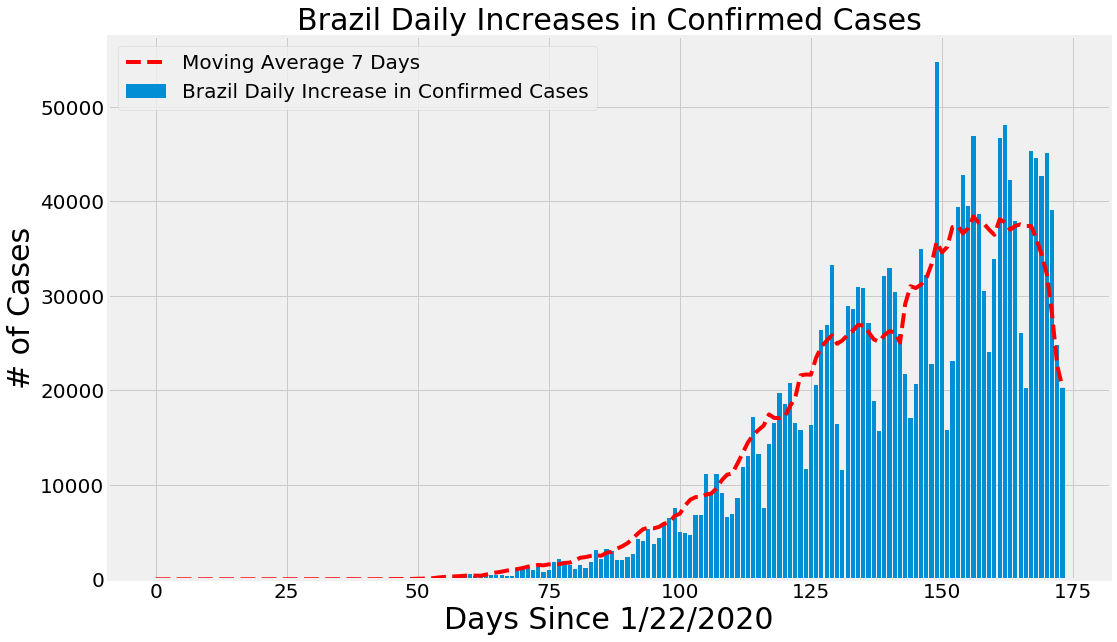

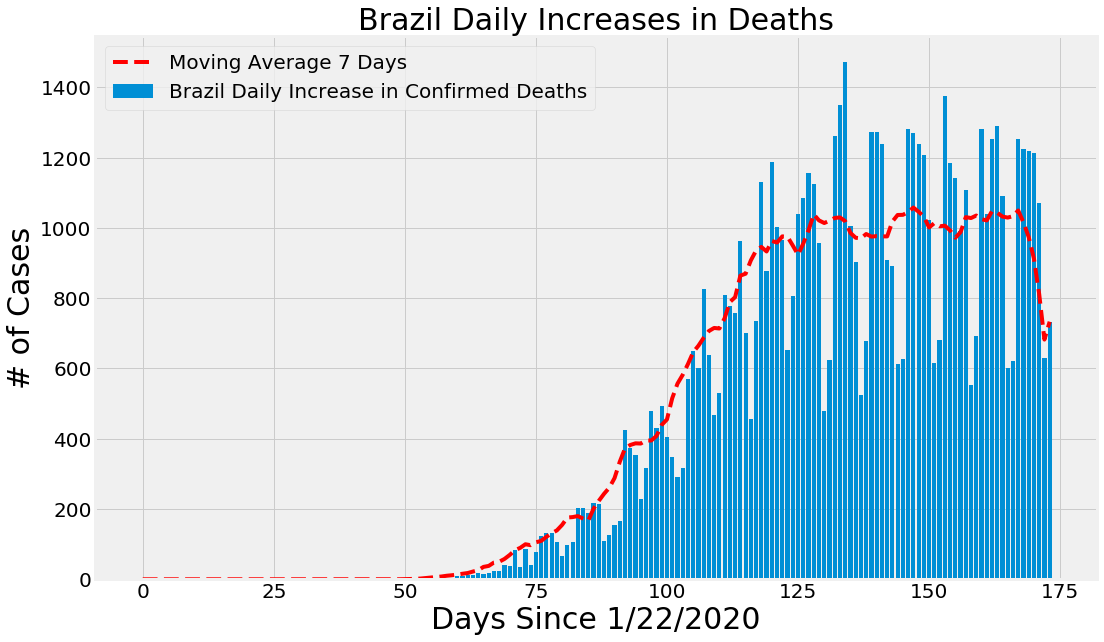

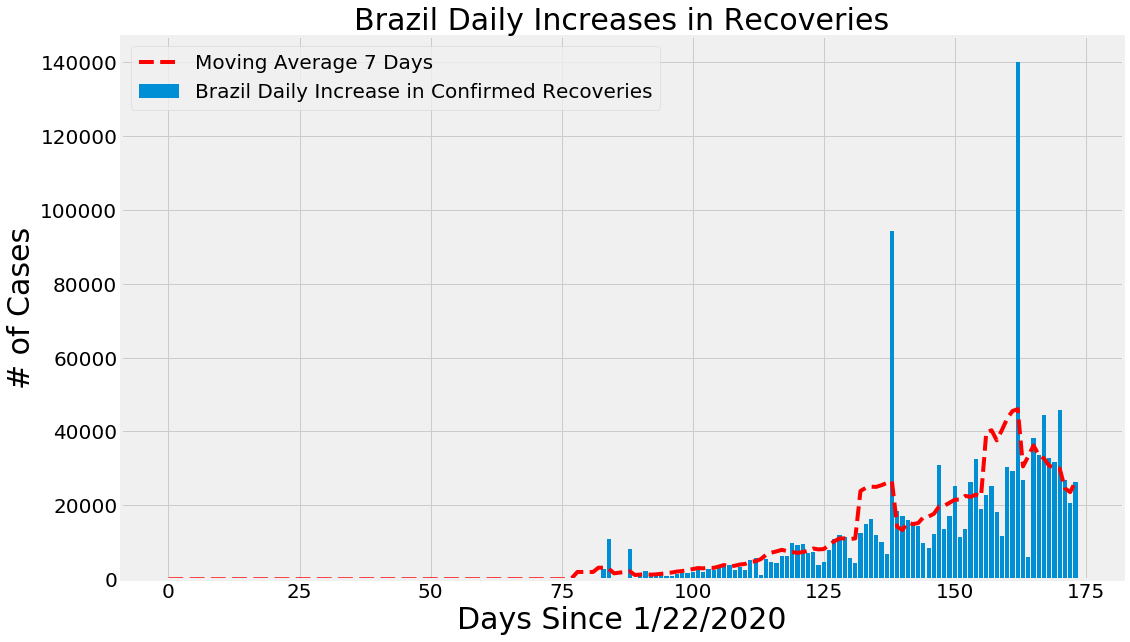

In [61]:
country_plot(adjusted_dates, brazil_cases, brazil_daily_increase, brazil_daily_death, brazil_daily_recovery, 'Brazil')

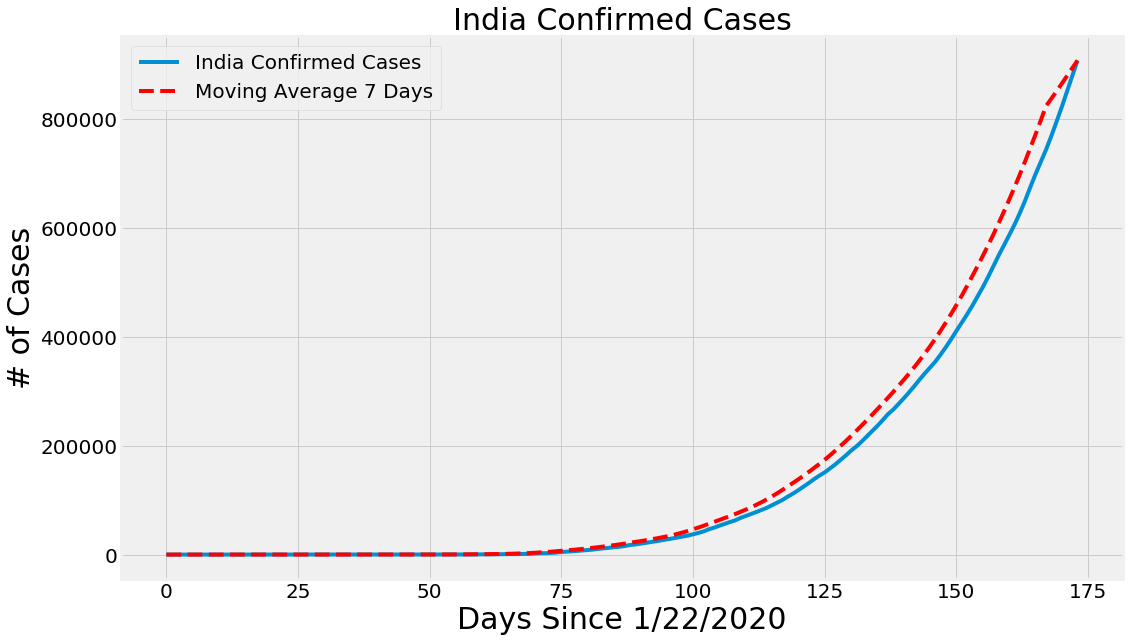

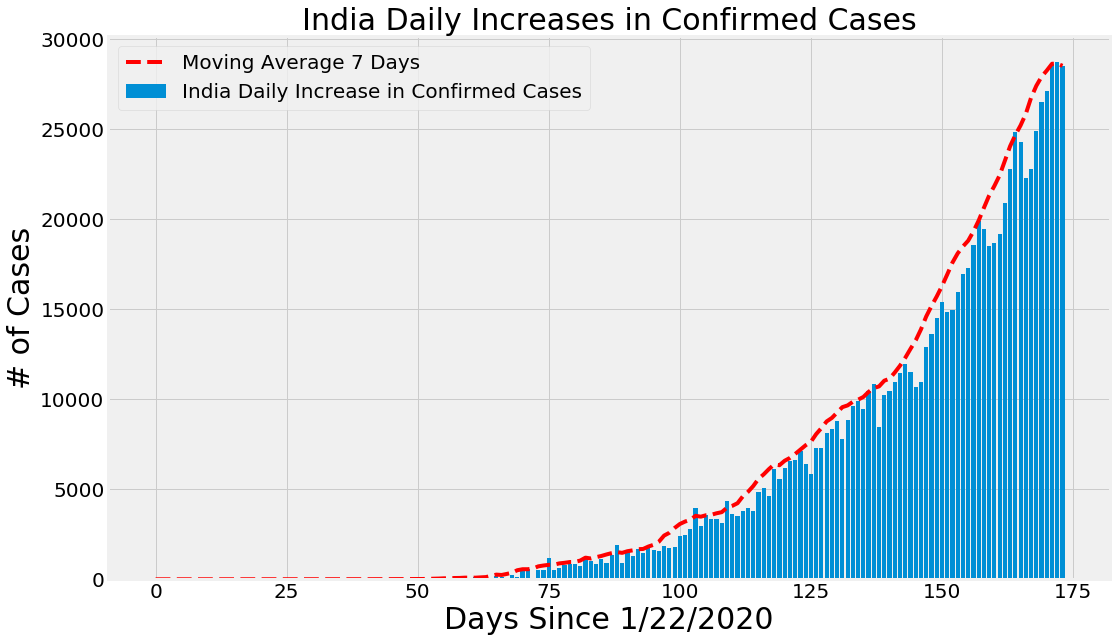

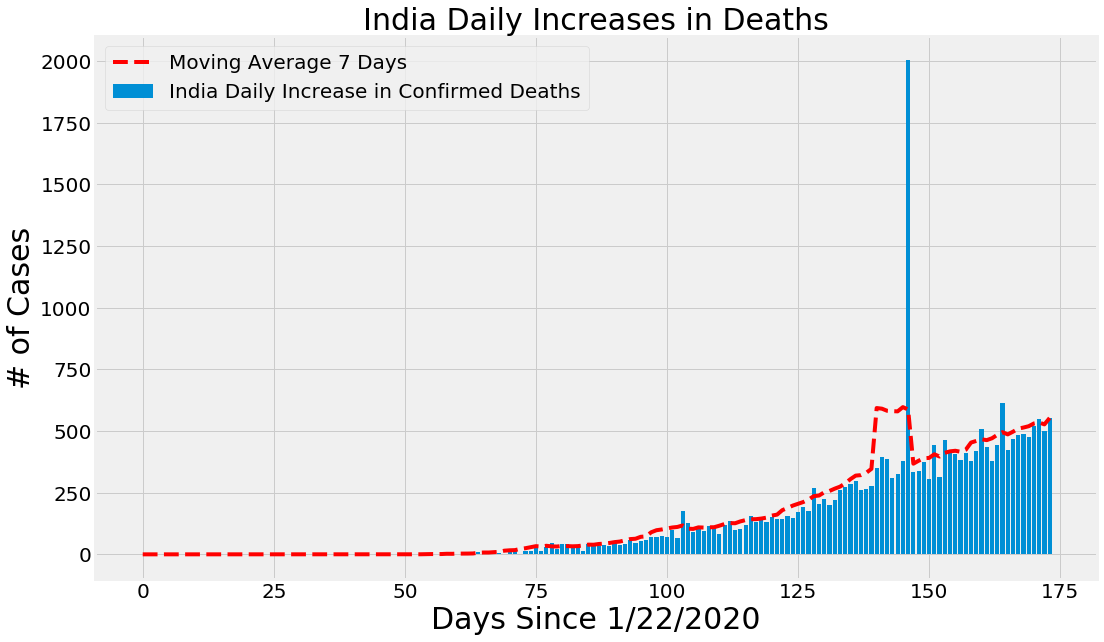

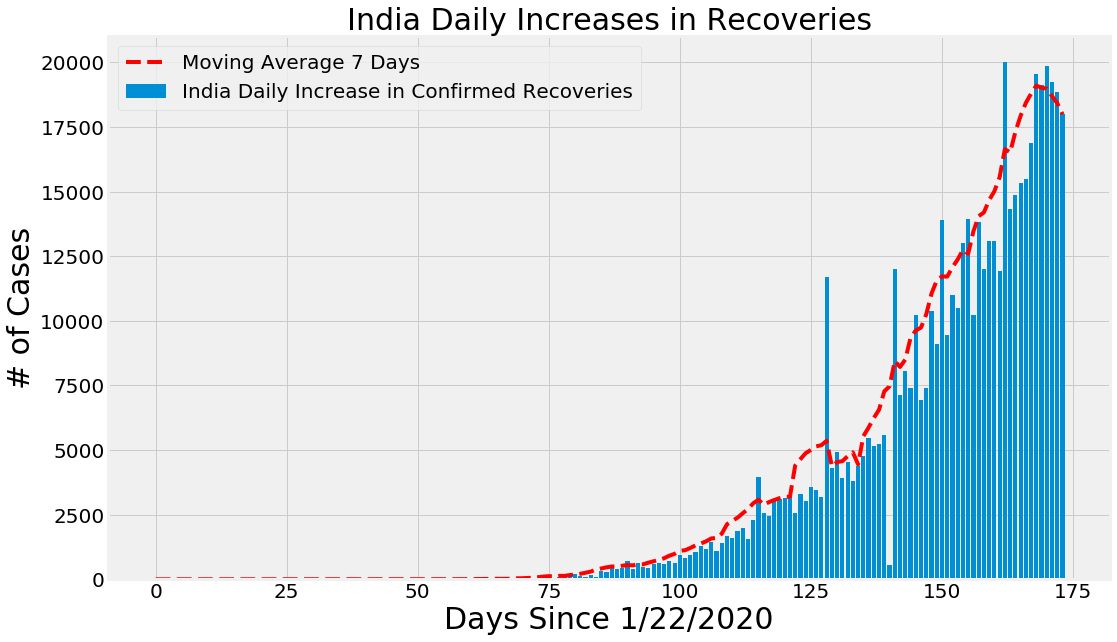

In [62]:
country_plot(adjusted_dates, india_cases, india_daily_increase, india_daily_death, india_daily_recovery, 'India')

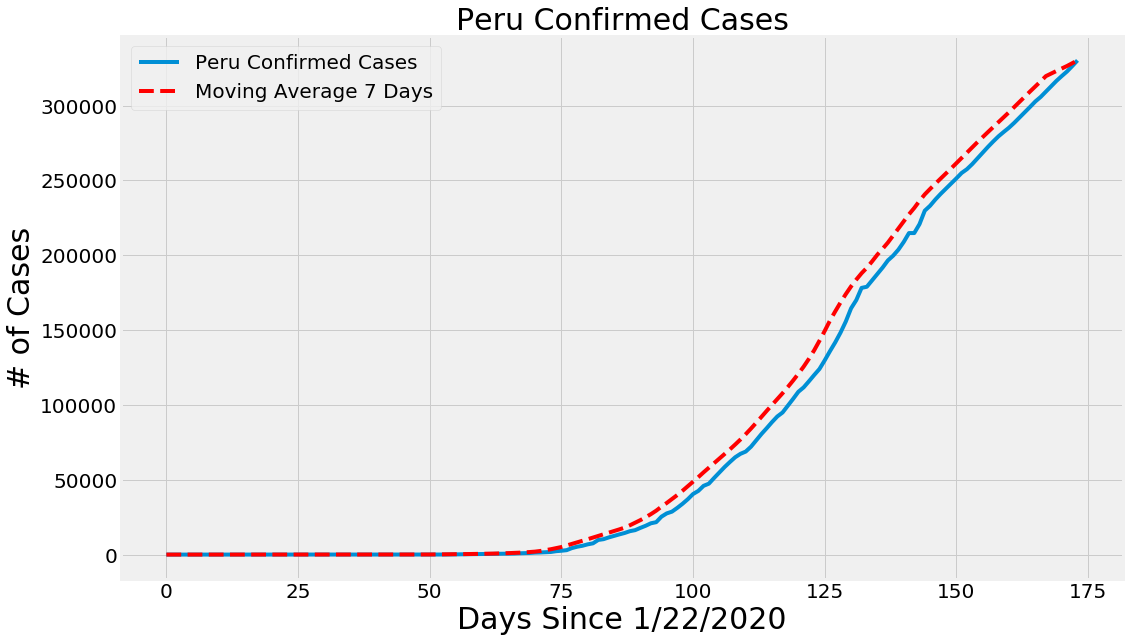

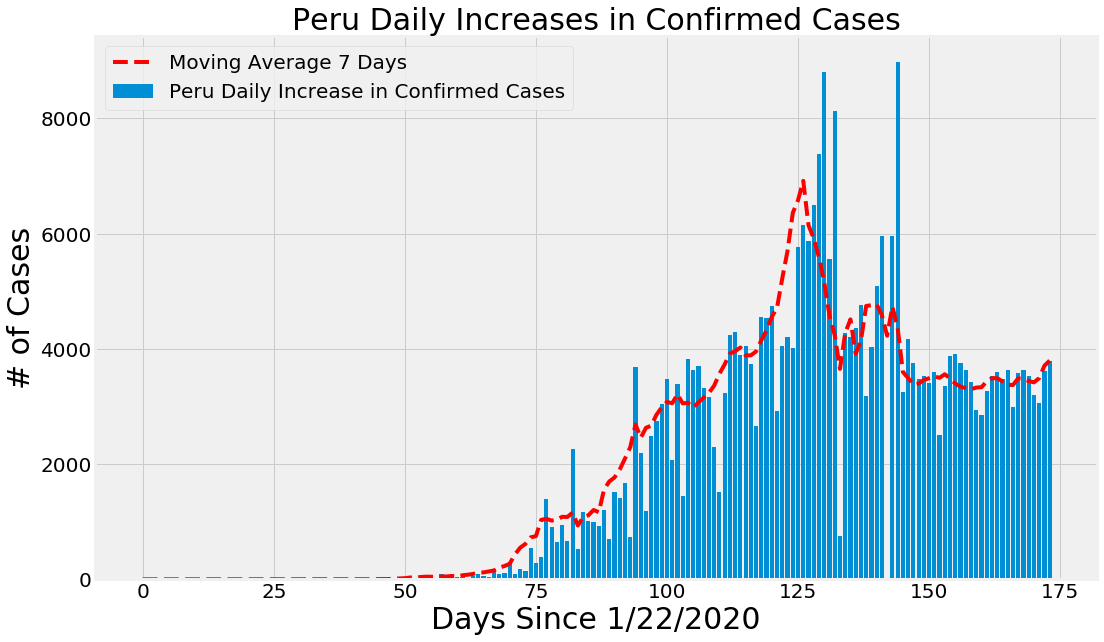

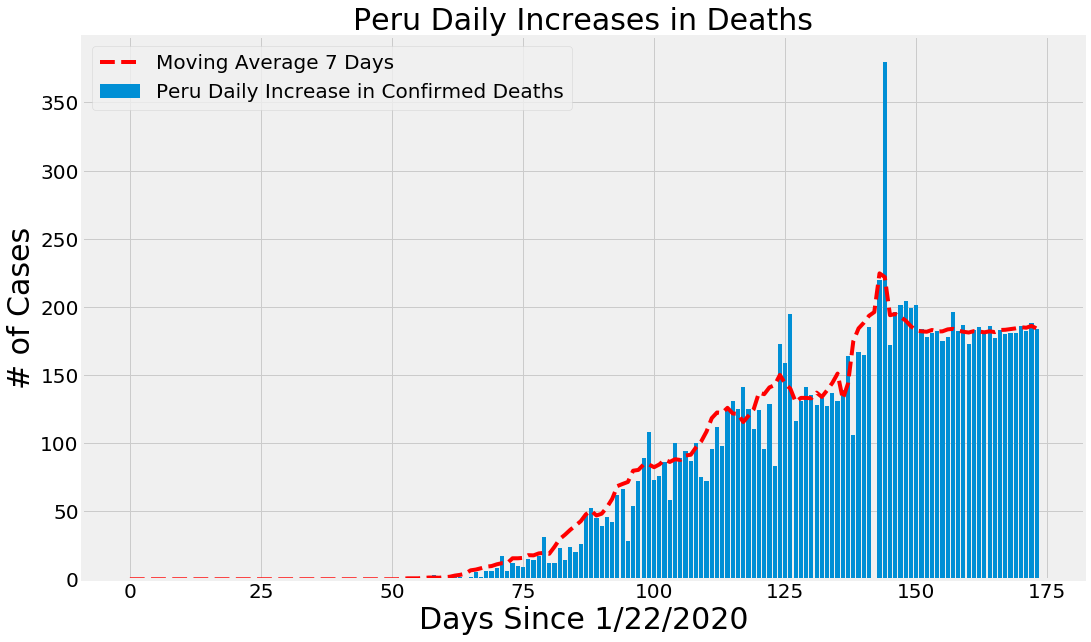

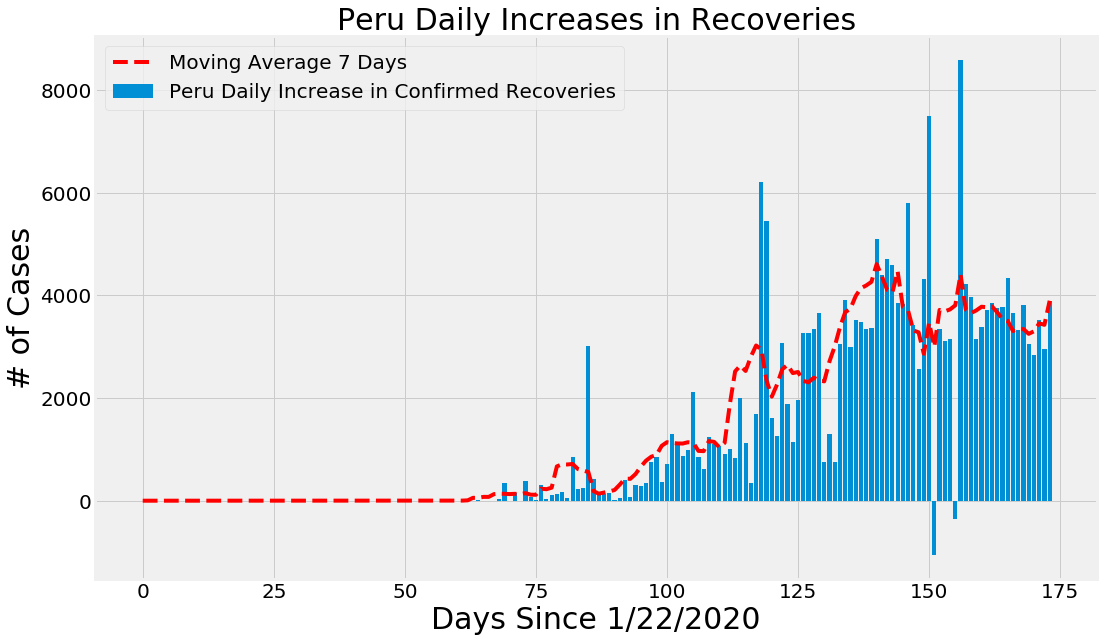

In [63]:
country_plot(adjusted_dates, peru_cases, peru_daily_increase, peru_daily_death, peru_daily_recovery, 'Peru')

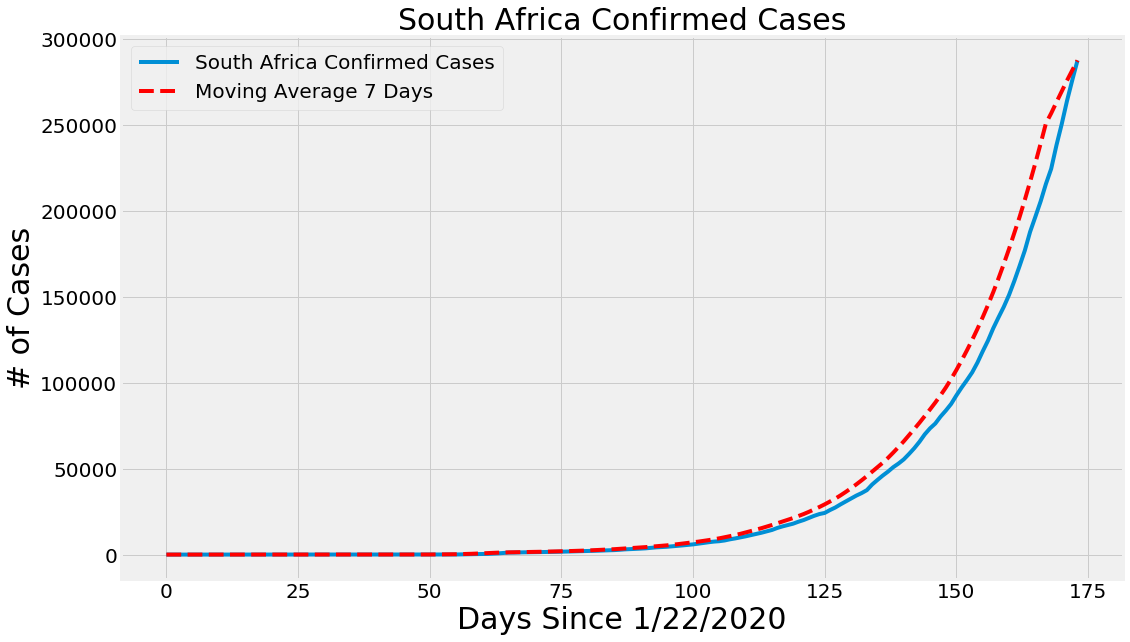

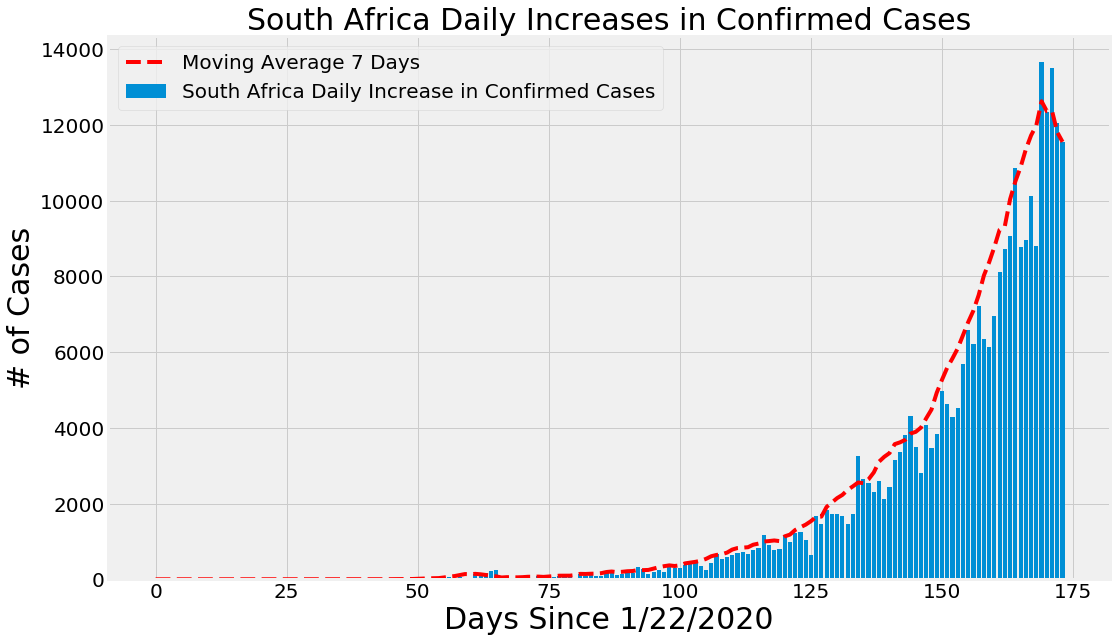

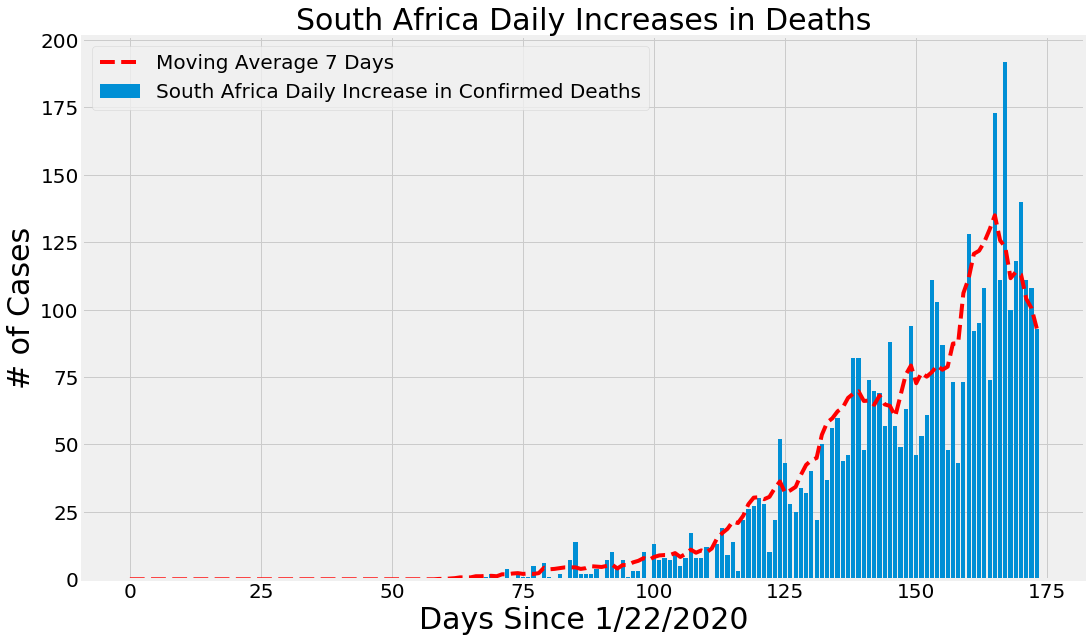

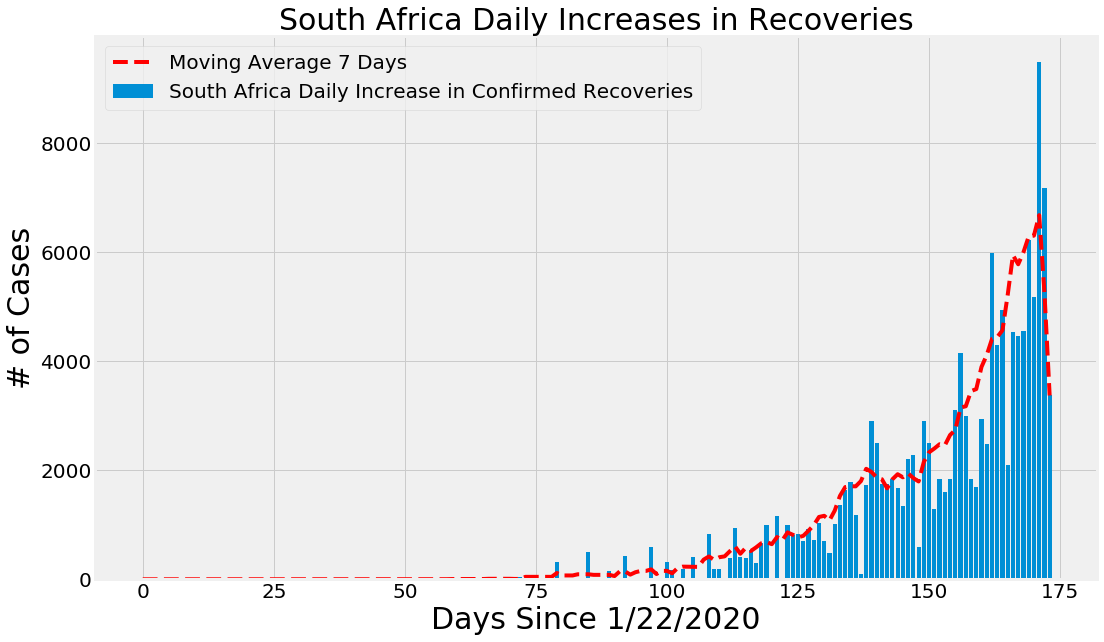

In [66]:
country_plot(adjusted_dates, south_africa_cases, south_africa_increase, south_africa_daily_death, south_africa_recovery, 'South Africa')

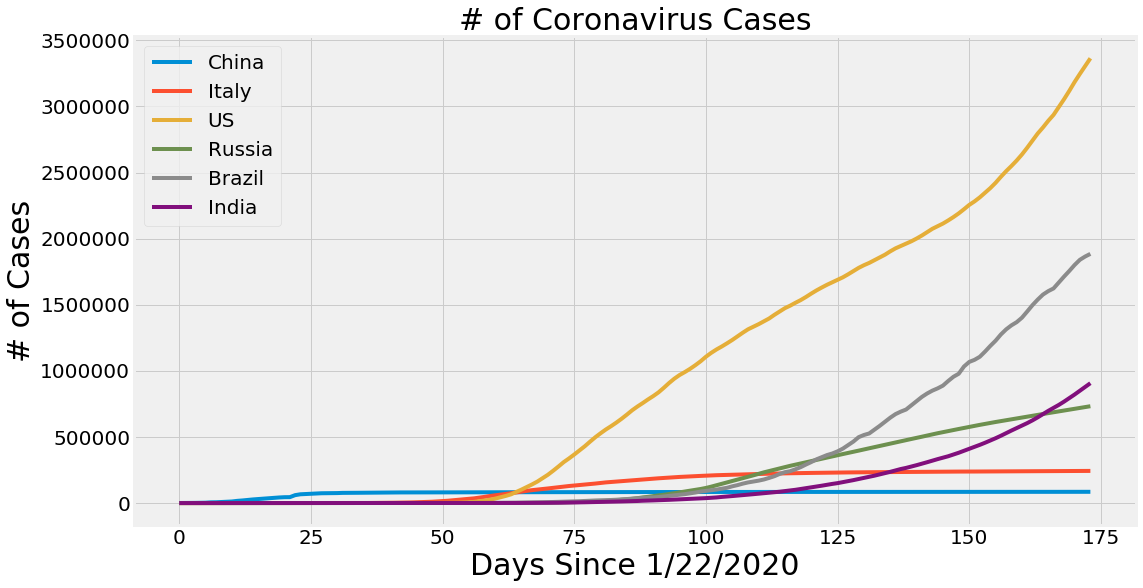

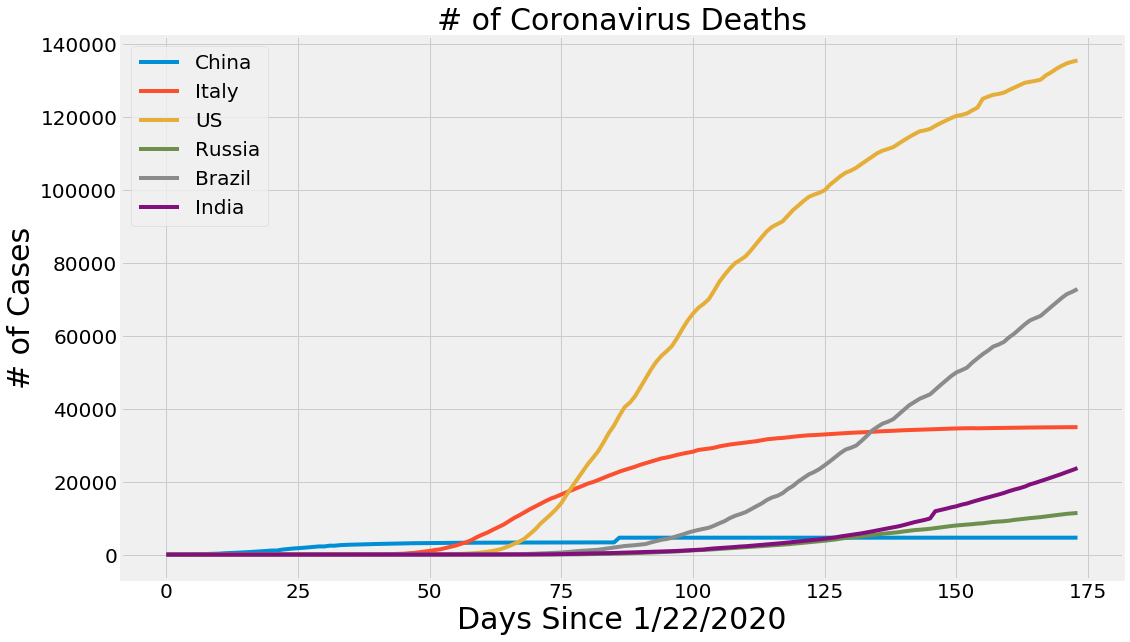

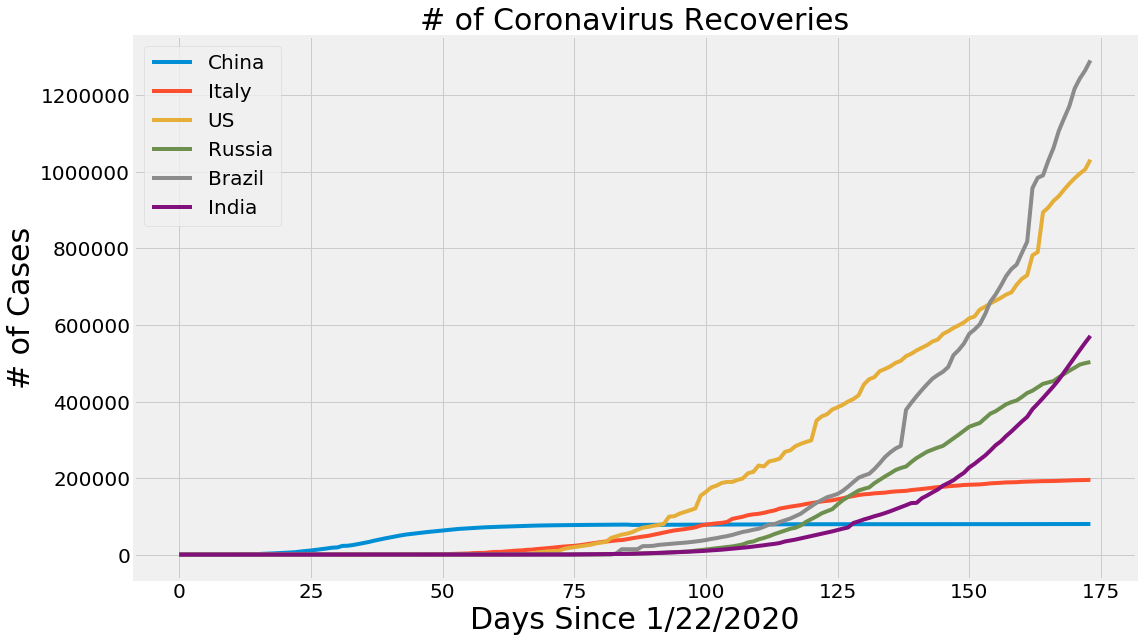

In [67]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, russia_cases)
plt.plot(adjusted_dates, brazil_cases)
plt.plot(adjusted_dates, india_cases)

plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Russia', 'Brazil', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, china_deaths)
plt.plot(adjusted_dates, italy_deaths)
plt.plot(adjusted_dates, us_deaths)
plt.plot(adjusted_dates, russia_deaths)
plt.plot(adjusted_dates, brazil_deaths)
plt.plot(adjusted_dates, india_deaths)

plt.title('# of Coronavirus Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Russia', 'Brazil', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, china_recoveries)
plt.plot(adjusted_dates, italy_recoveries)
plt.plot(adjusted_dates, us_recoveries)
plt.plot(adjusted_dates, russia_recoveries)
plt.plot(adjusted_dates, brazil_recoveries)
plt.plot(adjusted_dates, india_recoveries)

plt.title('# of Coronavirus Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Russia', 'Brazil', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [68]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Worldwide Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

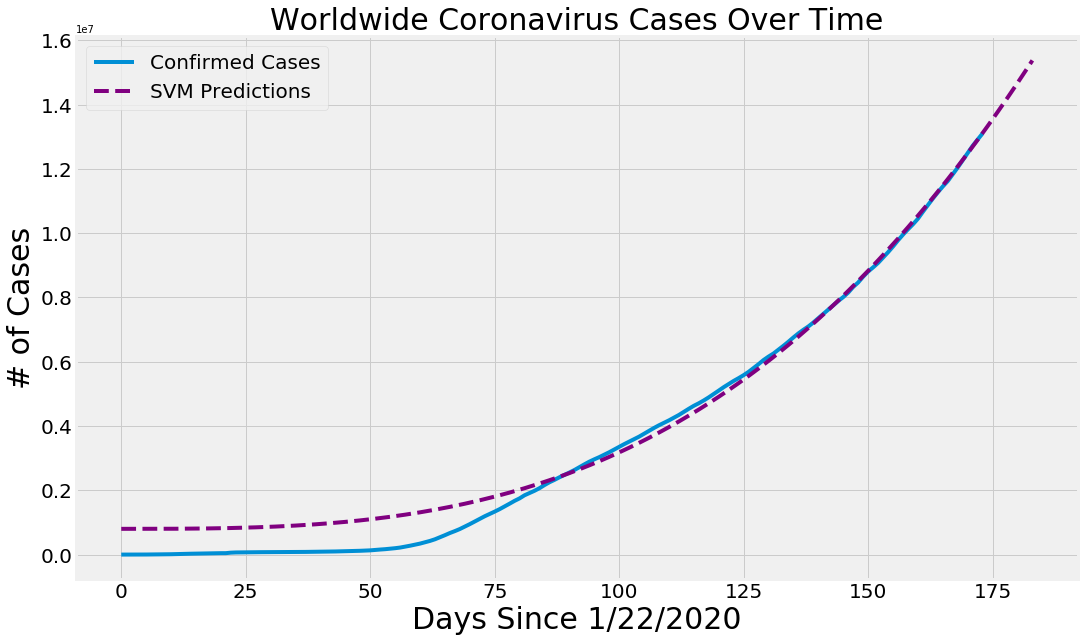

In [69]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple')

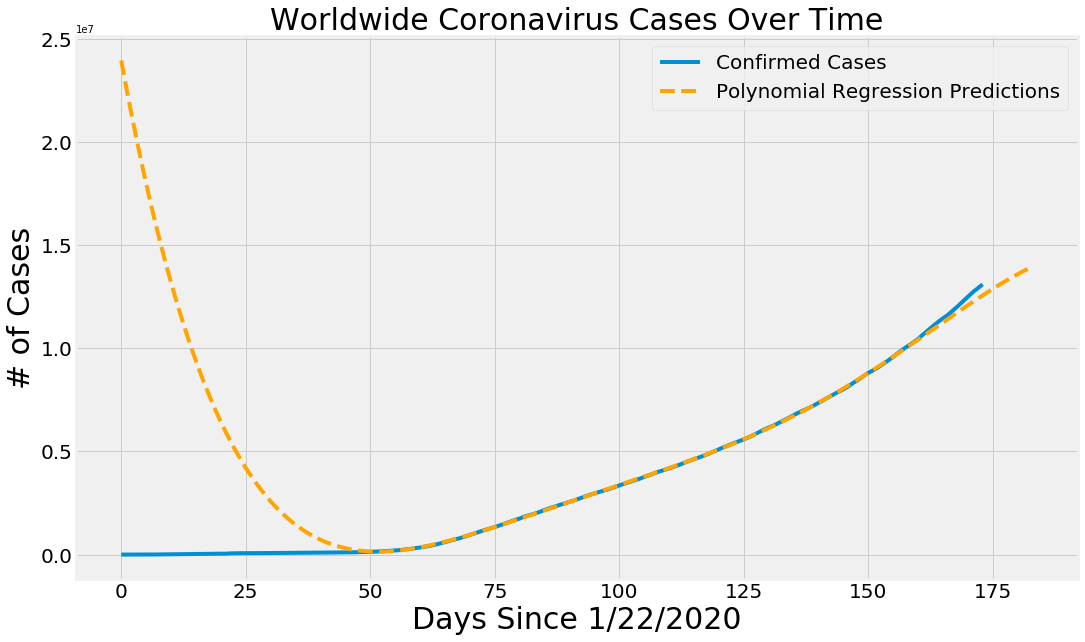

In [74]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

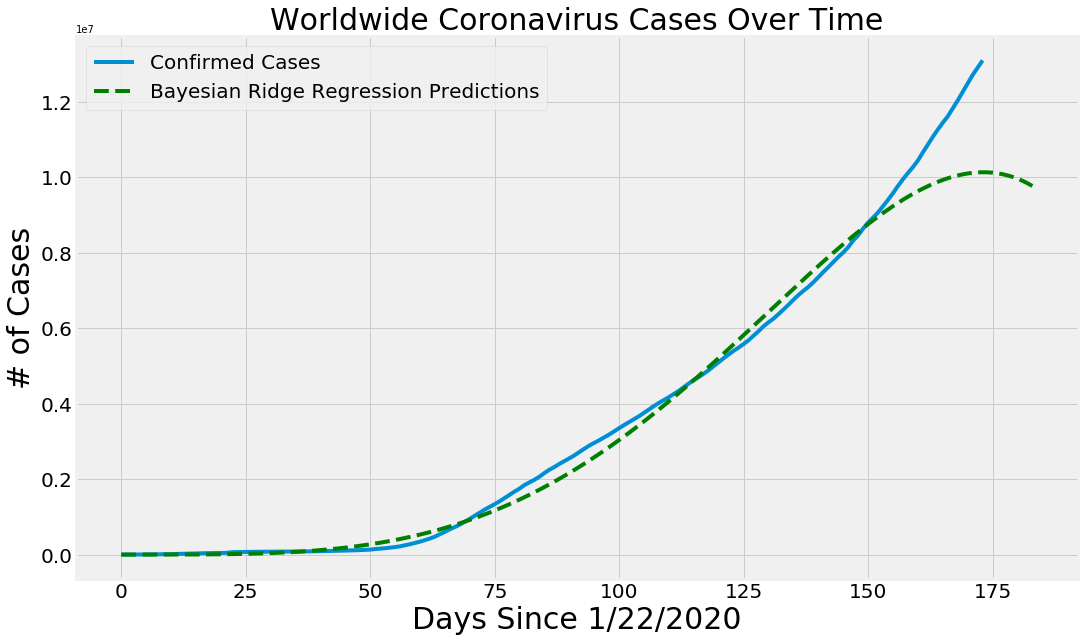

In [75]:
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green')

In [76]:
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df

Date  SVM Predicted # of Confirmed Cases Worldwide
0  07/14/2020                                    13329007.0
1  07/15/2020                                    13546238.0
2  07/16/2020                                    13765967.0
3  07/17/2020                                    13988206.0
4  07/18/2020                                    14212971.0
5  07/19/2020                                    14440275.0
6  07/20/2020                                    14670134.0
7  07/21/2020                                    14902561.0
8  07/22/2020                                    15137570.0
9  07/23/2020                                    15375176.0

In [77]:
linear_pred = linear_pred.reshape(1,-1)[0]
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted # of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
svm_df

Date  Polynomial Predicted # of Confirmed Cases Worldwide
0  07/14/2020                                         12725449.0  
1  07/15/2020                                         12879232.0  
2  07/16/2020                                         13029885.0  
3  07/17/2020                                         13177052.0  
4  07/18/2020                                         13320362.0  
5  07/19/2020                                         13459428.0  
6  07/20/2020                                         13593850.0  
7  07/21/2020                                         13723212.0  
8  07/22/2020                                         13847083.0  
9  07/23/2020                                         13965016.0

In [78]:
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Bayesian Ridge Predicted # of Confirmed Cases Worldwide': np.round(bayesian_pred[-10:])})
svm_df

Date  Bayesian Ridge Predicted # of Confirmed Cases Worldwide
0  07/14/2020                                         10136522.0      
1  07/15/2020                                         10127338.0      
2  07/16/2020                                         10110967.0      
3  07/17/2020                                         10087165.0      
4  07/18/2020                                         10055685.0      
5  07/19/2020                                         10016275.0      
6  07/20/2020                                          9968680.0      
7  07/21/2020                                          9912639.0      
8  07/22/2020                                          9847889.0      
9  07/23/2020                                          9774160.0

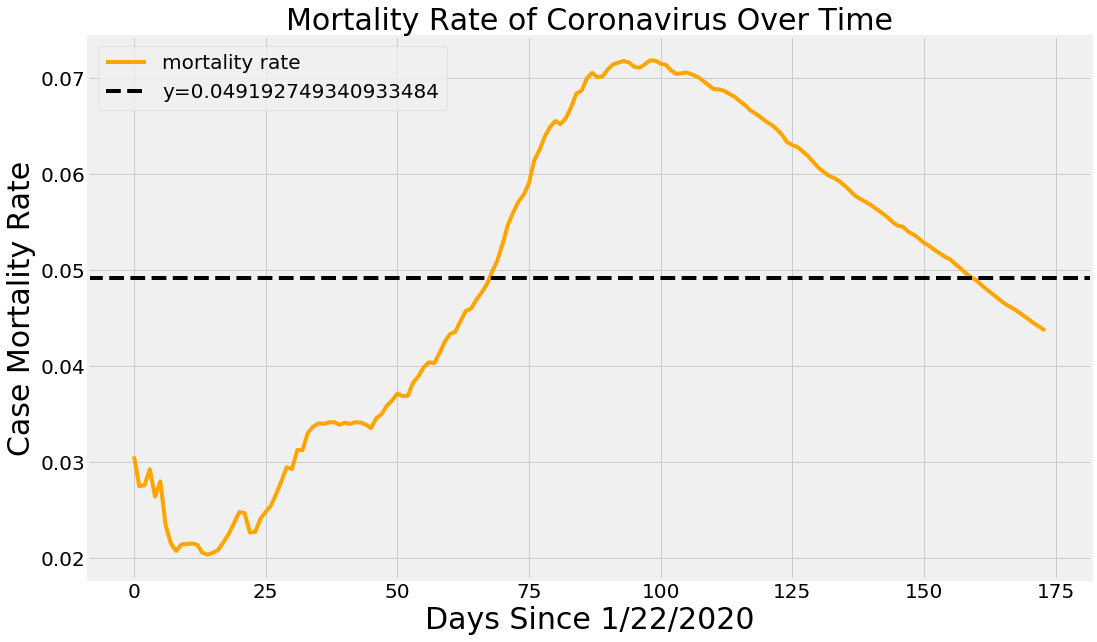

In [79]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Case Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

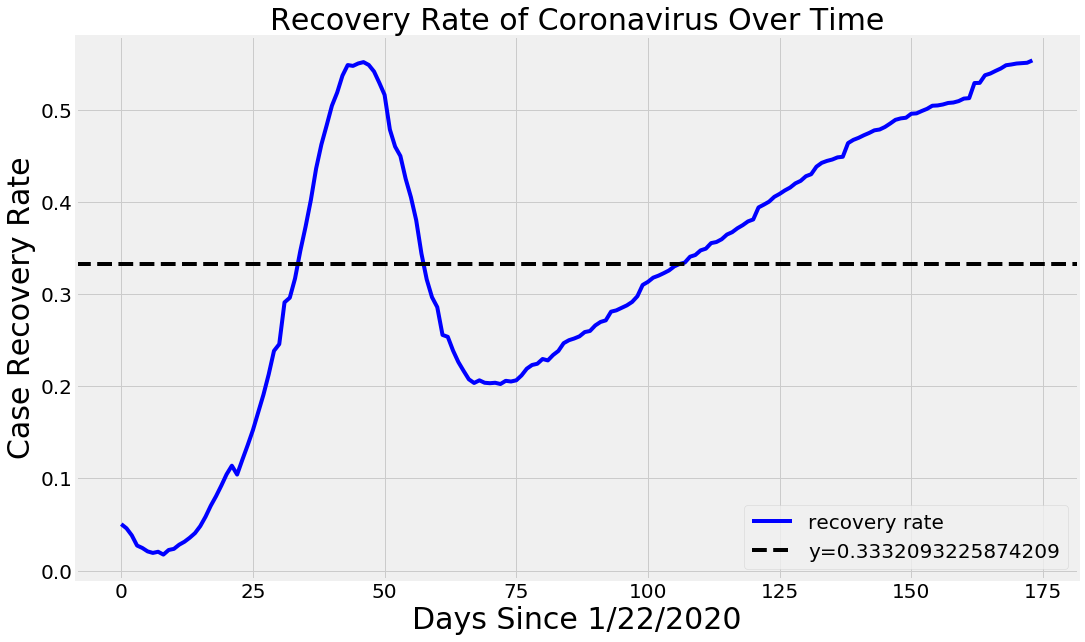

In [80]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Case Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

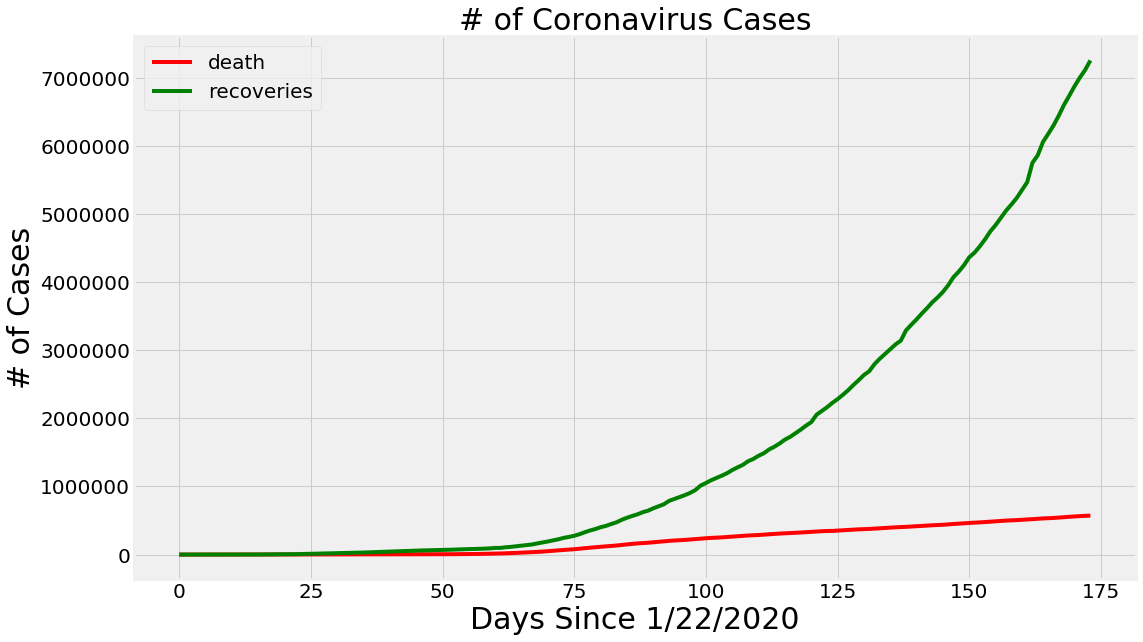

In [81]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

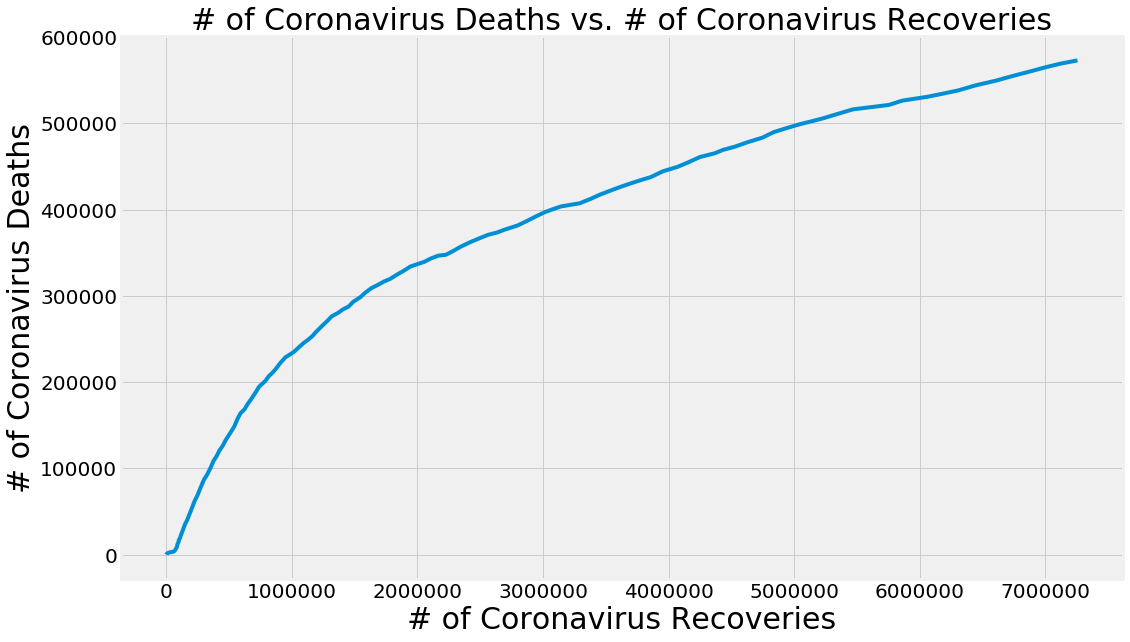

In [82]:
plt.figure(figsize=(16, 10))
plt.plot(total_recovered, total_deaths)
plt.title('# of Coronavirus Deaths vs. # of Coronavirus Recoveries', size=30)
plt.xlabel('# of Coronavirus Recoveries', size=30)
plt.ylabel('# of Coronavirus Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [83]:
unique_countries =  list(latest_data['Country_Region'].unique())

In [84]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]

for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

In [85]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                          'Number of Deaths': country_death_cases, 'Number of Recoveries' : country_recovery_cases, 
                          'Number of Active Cases' : country_active_cases,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Greens')

In [86]:
unique_provinces =  list(latest_data['Province_State'].unique())

In [87]:
province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
province_recovery_cases = []
province_mortality_rate = [] 

no_cases = []

for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]

for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [88]:
province_df = pd.DataFrame({'Province/State Name': unique_provinces[:100], 'Country': province_country[:100], 'Number of Confirmed Cases': province_confirmed_cases[:100],
                          'Number of Deaths': province_death_cases[:100], 'Number of Recoveries' : province_recovery_cases[:100],
                          'Mortality Rate': province_mortality_rate[:100]})
# number of cases per country/region

province_df.style.background_gradient(cmap='Greens')

In [89]:
nan_indices = [] 
for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

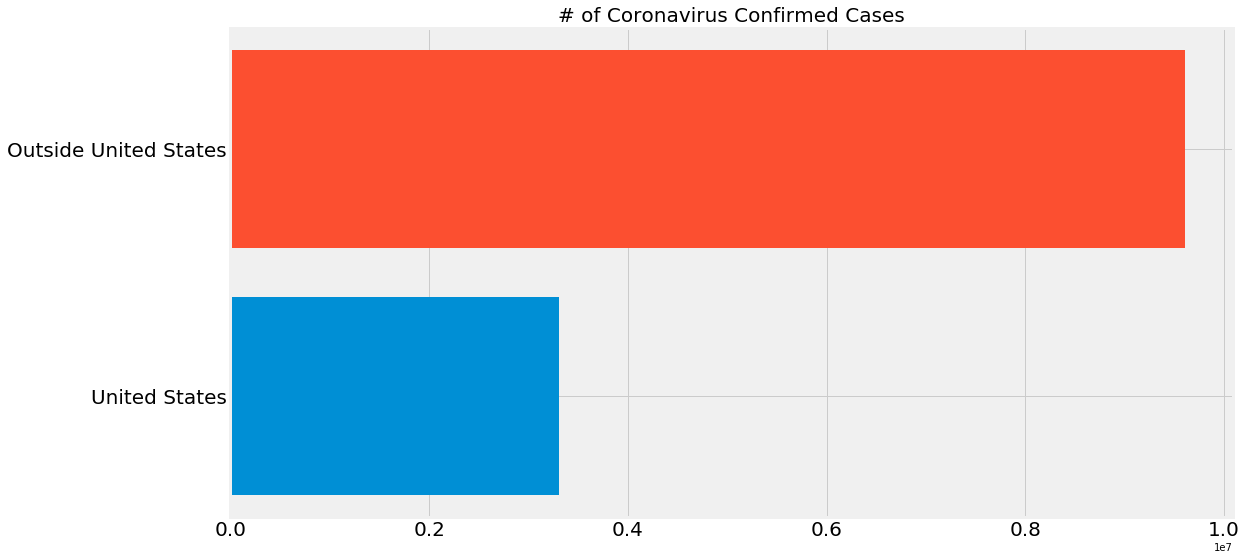

In [90]:
us_confirmed = latest_data[latest_data['Country_Region']=='US']['Confirmed'].sum()
outside_us_confirmed = np.sum(country_confirmed_cases) - us_confirmed
plt.figure(figsize=(16, 9))
plt.barh('United States', us_confirmed)
plt.barh('Outside United States', outside_us_confirmed)
plt.title('# of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [91]:
print('Outside United States {} cases:'.format(outside_us_confirmed))
print('United States {} cases'.format(us_confirmed))
print('Total: {} cases'.format(us_confirmed+outside_us_confirmed))

Outside United States 9605415 cases:
United States 3304942 cases
Total: 12910357 cases


In [92]:
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[15:])

for i in range(len(country_confirmed_cases[:15])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [93]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 12))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
# good for a lot x values 
def plot_bar_graphs_tall(x, y, title):
    plt.figure(figsize=(19, 18))
    plt.barh(x, y)
    plt.title(title, size=25)
    plt.xticks(size=25)
    plt.yticks(size=25)
    plt.show()

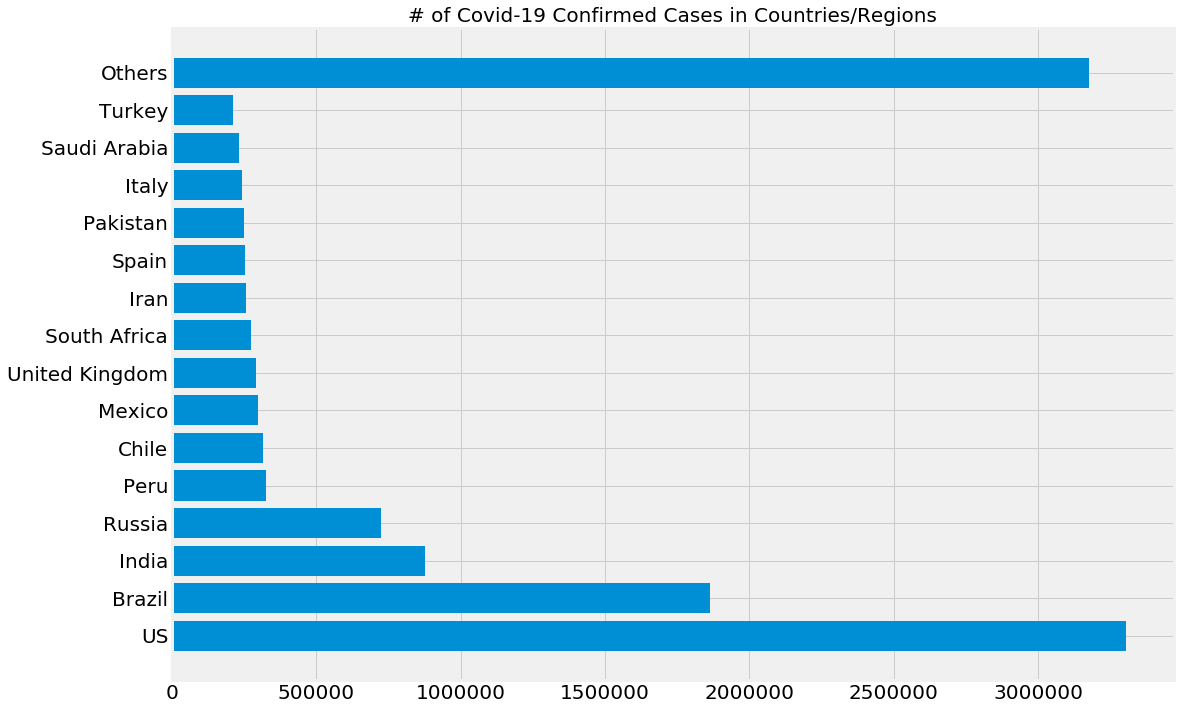

In [94]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, '# of Covid-19 Confirmed Cases in Countries/Regions')

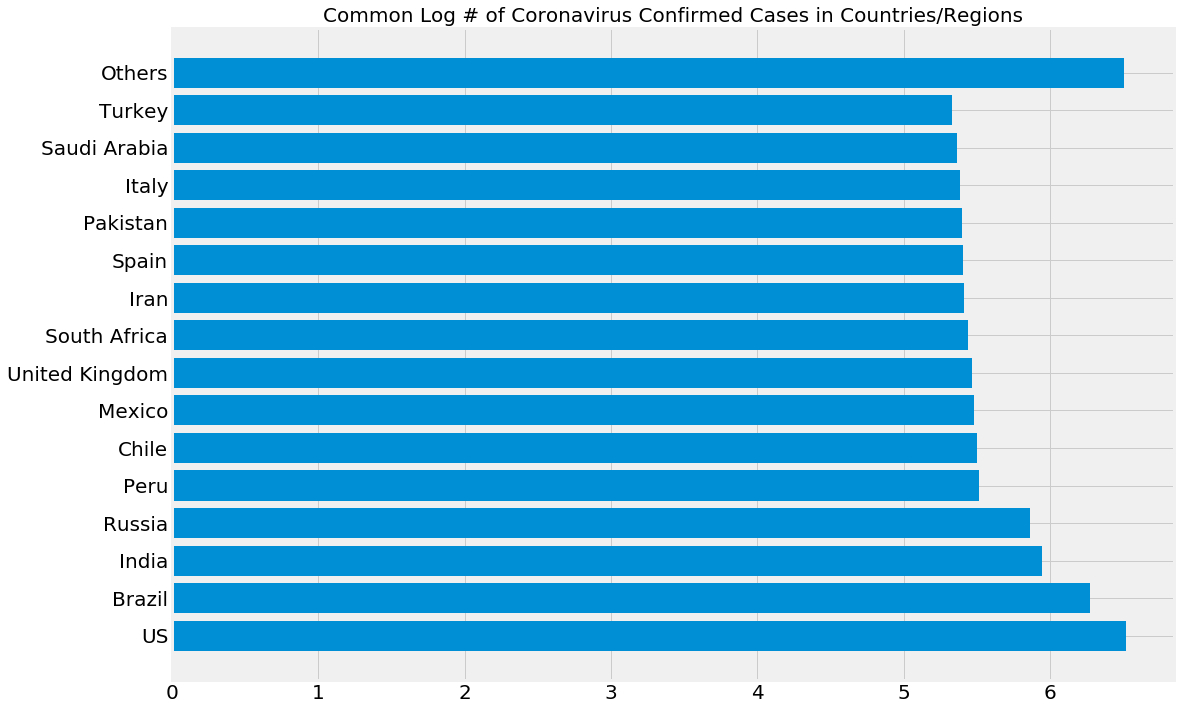

In [95]:
log_country_confirmed_cases = [math.log10(i) for i in visual_confirmed_cases]
plot_bar_graphs(visual_unique_countries, log_country_confirmed_cases, 'Common Log # of Coronavirus Confirmed Cases in Countries/Regions')

In [96]:
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[15:])
for i in range(len(province_confirmed_cases[:15])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(province_confirmed_cases[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

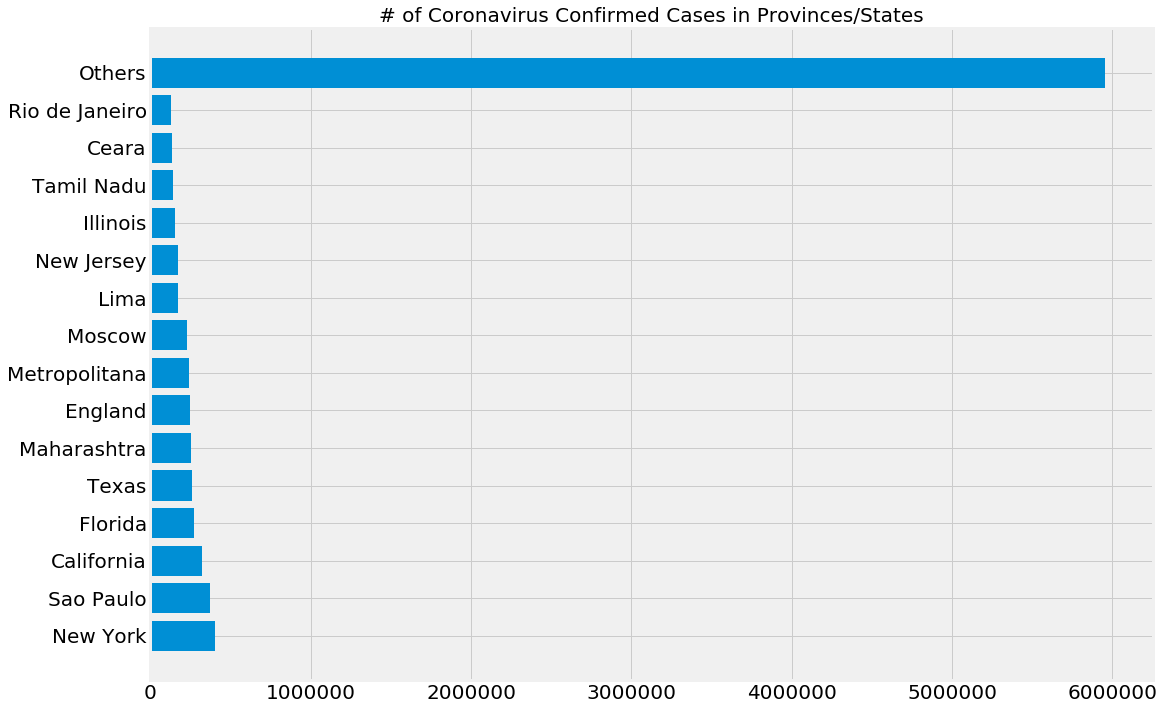

In [97]:
plot_bar_graphs(visual_unique_provinces, visual_confirmed_cases2, '# of Coronavirus Confirmed Cases in Provinces/States')

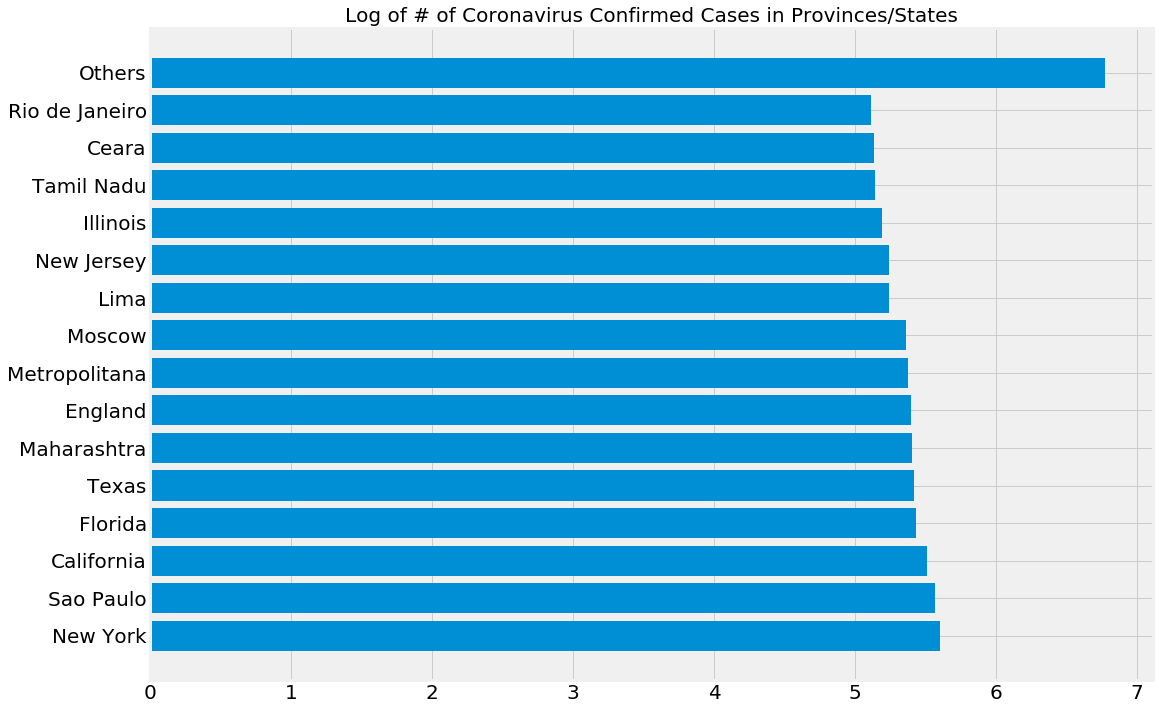

In [98]:
log_province_confirmed_cases = [math.log10(i) for i in visual_confirmed_cases2]
plot_bar_graphs(visual_unique_provinces, log_province_confirmed_cases, 'Log of # of Coronavirus Confirmed Cases in Provinces/States')

In [99]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
    plt.figure(figsize=(20,15))
    plt.title(title, size=20)
    plt.pie(y, colors=c,shadow=True)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()

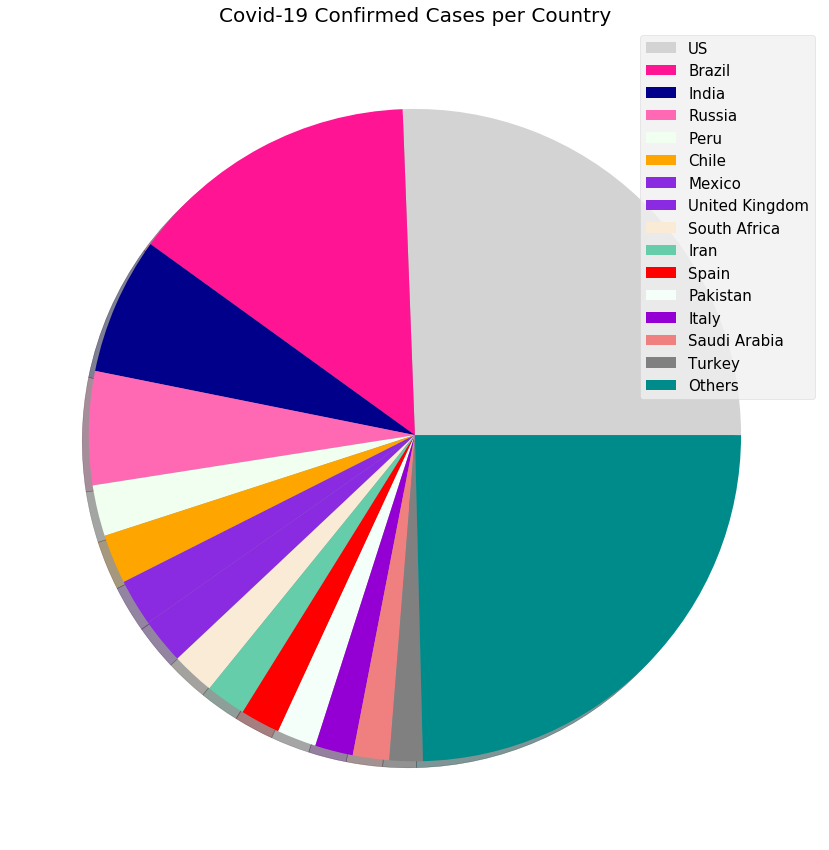

In [100]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

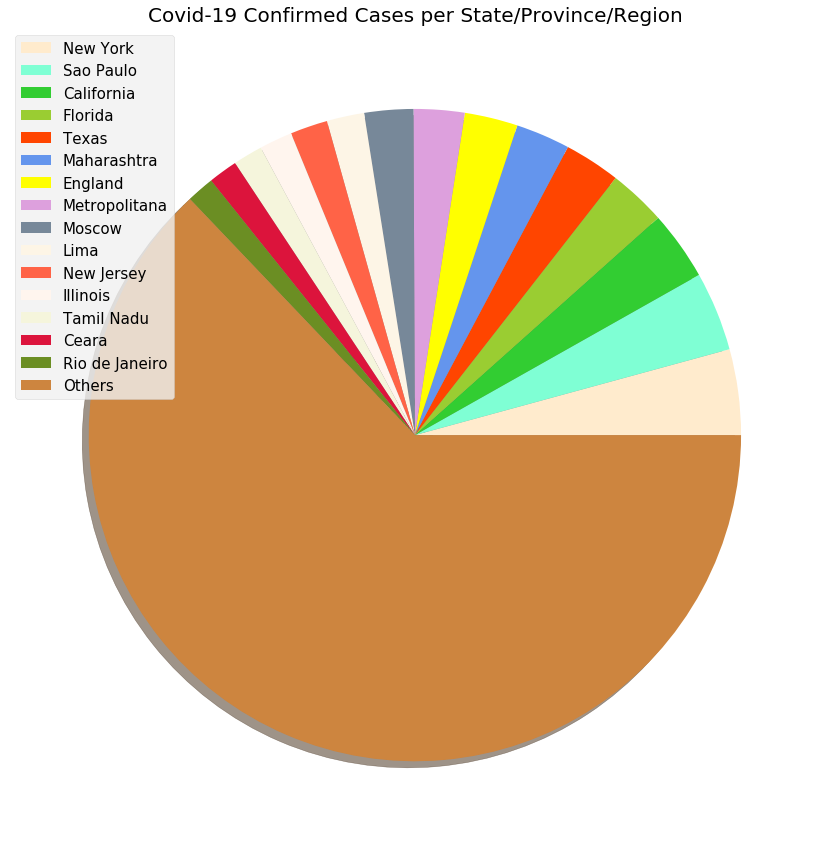

In [101]:
plot_pie_charts(visual_unique_provinces, visual_confirmed_cases2, 'Covid-19 Confirmed Cases per State/Province/Region')

In [102]:
def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 
    for i in regions:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)
            
    for i in no_cases:
        regions.remove(i)

    # only show the top 5 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum() 
        
    if(len(regions)>5):
        regions_5 = regions[:5]
        regions_5.append('Others')
        confirmed_cases_5 = confirmed_cases[:5]
        confirmed_cases_5.append(np.sum(confirmed_cases[5:]))
        plot_pie_charts(regions_5,confirmed_cases_5, title)
    else:
        plot_pie_charts(regions,confirmed_cases, title)

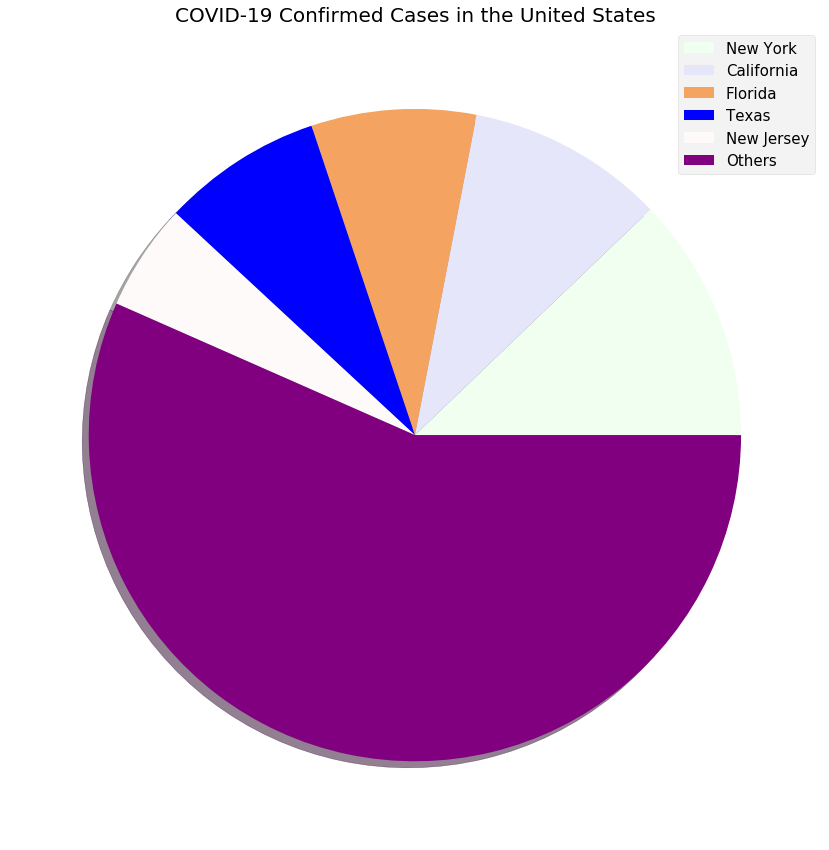

In [103]:
plot_pie_country_with_regions('US', 'COVID-19 Confirmed Cases in the United States')

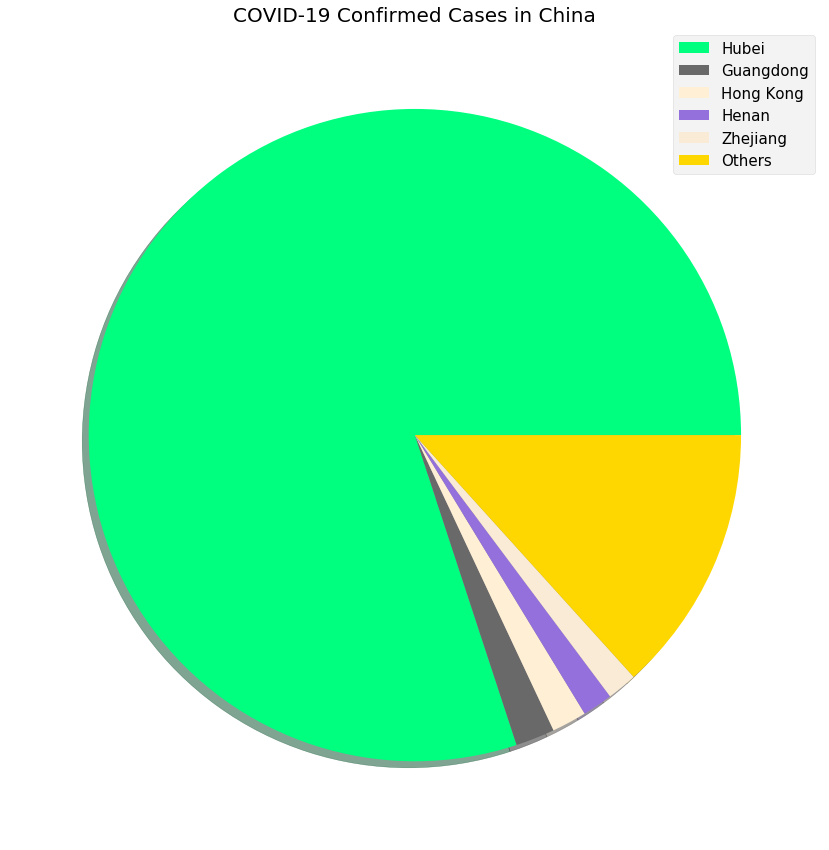

In [104]:
plot_pie_country_with_regions('China', 'COVID-19 Confirmed Cases in China')

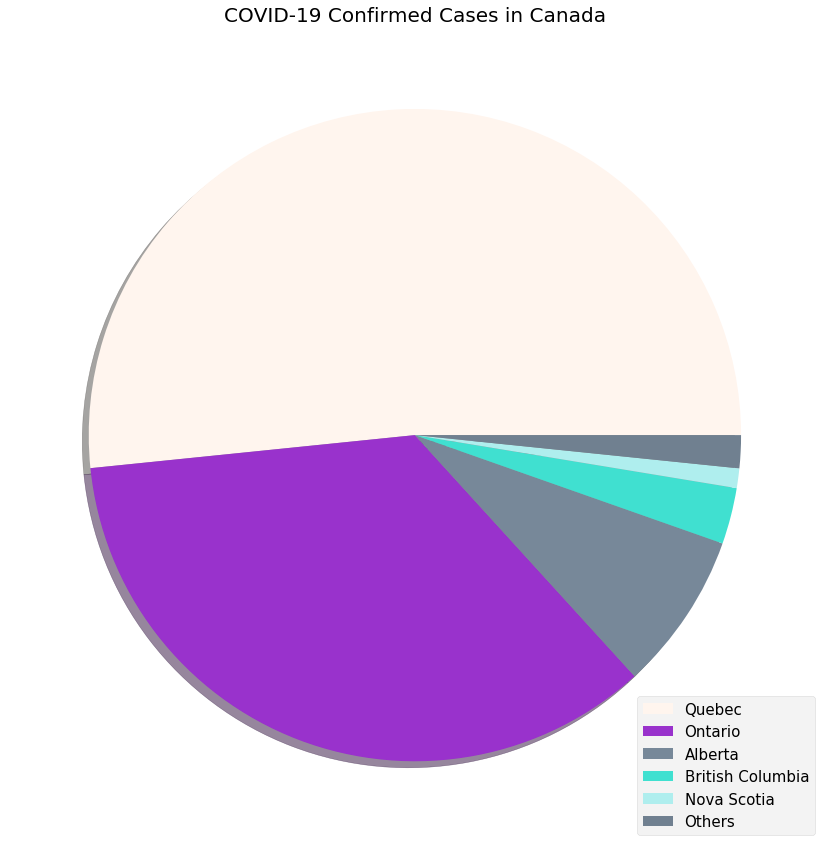

In [105]:
plot_pie_country_with_regions('Canada', 'COVID-19 Confirmed Cases in Canada')

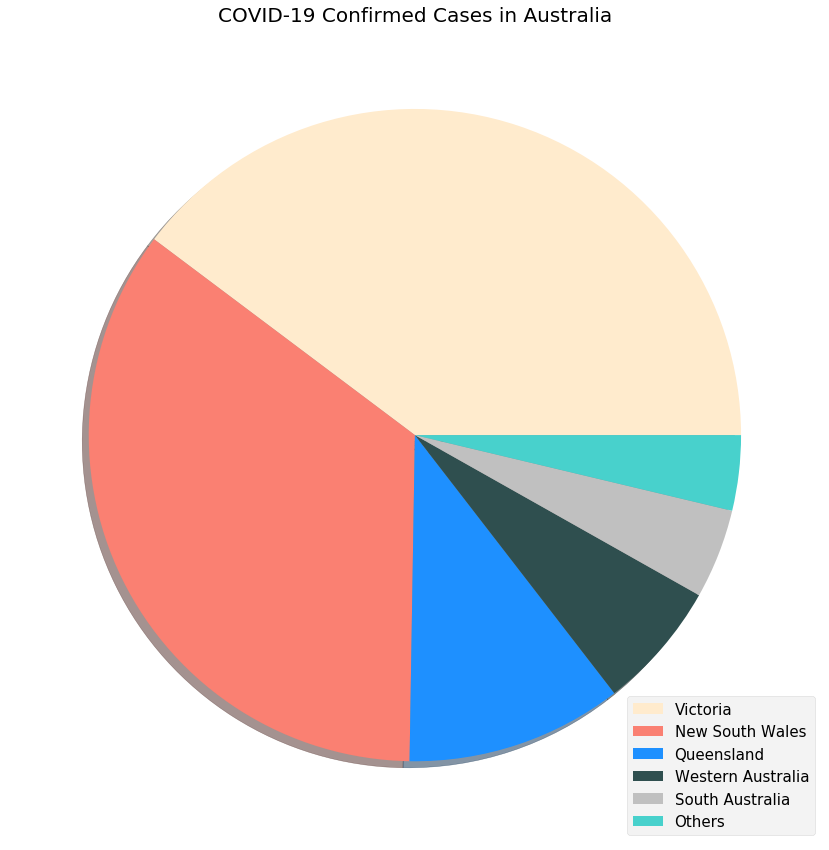

In [106]:
plot_pie_country_with_regions('Australia', 'COVID-19 Confirmed Cases in Australia')

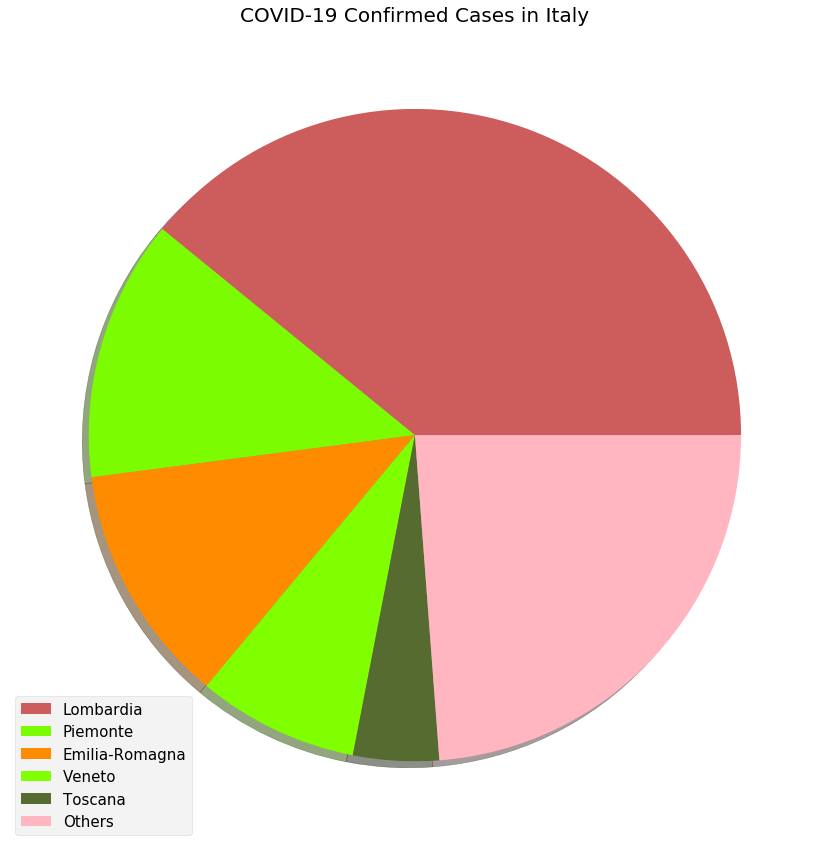

In [107]:
plot_pie_country_with_regions('Italy', 'COVID-19 Confirmed Cases in Italy')

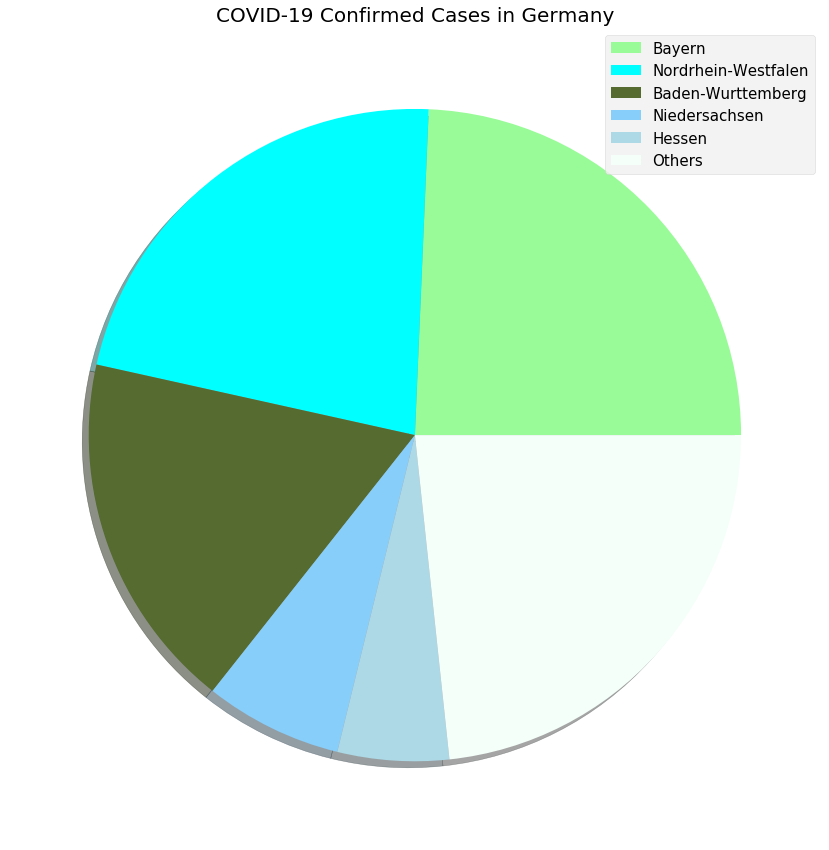

In [108]:
plot_pie_country_with_regions('Germany', 'COVID-19 Confirmed Cases in Germany')

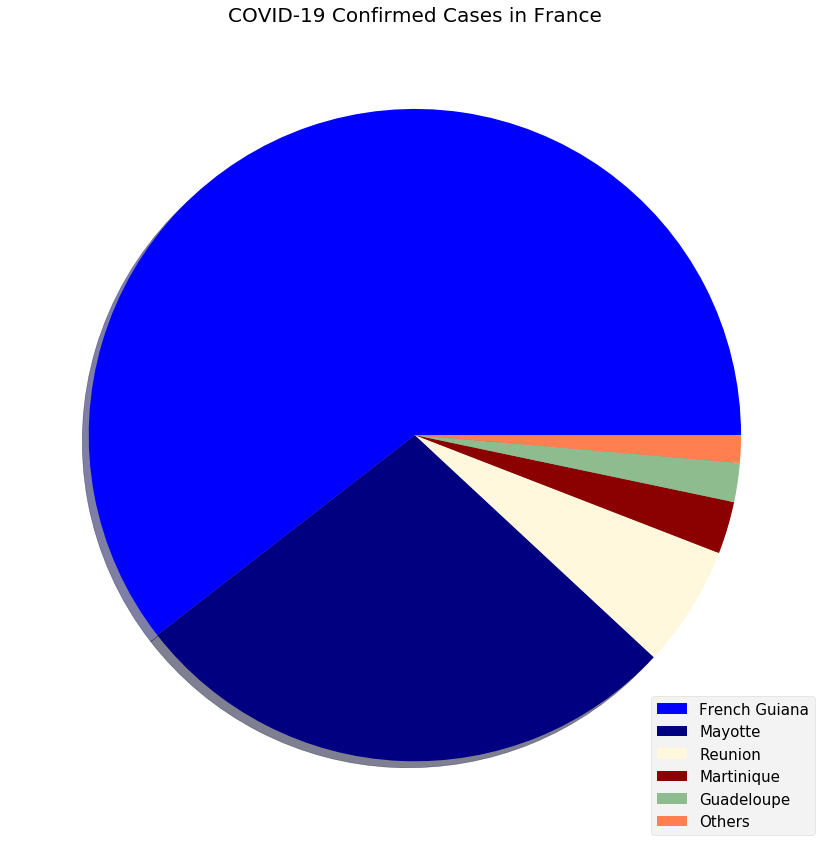

In [109]:
plot_pie_country_with_regions('France', 'COVID-19 Confirmed Cases in France')

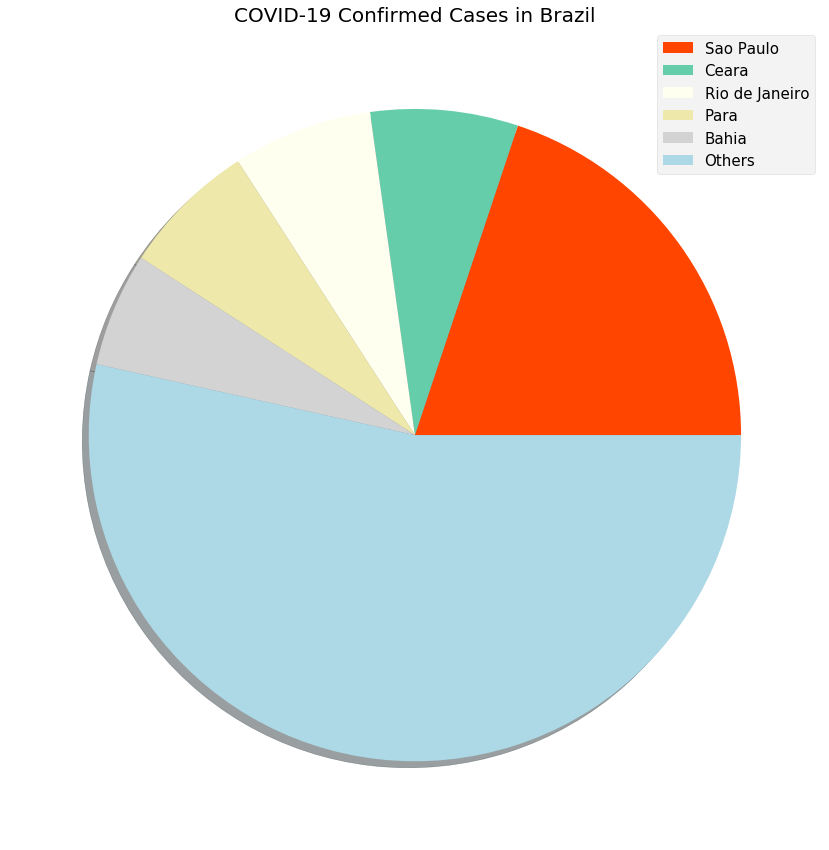

In [110]:
plot_pie_country_with_regions('Brazil', 'COVID-19 Confirmed Cases in Brazil')

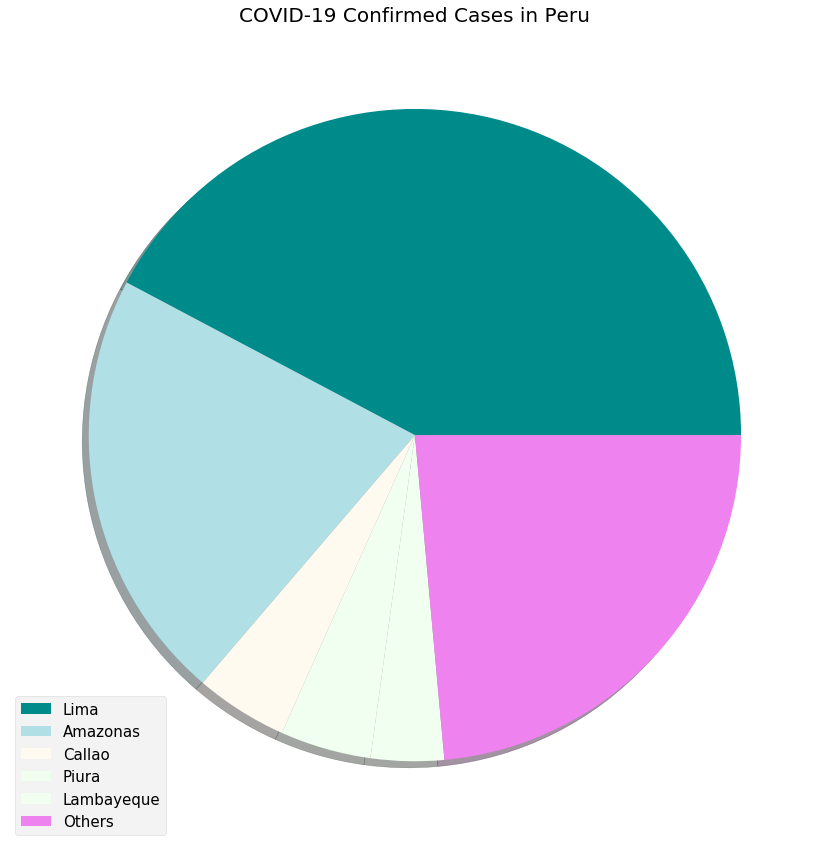

In [111]:
plot_pie_country_with_regions('Peru', 'COVID-19 Confirmed Cases in Peru')

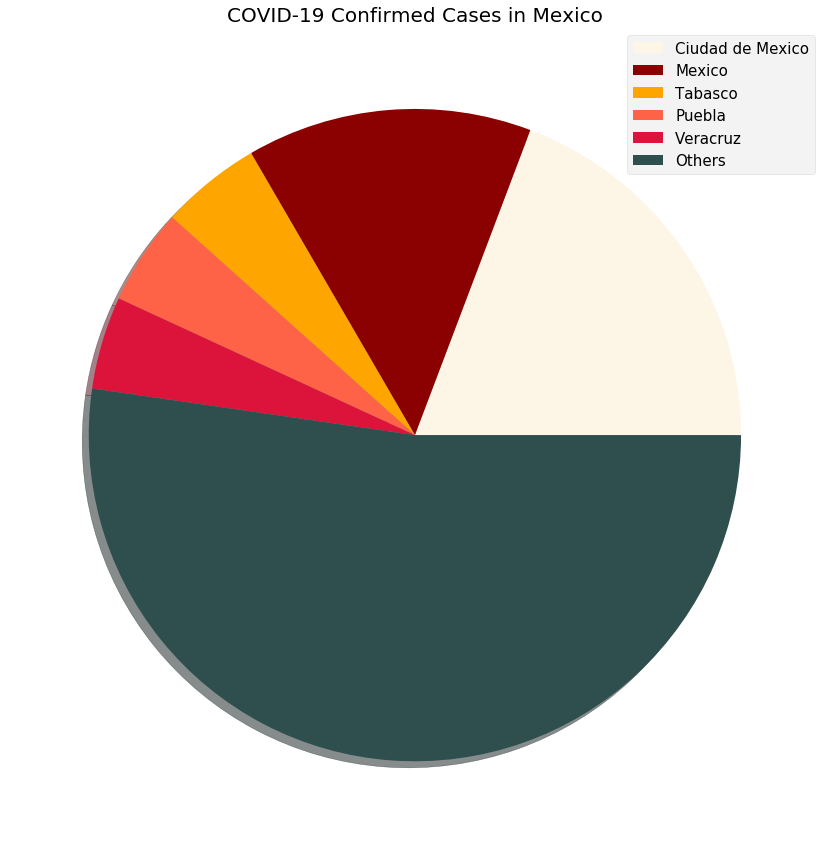

In [112]:
plot_pie_country_with_regions('Mexico', 'COVID-19 Confirmed Cases in Mexico')

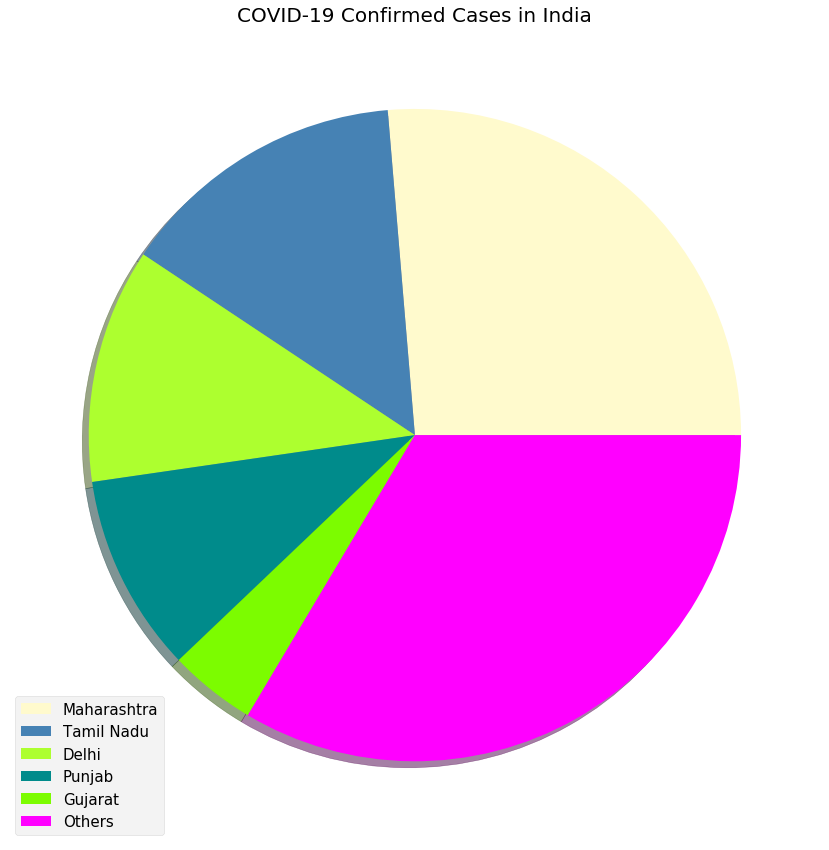

In [113]:
plot_pie_country_with_regions('India', 'COVID-19 Confirmed Cases in India')

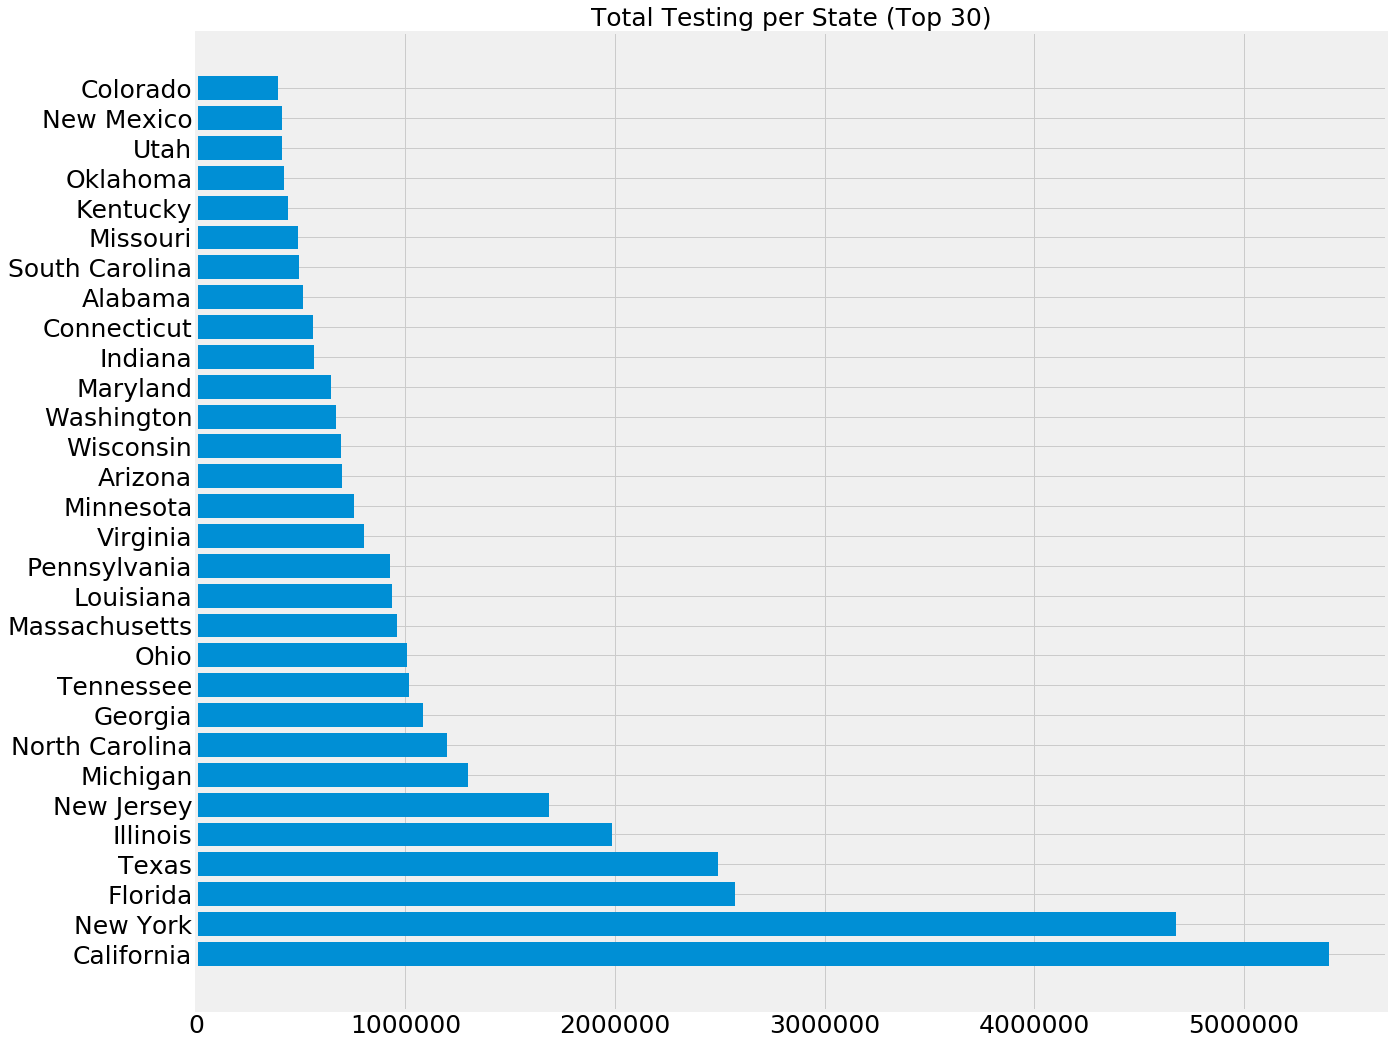

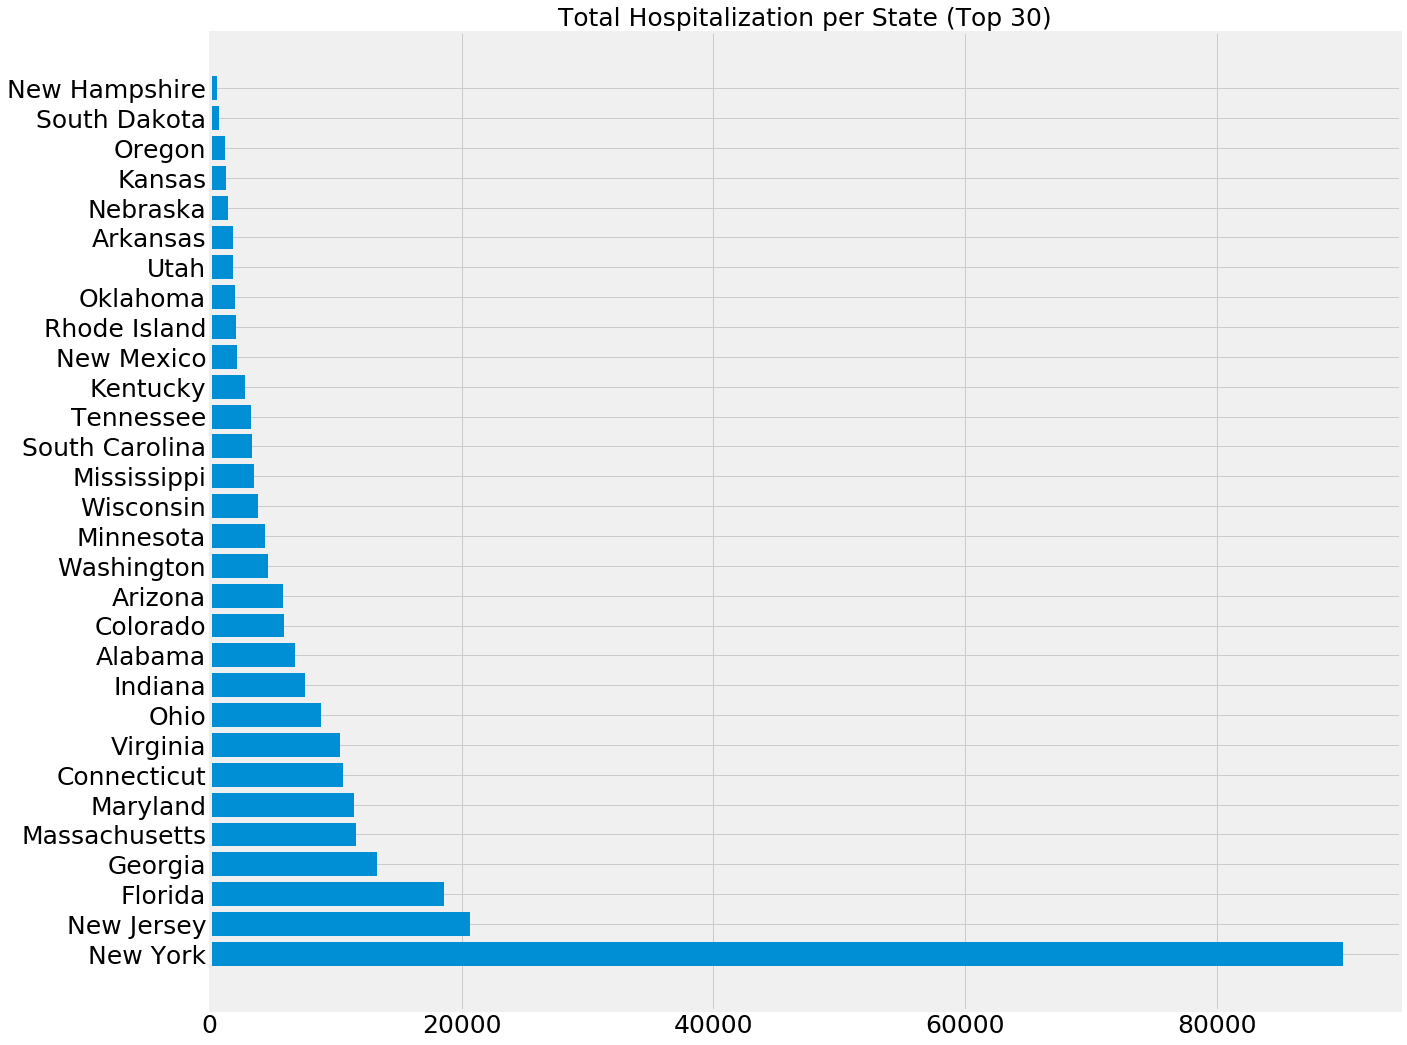

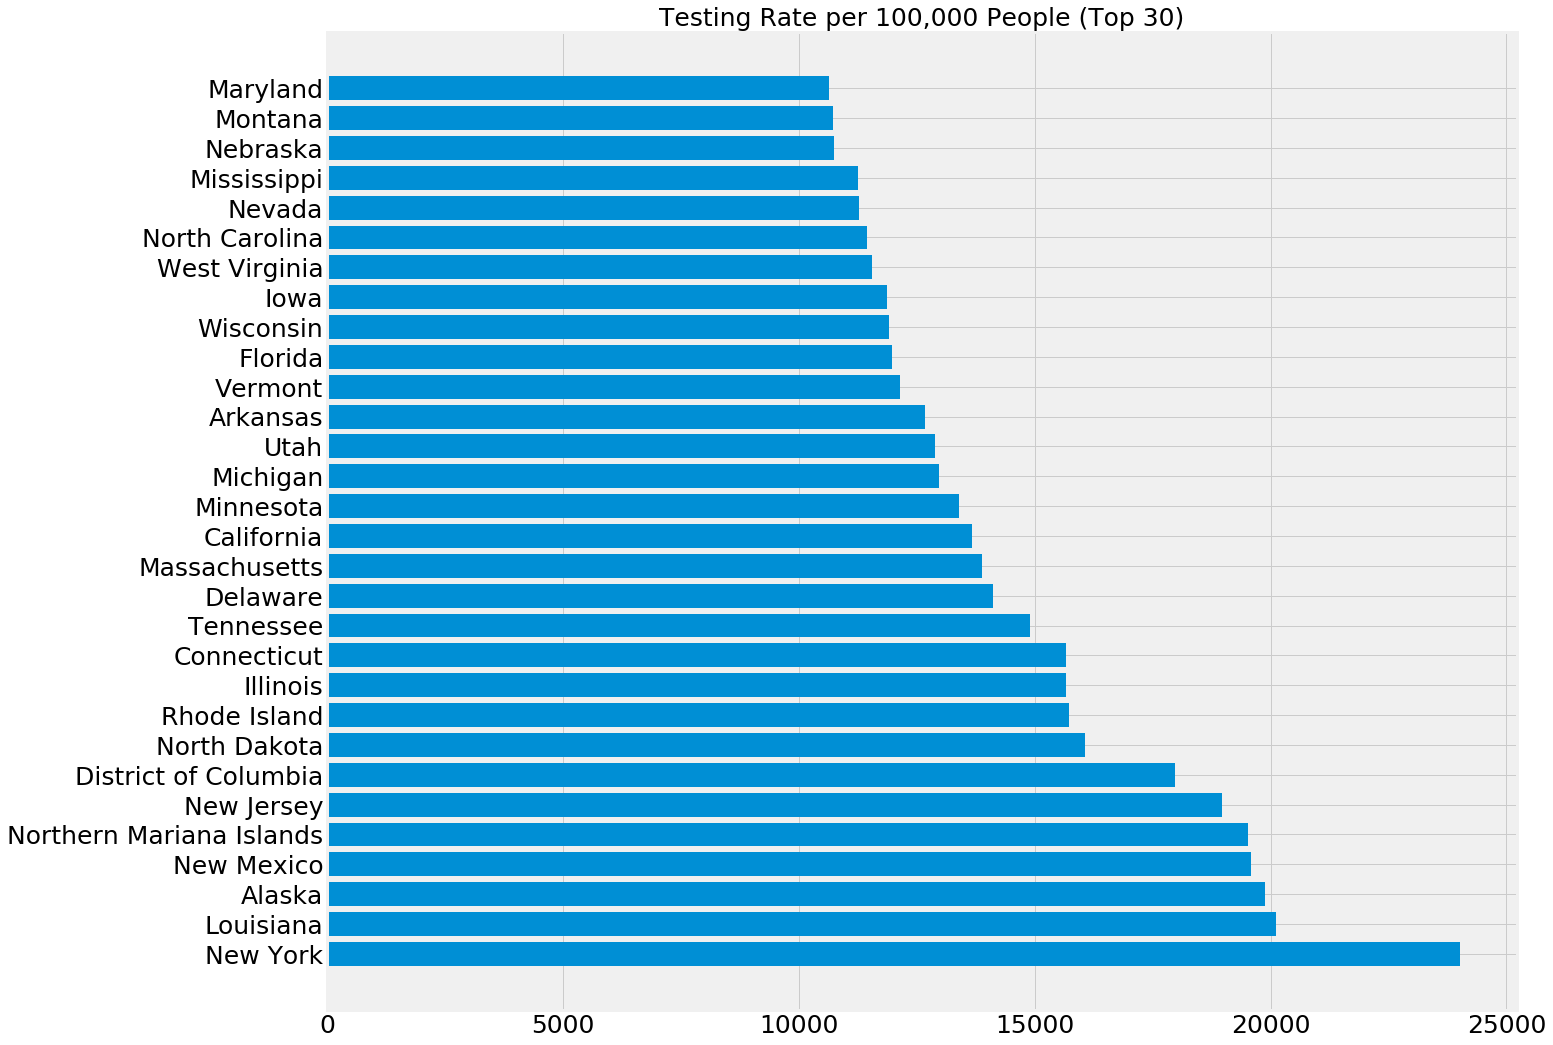

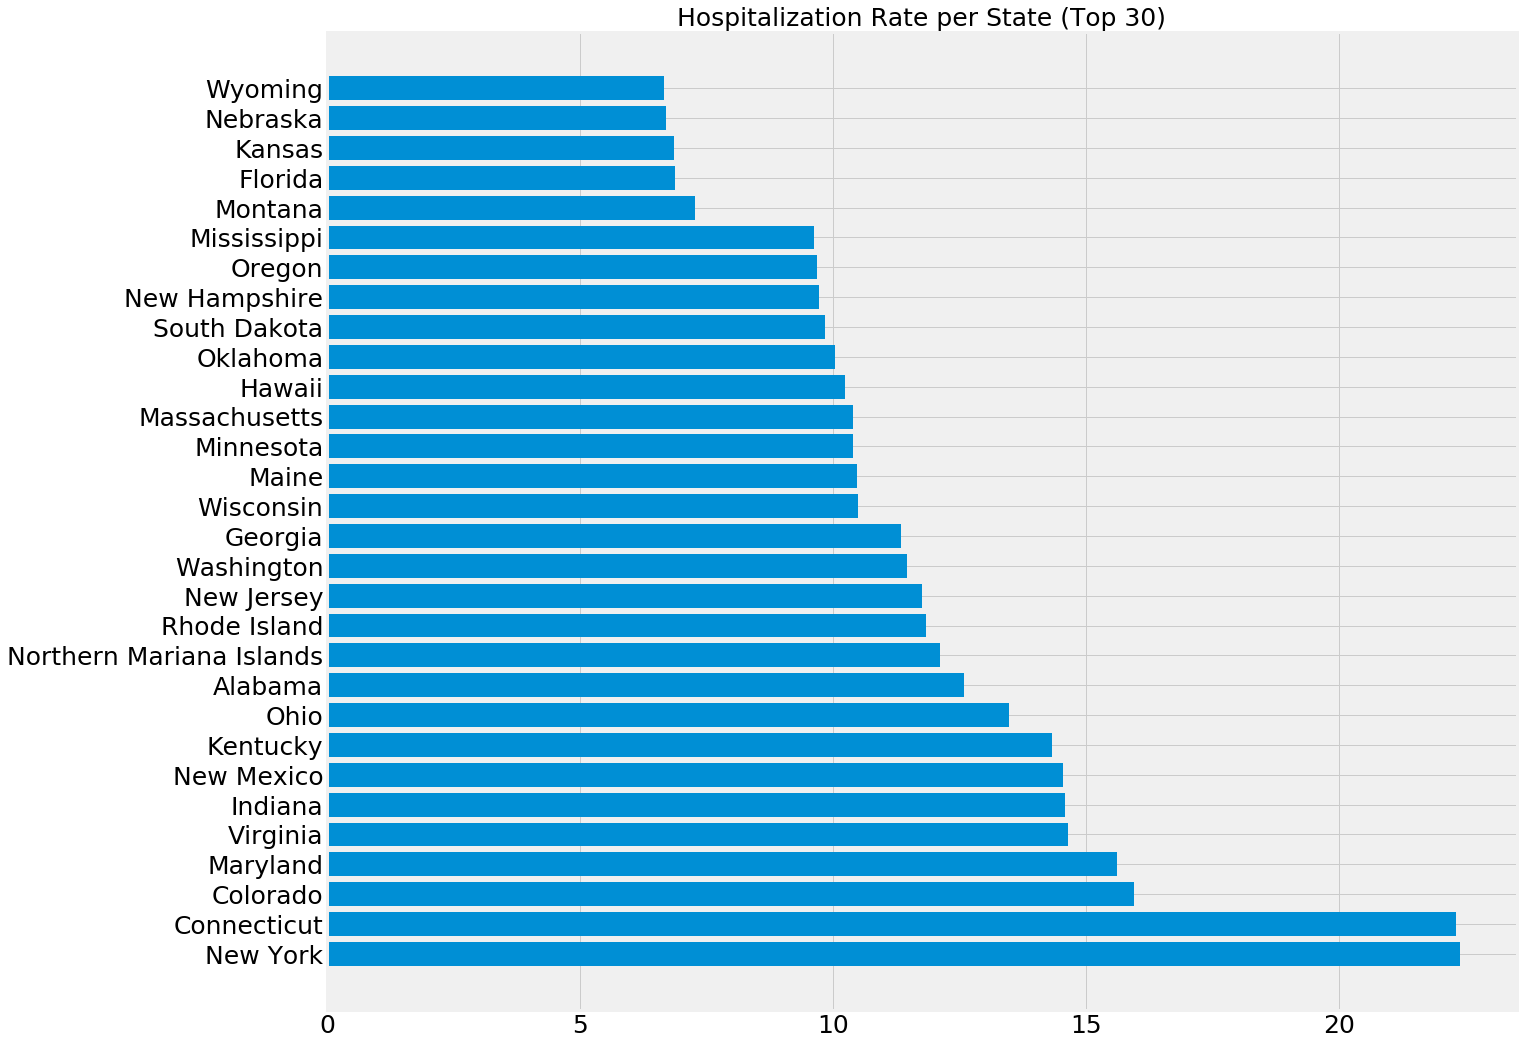

In [114]:
us_medical_data.fillna(value=0, inplace=True)

def plot_us_medical_data():
    states = us_medical_data['Province_State'].unique()
    testing_number = []
    hospitalization_number = [] 
    testing_rate = []
    hospitalization_rate = []
    
    for i in states:
        testing_number.append(us_medical_data[us_medical_data['Province_State']==i]['People_Tested'].sum())
        hospitalization_number.append(us_medical_data[us_medical_data['Province_State']==i]['People_Hospitalized'].sum())
        testing_rate.append(us_medical_data[us_medical_data['Province_State']==i]['Testing_Rate'].max())
        hospitalization_rate.append(us_medical_data[us_medical_data['Province_State']==i]['Hospitalization_Rate'].max())
        
    testing_states = [k for k, v in sorted(zip(states, testing_number), key=operator.itemgetter(1), reverse=True)]
    hospitalization_states = [k for k, v in sorted(zip(states, hospitalization_number), key=operator.itemgetter(1), reverse=True)]
    testing_rate_states = [k for k, v in sorted(zip(states, testing_rate), key=operator.itemgetter(1), reverse=True)]
    hospitalization_rate_states = [k for k, v in sorted(zip(states, hospitalization_rate), key=operator.itemgetter(1), reverse=True)]
    
    
    for i in range(len(states)):
        testing_number[i] = us_medical_data[us_medical_data['Province_State']==testing_states[i]]['People_Tested'].sum()
        hospitalization_number[i] = us_medical_data[us_medical_data['Province_State']==hospitalization_states[i]]['People_Hospitalized'].sum()
        testing_rate[i] = us_medical_data[us_medical_data['Province_State']==testing_rate_states[i]]['Testing_Rate'].sum()
        hospitalization_rate[i] = us_medical_data[us_medical_data['Province_State']==hospitalization_rate_states[i]]['Hospitalization_Rate'].sum()
        
    plot_bar_graphs_tall(testing_states[:30], testing_number[:30], 'Total Testing per State (Top 30)')
    plot_bar_graphs_tall(hospitalization_states[:30], hospitalization_number[:30], 'Total Hospitalization per State (Top 30)')
    plot_bar_graphs_tall(testing_rate_states[:30], testing_rate[:30], 'Testing Rate per 100,000 People (Top 30)')
    plot_bar_graphs_tall(hospitalization_rate_states[:30], hospitalization_rate[:30], 'Hospitalization Rate per State (Top 30)')
    
plot_us_medical_data()